# Loan Default Risk Analysis

## Introduction
This project aims to apply Exploratory Data Analysis (EDA) to a real business scenario in the banking and financial services sector. The primary objective is to understand patterns in loan data to identify factors that influence loan default. By analyzing these patterns, we aim to minimize the risk of financial loss while lending to customers and ensure that applicants capable of repaying the loan are not rejected.

## Problem Statement
The loan-providing companies face challenges in approving loans due to insufficient or non-existent credit histories of applicants. This project involves analyzing loan application data to identify clients with payment difficulties and understand the driving factors behind loan default.

## Business Objectives
1. Identify patterns indicating clients' difficulty in repaying loans.
2. Use EDA to inform decision-making on loan approvals, denials, and adjustments in loan amounts or interest rates.
3. Understand the variables that are strong indicators of loan default for risk assessment and portfolio management.


## Data Overview
In this project, we use three datasets:

1. **Application Data** (`application_data.csv`): Contains information about the client's application for a loan.
2. **Previous Application Data** (`previous_application.csv`): Contains information about clients' previous loan applications and their status (Approved, Cancelled, Refused, Unused offer).
3. **Columns Description** (`columns_description.csv`): A data dictionary that describes the meaning of the variables in the datasets.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
# Load application_data.csv
application_data = pd.read_csv('application_data.csv')
# Load previous_application.csv
previous_application = pd.read_csv('previous_application.csv')
# Load columns_description.csv
#columns_description = pd.read_csv('columns_description.csv', encoding='latin1')

In [4]:
# Show all the columns and rows in a data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Print the first few rows of application_data
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Print the first few rows of previous_application
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Data Cleaning & Preparation of `application_data`

### Data Summary and Missing Values

### Application Data Summary
The `application_data` dataframe contains the following columns and their respective data types:

- **Info**: Provides the data types and non-null count for each column.
- **Describe**: Provides summary statistics (mean, standard deviation, min, max, etc.) for numerical columns.

### Missing Values Analysis
We identified the columns with missing values and calculated the percentage of missing data for each column.

Based on the percentage of missing values, we will decide whether to remove columns with excessive missing data or replace missing values using an appropriate method.


In [7]:
# print the information of variables to check their data types
application_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
# Function to return the column names, missing count, and its percentage of a dataframe
def identify_missing_data(df):
  missing_values = df.isnull().sum()
  missing_percentage = (missing_values / len(df)) * 100
  missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
  return (missing_data[missing_data['Missing Values'] > 0].sort_values(by = 'Percentage', ascending = False))

In [10]:
# Identify missing data in application_data
missing_col = identify_missing_data(application_data)
missing_col

Missing Values  Percentage
COMMONAREA_MEDI                       214865   69.872297
COMMONAREA_AVG                        214865   69.872297
COMMONAREA_MODE                       214865   69.872297
NONLIVINGAPARTMENTS_MEDI              213514   69.432963
NONLIVINGAPARTMENTS_MODE              213514   69.432963
NONLIVINGAPARTMENTS_AVG               213514   69.432963
FONDKAPREMONT_MODE                    210295   68.386172
LIVINGAPARTMENTS_MODE                 210199   68.354953
LIVINGAPARTMENTS_MEDI                 210199   68.354953
LIVINGAPARTMENTS_AVG                  210199   68.354953
FLOORSMIN_MODE                        208642   67.848630
FLOORSMIN_MEDI                        208642   67.848630
FLOORSMIN_AVG                         208642   67.848630
YEARS_BUILD_MODE                      204488   66.497784
YEARS_BUILD_MEDI                      204488   66.497784
YEARS_BUILD_AVG                       204488   66.497784
OWN_CAR_AGE                           202929   65.990810
LANDAREA_AVG                          182590   59.376738
LANDAREA_MEDI                         182590   59.376738
LANDAREA_MODE                         182590   59.376738
BASEMENTAREA_MEDI                     179943   58.515956
BASEMENTAREA_AVG                      179943   58.515956
BASEMENTAREA_MODE                     179943   58.515956
EXT_SOURCE_1                          173378   56.381073
NONLIVINGAREA_MEDI                    169682   55.179164
NONLIVINGAREA_MODE                    169682   55.179164
NONLIVINGAREA_AVG                     169682   55.179164
ELEVATORS_MEDI                        163891   53.295980
ELEVATORS_MODE                        163891   53.295980
ELEVATORS_AVG                         163891   53.295980
WALLSMATERIAL_MODE                    156341   50.840783
APARTMENTS_MODE                       156061   50.749729
APARTMENTS_MEDI                       156061   50.749729
APARTMENTS_AVG                        156061   50.749729
ENTRANCES_MODE                        154828   50.348768
ENTRANCES_AVG                         154828   50.348768
ENTRANCES_MEDI                        154828   50.348768
LIVINGAREA_MEDI                       154350   50.193326
LIVINGAREA_MODE                       154350   50.193326
LIVINGAREA_AVG                        154350   50.193326
HOUSETYPE_MODE                        154297   50.176091
FLOORSMAX_MEDI                        153020   49.760822
FLOORSMAX_AVG                         153020   49.760822
FLOORSMAX_MODE                        153020   49.760822
YEARS_BEGINEXPLUATATION_AVG           150007   48.781019
YEARS_BEGINEXPLUATATION_MEDI          150007   48.781019
YEARS_BEGINEXPLUATATION_MODE          150007   48.781019
TOTALAREA_MODE                        148431   48.268517
EMERGENCYSTATE_MODE                   145755   47.398304
OCCUPATION_TYPE                        96391   31.345545
EXT_SOURCE_3                           60965   19.825307
AMT_REQ_CREDIT_BUREAU_WEEK             41519   13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT              41519   13.501631
AMT_REQ_CREDIT_BUREAU_HOUR             41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519   13.501631
NAME_TYPE_SUITE                         1292    0.420148
DEF_30_CNT_SOCIAL_CIRCLE                1021    0.332021
OBS_60_CNT_SOCIAL_CIRCLE                1021    0.332021
DEF_60_CNT_SOCIAL_CIRCLE                1021    0.332021
OBS_30_CNT_SOCIAL_CIRCLE                1021    0.332021
EXT_SOURCE_2                             660    0.214626
AMT_GOODS_PRICE                          278    0.090403
AMT_ANNUITY                               12    0.003902
CNT_FAM_MEMBERS                            2    0.000650
DAYS_LAST_PHONE_CHANGE                     1    0.000325

In [11]:
len(missing_col)

67

### Handling Missing Data

Based on our missing values analysis, we decided on the following approach to handle missing data:

1. **Drop Columns**: We dropped columns with more than 40% missing values to ensure the dataset remains robust.
2. **Impute Missing Values**: For the remaining columns with missing values, we imputed the missing values with the median/mean/mode of respective columns based on analysis and observation.

### Next Steps
With the missing data handled, we will move on to handling the incorrect or unknown values in the dataset.


##### Drop columns with more than 40% missing values

In [12]:
# Fetching columns to drop
threshold = 40
columns_to_drop = missing_col[missing_col['Percentage'] > threshold].index
columns_to_drop

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_AVG'

In [13]:
application_data.drop(columns=columns_to_drop, inplace=True)

In [14]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
# Identifying new missing data
missing_col = identify_missing_data(application_data)
missing_col

Missing Values  Percentage
OCCUPATION_TYPE                      96391   31.345545
EXT_SOURCE_3                         60965   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR           41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT            41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON            41519   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK           41519   13.501631
AMT_REQ_CREDIT_BUREAU_DAY            41519   13.501631
AMT_REQ_CREDIT_BUREAU_HOUR           41519   13.501631
NAME_TYPE_SUITE                       1292    0.420148
DEF_60_CNT_SOCIAL_CIRCLE              1021    0.332021
OBS_60_CNT_SOCIAL_CIRCLE              1021    0.332021
DEF_30_CNT_SOCIAL_CIRCLE              1021    0.332021
OBS_30_CNT_SOCIAL_CIRCLE              1021    0.332021
EXT_SOURCE_2                           660    0.214626
AMT_GOODS_PRICE                        278    0.090403
AMT_ANNUITY                             12    0.003902
CNT_FAM_MEMBERS                          2    0.000650
DAYS_LAST_PHONE_CHANGE                   1    0.000325

##### Analysing `OCCUPATION_TYPE`

In [16]:
# Summary statistics
application_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

<Axes: xlabel='OCCUPATION_TYPE'>

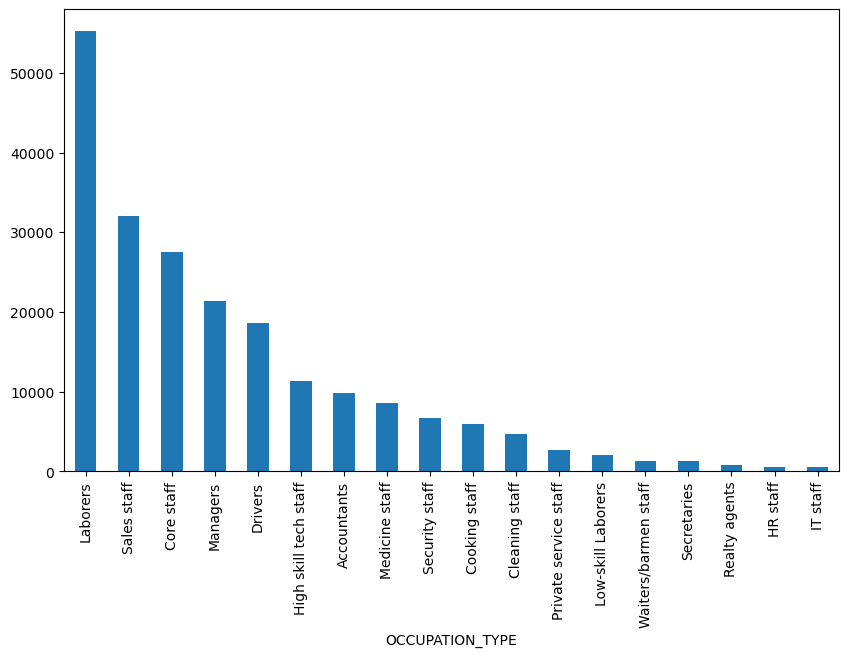

In [17]:
application_data['OCCUPATION_TYPE'].value_counts().plot.bar(figsize = (10, 6))

- Upon examining the plot, it is evident that `Laborers` constitute the largest group of loan applicants.

- For the purpose of imputation, standard approaches such as replacing missing values with the *minimum, maximum, mode,* or *median* have been deemed unsuitable due to the potential for introducing bias into subsequent analyses. Therefore, the missing values within the `OCCUPATION_TYPE` column, which comprise 31.345545% of the data, will be replaced with the label `Unknown`. This strategy preserves the information regarding missing data while enabling the analysis to proceed without discarding a substantial portion of the dataset.

In [18]:
# Impute null values in OCCUPATION_TYPE with 'Unknown' category
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

<Axes: xlabel='OCCUPATION_TYPE'>

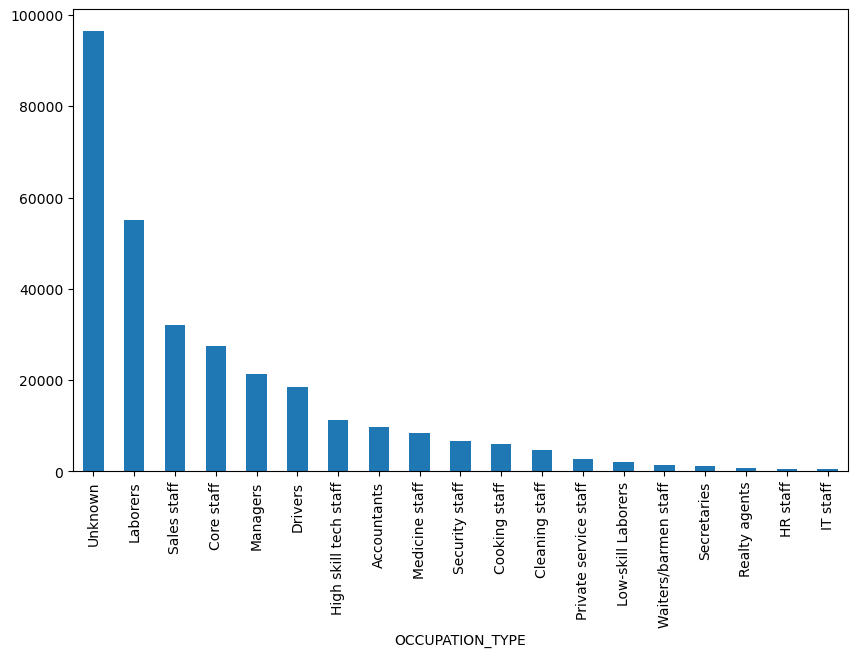

In [19]:
application_data['OCCUPATION_TYPE'].value_counts().plot.bar(figsize = (10, 6))

##### Analysing `EXT_SOURCE_3`

In [20]:
# Dtype of EXT_SOURCE_3
application_data['EXT_SOURCE_3'].dtype

dtype('float64')

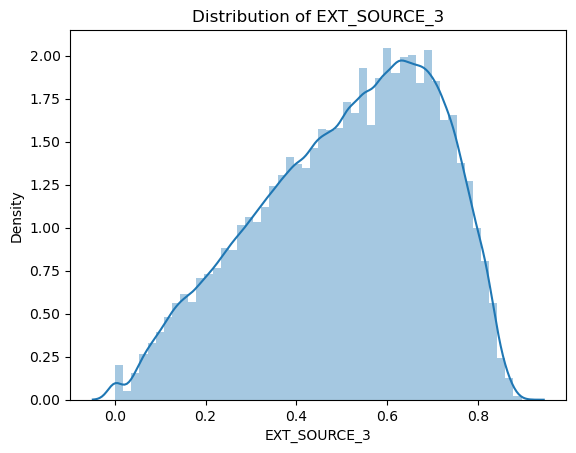

In [21]:
# Checking the Distribution
sns.distplot(application_data['EXT_SOURCE_3'])
plt.title('Distribution of EXT_SOURCE_3')
plt.show()

In [22]:
# Creating temporary missing indicator column which I will drop after analysis
application_data['EXT_SOURCE_3_missing'] = application_data['EXT_SOURCE_3'].isnull().astype(int)

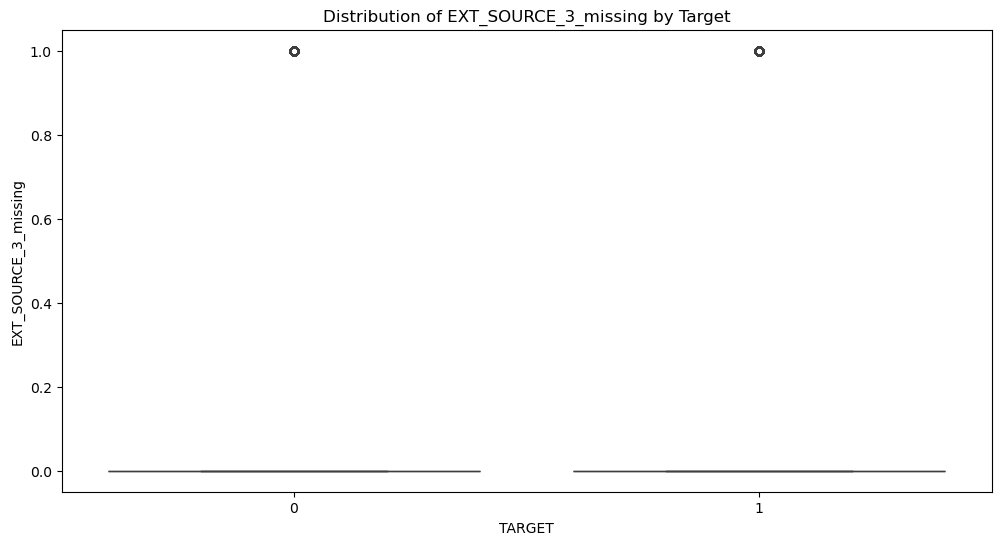

In [23]:
# Exploring how the missing data will impact our analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='EXT_SOURCE_3_missing', data=application_data)
plt.title('Distribution of EXT_SOURCE_3_missing by Target')
plt.show()

In [24]:
# Summary statistics
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Imputing the missing values in `EXT_SOURCE_3` with the `median` value seems to be a relevant option here. This approach balances the need to *preserve information*, *reduce bias*, and *improve model performance* while acknowledging the potential significance of missing data.

**Observations and Reasoning for Choosing Median Imputation for Missing Values in `EXT_SOURCE_3`:**

1. **Potential Information Loss:** Ignoring missing values in EXT_SOURCE_3 could lead to the loss of valuable information that might be predictive of loan defaults, as suggested by the box plot analysis.

2. **Bias Introduction:** If the missingness of EXT_SOURCE_3 is not random and is related to the target variable (loan default), ignoring missing values can introduce bias into the analysis, resulting in inaccurate conclusions.

3. **Improved Model Performance:** Imputing missing values with the median can help preserve information, reduce bias, and potentially improve the performance of predictive models.

4. **Median Imputation is Generally Safe:** Given the relatively symmetrical distribution of EXT_SOURCE_3, median imputation is a safe and often effective approach, as it is less sensitive to outliers compared to mean imputation.

In [25]:
# Imputing the missing values in EXT_SOURCE_3 with the median value
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(), inplace=True)

In [26]:
# Dropping temporary missing indicator column
application_data.drop('EXT_SOURCE_3_missing', axis=1, inplace=True)

##### Analysing all the columns with ~13.5% missing values

* `AMT_REQ_CREDIT_BUREAU_YEAR`
* `AMT_REQ_CREDIT_BUREAU_QRT`
* `AMT_REQ_CREDIT_BUREAU_MON`
* `AMT_REQ_CREDIT_BUREAU_WEEK`
* `AMT_REQ_CREDIT_BUREAU_DAY`
* `AMT_REQ_CREDIT_BUREAU_HOUR`

These all columns depicts the number of enquiries to Credit Bureau about the client. So, handling all these columns together. Further all of them as exact same number of missing values.

In [27]:
# Summary statistics
application_data[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [28]:
# Finding Mode
application_data[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0

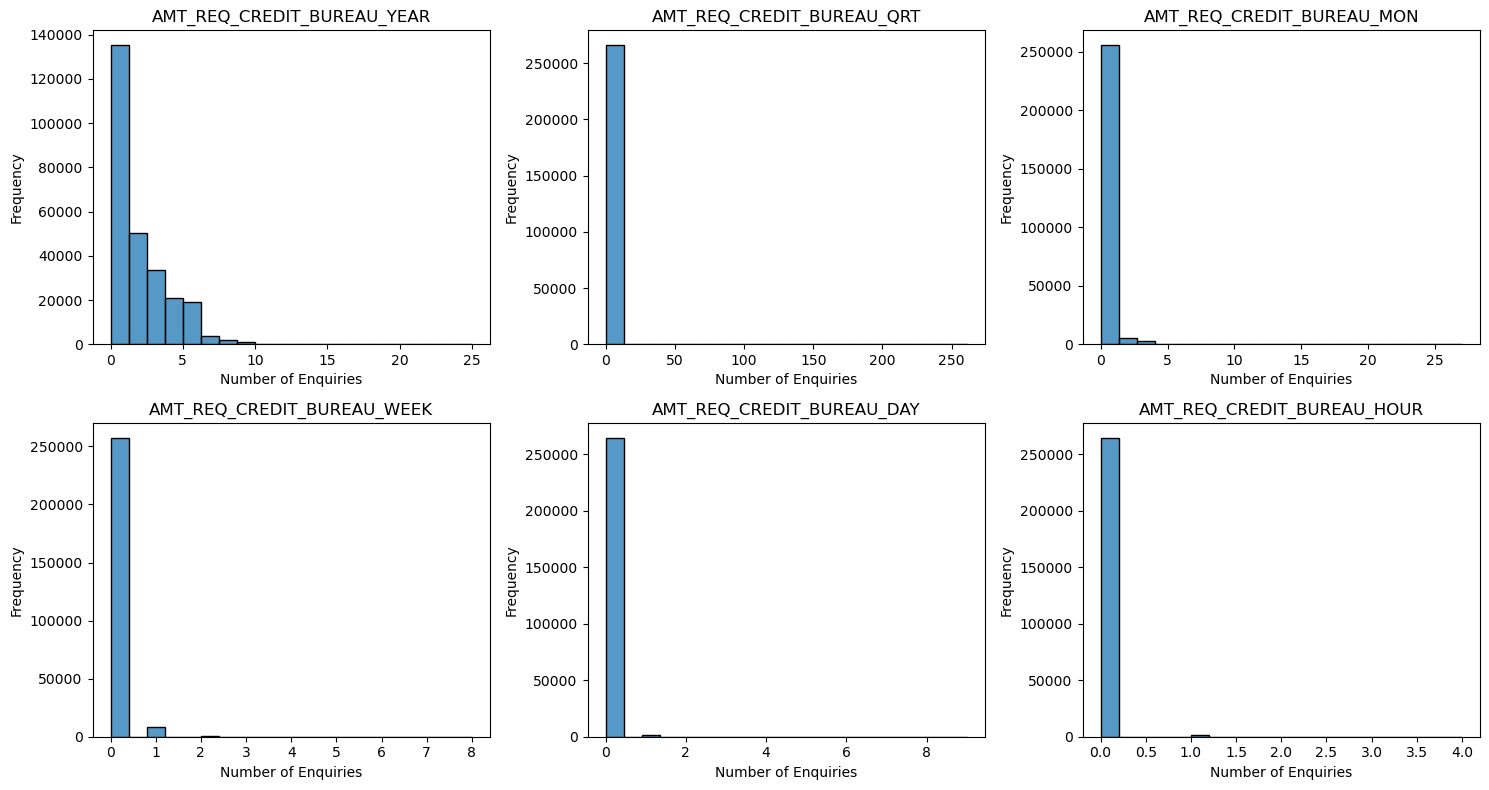

In [29]:
# Visualizin the distribution of the columns with missing values to decide on the imputation strategy

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Iterate through the columns and plot histograms
for i, column in enumerate(['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']):
    sns.histplot(application_data[column], bins=20, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Number of Enquiries')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation & Decision**

* The `mode` for all columns is 0 and the distributions are heavily skewed towards 0.

* The `median` for the columns `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_DAY`, and `AMT_REQ_CREDIT_BUREAU_HOUR` is 0 except `AMT_REQ_CREDIT_BUREAU_YEAR` which is 1.

* To align with the business objective of identifying patterns indicating client's difficulty in repaying loans, imputing with the `median` for the Credit Bureau enquiry columns appears to be a more appropriate strategy (even if it's 1 for some columns). It better captures the central tendency of the data and acknowledges the potential risk associated with higher enquiries.

In [30]:
# Imputing the missing values with the median
for column in ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']:
    median_value = application_data[column].median()
    application_data[column].fillna(median_value, inplace=True)

In [31]:
# Checking the new missing data
missing_col = identify_missing_data(application_data)
missing_col

Missing Values  Percentage
NAME_TYPE_SUITE                     1292    0.420148
OBS_30_CNT_SOCIAL_CIRCLE            1021    0.332021
DEF_30_CNT_SOCIAL_CIRCLE            1021    0.332021
OBS_60_CNT_SOCIAL_CIRCLE            1021    0.332021
DEF_60_CNT_SOCIAL_CIRCLE            1021    0.332021
EXT_SOURCE_2                         660    0.214626
AMT_GOODS_PRICE                      278    0.090403
AMT_ANNUITY                           12    0.003902
CNT_FAM_MEMBERS                        2    0.000650
DAYS_LAST_PHONE_CHANGE                 1    0.000325

##### Analysing `NAME_TYPE_SUITE`

(<Axes: xlabel='NAME_TYPE_SUITE'>,
 NAME_TYPE_SUITE
 Unaccompanied      248526
 Family              40149
 Spouse, partner     11370
 Children             3267
 Other_B              1770
 Other_A               866
 Group of people       271
 Name: count, dtype: int64)

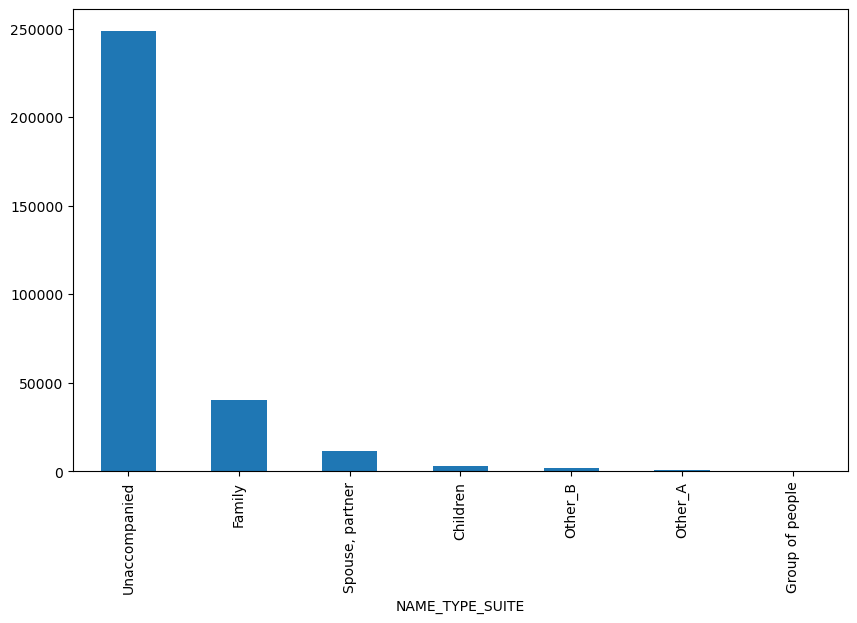

In [32]:
application_data['NAME_TYPE_SUITE'].value_counts().plot.bar(figsize = (10, 6)), application_data['NAME_TYPE_SUITE'].value_counts()

**Observation & Decision**

- The `NAME_TYPE_SUITE` column has a small percentage of missing values (0.42%).
- The most frequent value in this column is `Unaccompanied`, indicating that most clients applied alone.
- Despite the low percentage of missing values and the high frequency of `Unaccompanied`, imputing with a separate category like `Unknown` is reasonable because:

  -- Minimize potential bias introduced by assuming `Unaccompanied` for missing values.

  -- Preserve information about the missingness for further analysis and potential insights.

  -- Enhance interpretability by clearly distinguishing between missing information and actual `Unaccompanied` cases.

  -- Align with the business objective of identifying loan default risk patterns by ensuring unbiased and informative analysis.

In [33]:
# Imputing the missing values with "Unknown"
application_data['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)

##### Analysing all the columns with ~0.33% missing values


* `OBS_30_CNT_SOCIAL_CIRCLE`
* `DEF_30_CNT_SOCIAL_CIRCLE`
* `OBS_60_CNT_SOCIAL_CIRCLE`
* `DEF_60_CNT_SOCIAL_CIRCLE`



These all columns depicts how many observation of client's social surroundings. So, handling all these columns together. Further all of them as exact same number of missing values.

In [34]:
# Summary statistics
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [35]:
# Finding mode
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mode()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       0.0                       0.0

**Observation & Decision**

- Both the `median` and `mode` of all the four columns is 0.
- So, it would be reasonable to impute all the missing values in this column with `0` or `median` or `mode`.

In [36]:
# Imputing the missing value with median
for column in ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']:
    median_value = application_data[column].median()
    application_data[column].fillna(median_value, inplace=True)

##### Analysing `EXT_SOURCE_2`

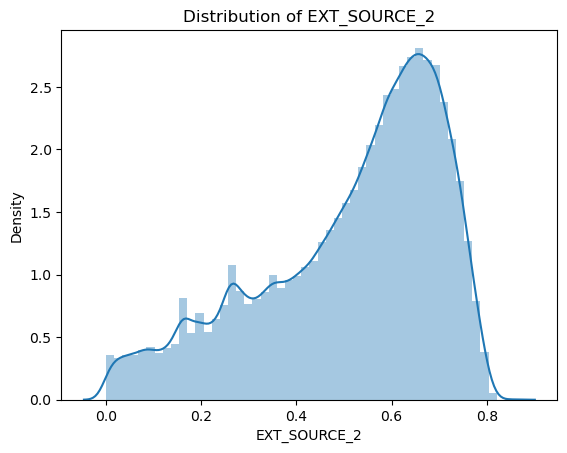

In [37]:
# Checking the Distribution
sns.distplot(application_data['EXT_SOURCE_2'])
plt.title('Distribution of EXT_SOURCE_2')
plt.show()

In [38]:
# Summary statistics
application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [39]:
# Creating temporary missing indicator column which I will drop after analysis
application_data['EXT_SOURCE_2_missing'] = application_data['EXT_SOURCE_2'].isnull().astype(int)

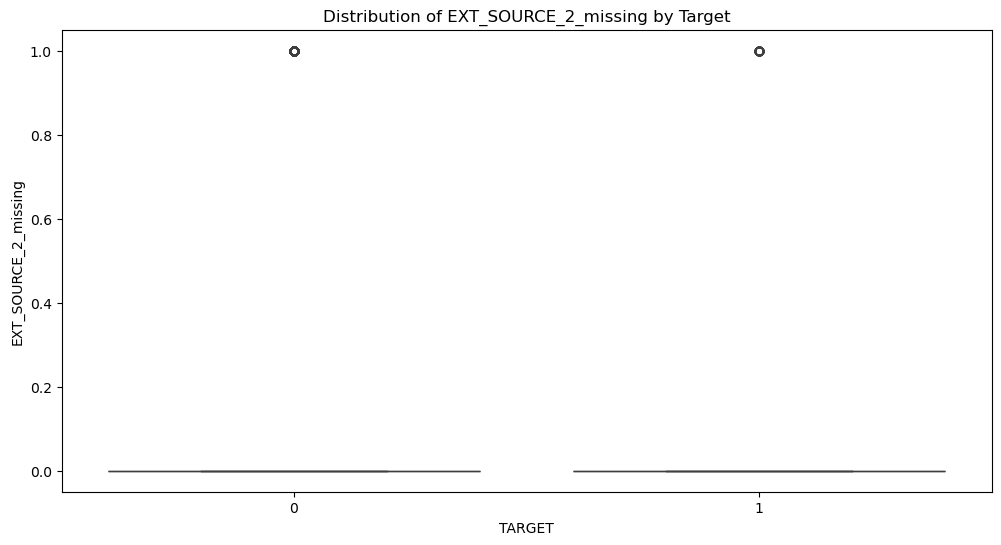

In [40]:
# Exploring how the missing data will impact our analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='EXT_SOURCE_2_missing', data=application_data)
plt.title('Distribution of EXT_SOURCE_2_missing by Target')
plt.show()

**Observation & Decision**

- We can observe a similar trend in the column `EXT_SOURCE_2` when compared with `EXT_SOURCE_3`
- So, similary, choosing `Median` Imputation for Missing Values in `EXT_SOURCE_2` because of same reasons.

In [41]:
# Imputing the missing values in EXT_SOURCE_2 with the median value
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median(), inplace=True)

In [42]:
# Dropping temporary missing indicator column
application_data.drop('EXT_SOURCE_2_missing', axis=1, inplace=True)

##### Analysing `AMT_GOODS_PRICE`

In [43]:
# Sumary statistics
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

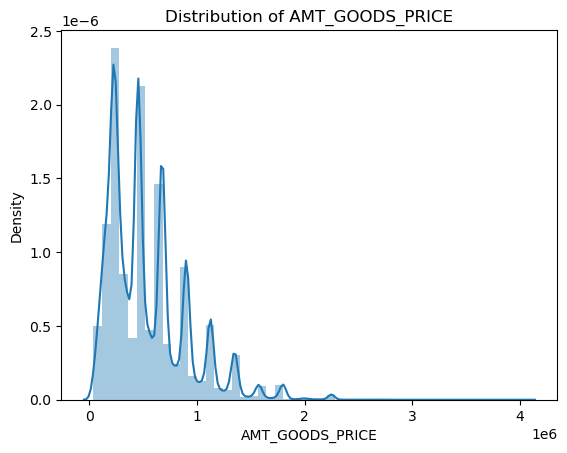

In [44]:
# Checking the Distribution
sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()

In [45]:
application_data['AMT_GOODS_PRICE'].median(), application_data['AMT_GOODS_PRICE'].mean(), application_data['AMT_GOODS_PRICE'].mode()

(450000.0,
 538396.2074288895,
 0    450000.0
 Name: AMT_GOODS_PRICE, dtype: float64)

**Assumptions:**

- Assumed that missing values in `AMT_GOODS_PRICE` are likely to be similar to the typical goods loan amount, represented by the median/mode.

**Observation & Decision**

- The distribution of `AMT_GOODS_PRICE` is right-skewed with a slightly higher mean compared to the median and mode. This suggests the presence of some higher values influencing the mean, but the central tendency is around the median/mode.
- While missing values could indicate the absence of a previous goods loan, it's also plausible that they represent typical goods loan amounts. Imputing with the median/mode allows us to fill these missing values with a representative value without creating a separate category and changing the data type.
- The median and mode of `AMT_GOODS_PRICE` are the same (450000.0), indicating a strong central tendency around this value. Using either for imputation would yield similar results.

- Imputing missing values in `AMT_GOODS_PRICE` with the `median`/`mode` (`450000.0`) seems to be a reasonable approach that preserves the data type and uses a representative value. While there is a potential for bias, we believe it is a balanced approach given the available information and business context.


In [46]:
# Imputing with median (or mode, since they are the same)
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(), inplace=True)

##### Analysing `AMT_ANNUITY`

In [47]:
# Summary Statistics
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

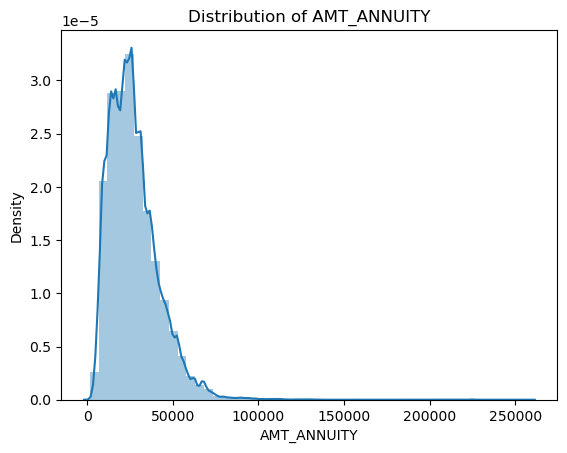

In [48]:
# Checking the distribution
sns.distplot(application_data['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY')
plt.show()

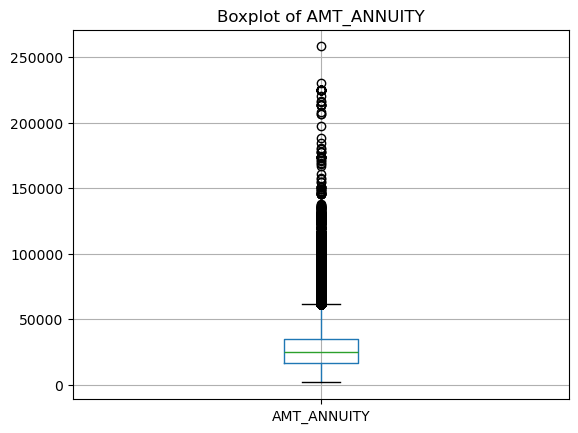

In [49]:
# Checking outliers
application_data.boxplot(column='AMT_ANNUITY')
plt.title('Boxplot of AMT_ANNUITY')
plt.show()

**Observation & Decision**

- Given the relatively small number of missing values (12) and the potential presence of outliers in the `AMT_ANNUITY` column, `median` imputation is a safe and robust approach. It's less sensitive to extreme values than `mean` imputation and is likely to preserve the overall distribution of the data.

- Imputing missing annuity values with the `median` helps maintain the integrity of the data for loan default risk analysis. It avoids introducing bias or extreme values that could distort the patterns you're trying to identify. Further `median` imputation is less affected by outliers, making it a more reliable choice in this scenario.

In [50]:
# Imputing missing values with median
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(), inplace=True)

##### Analysing `CNT_FAM_MEMBERS` & `DAYS_LAST_PHONE_CHANGE`

**Deleting these Less Relevant Columns with Missing Values**

- These two columns, `CNT_FAM_MEMBERS` and `DAYS_LAST_PHONE_CHANGE`, has a very small number of missing values (2 and 1 respectively). Based on the business objective of loan default risk analysis, it seems like these features are unlikely to have a significant impact on our predictions.

- To avoid potential information loss from dropping rows and to simplify our analysis, deleting these columns from our dataset. This decision is justified by:

 * **Minimal Information Loss:** Deleting these columns with few missing values will not significantly affect the overall analysis.
 * **Focus on Relevance:** It allows to focus on the features that are most crucial for loan default prediction.
 * **Reduced Complexity:** It simplifies the analysis and reduces computational overhead.

In [51]:
application_data.drop(['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

---

In [52]:
# Checking final missing data
missing_col = identify_missing_data(application_data)
missing_col

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [53]:
# Null count in dataset
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [54]:
# Printing the new dataset after Handling the missing values
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                 1           1           0        Laborers   
1                 1           1           0      Core staff   
2                 1           1           0        Laborers   
3                 1           0           0        Laborers   
4                 1           0           0      Core staff   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WO

In [55]:
application_data.shape

(307511, 71)

---

### Handling Incorrect/Unknown Values

During the data cleaning process, we identified incorrect or unknown values in the dataset. These values can significantly impact our analysis if not addressed. The steps taken to handle these values are as follows:

1. **Identify Incorrect/Unknown Values**: We will examine the unique values in each column to spot entries that are incorrect or unknown.
2. **Replace Incorrect/Unknown Values**: Further we will replace the incorrect or unknown values with the values that are reasonable and logical.
3. **Handle Missing Values Again**: After replacing incorrect/unknown values, we will recheck for missing values and handle them accordingly


### Next Steps
With the dataset cleaned and incorrect/unknown values handled, we will proceed to detect and analyze outliers in the data.


#### Analysing Numerical columns

In [56]:
# Describing the columns for analysing numerical values
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000

##### Analysing `DAYS_BIRTH`

In [57]:
# Describing DAYS_BIRTH
application_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [58]:
application_data['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

In [59]:
# Number of unique values
application_data['DAYS_BIRTH'].nunique()

17460

In [60]:
application_data['DAYS_BIRTH'].dtype

dtype('int64')

**Observations**

- The Column `DAYS_BIRTH` has total of 307511 values and 17460 unique values.
- All the values are stored as negative values. This is a common practice in some datasets to indicate the number of days before the current date.

**Decision**

- Converting these values seems to be reasonable here because:
  - Positive values are more intuitive and easier to understand when dealing with age. Converting to positive values will make it simpler to analyze and visualize age-related trends.
  - Most analyses and visualizations related to age will assume positive values. Converting `DAYS_BIRTH` to positive values ensures consistency with standard practices and avoids potential confusion.
  - Using positive age values can simplify calculations and comparisons in data analysis tasks, such as calculating age groups or identifying age-related patterns.
- To preserve the original data, creating a new column called `AGE_YEARS` to store the converted positive age values in years.

In [61]:
# Dividing the absolute value of DAYS_BIRTH by 365.25 to get the approximate age in years. Using 365.25 to account for leap years.
application_data['AGE_YEARS'] = abs(application_data['DAYS_BIRTH']) / 365.25

In [62]:
application_data[['AGE_YEARS','DAYS_BIRTH']].describe()

AGE_YEARS     DAYS_BIRTH
count  307511.000000  307511.000000
mean       43.906900  -16036.995067
std        11.947950    4363.988632
min        20.503765  -25229.000000
25%        33.984942  -19682.000000
50%        43.121150  -15750.000000
75%        53.886379  -12413.000000
max        69.073238   -7489.000000

- Since `AGE_YEARS` column already derived from `DAYS_BIRTH`, keeping both columns would introduce redundancy in your dataset. They essentially represent the same information, just in different units.
- `AGE_YEARS` is more interpretable and convenient for analysis, dropping the `DAYS_BIRTH` column after creating `AGE_YEARS`.

In [63]:
# Dropping the DAYS_BIRTH column
application_data.drop('DAYS_BIRTH', axis=1, inplace=True)

##### Analysing `DAYS_EMPLOYED`, `DAYS_REGISTRATION` & `DAYS_ID_PUBLISH`

In [64]:
# Describing DAYS_EMPLOYED, DAYS_REGISTRATION & DAYS_ID_PUBLISH
application_data[['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  307511.000000      307511.000000    307511.000000
mean    63815.045904       -4986.120328     -2994.202373
std    141275.766519        3522.886321      1509.450419
min    -17912.000000      -24672.000000     -7197.000000
25%     -2760.000000       -7479.500000     -4299.000000
50%     -1213.000000       -4504.000000     -3254.000000
75%      -289.000000       -2010.000000     -1720.000000
max    365243.000000           0.000000         0.000000

In [65]:
application_data['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [66]:
application_data['DAYS_EMPLOYED'].value_counts(normalize=True).head()

DAYS_EMPLOYED
 365243    0.180072
-200       0.000507
-224       0.000494
-230       0.000491
-199       0.000491
Name: proportion, dtype: float64

In [67]:
application_data['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.0    113
-7.0     98
-6.0     96
-4.0     92
-2.0     92
Name: count, dtype: int64

In [68]:
application_data['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [69]:
application_data['DAYS_EMPLOYED'].nunique(), application_data['DAYS_REGISTRATION'].nunique(), application_data['DAYS_ID_PUBLISH'].nunique()

(12574, 15688, 6168)

###### Handling `DAYS_EMPLOYED` with Anomalous Values

The `DAYS_EMPLOYED` column initially contained both positive and negative values, representing the number of days before the application the person started current employment. However, it was observed that a significant number of entries had a positive value of `365243`, which is unrealistic and likely an outlier. Further analysis revealed a relationship between this outlier and the `NAME_INCOME_TYPE` column, specifically for `Pensioner` and `Unemployed` categories.

In [70]:
sorted(application_data['DAYS_EMPLOYED'].unique(),reverse=True)[:10]

[365243, 0, -1, -2, -3, -4, -5, -6, -7, -8]

In [71]:
# Counting the number of values 365243 in DAYS_EMPLOYED
application_data['DAYS_EMPLOYED'].value_counts()[365243]

55374

In [72]:
# Counting the number of values in DAYS_EMPLOYED excluding 365243
application_data['DAYS_EMPLOYED'].value_counts().drop(365243).sum()

252137

In [73]:
application_data['DAYS_EMPLOYED'].value_counts().sum()

307511

In [74]:
application_data[['DAYS_EMPLOYED', 'NAME_INCOME_TYPE']].groupby('NAME_INCOME_TYPE').describe()

DAYS_EMPLOYED                                        \
                             count           mean          std       min   
NAME_INCOME_TYPE                                                           
Businessman                   10.0   -2874.300000  1685.332545   -5445.0   
Commercial associate       71617.0   -2129.274027  2083.280186  -17546.0   
Maternity leave                5.0   -2636.800000  1180.819927   -3762.0   
Pensioner                  55362.0  365176.133052  4975.174561  -12865.0   
State servant              21703.0   -3450.871124  2898.352024  -17583.0   
Student                       18.0   -2494.833333  2244.193560   -8005.0   
Unemployed                    22.0  365243.000000     0.000000  365243.0   
Working                   158774.0   -2353.121638  2321.500809  -17912.0   

                                                               
                            25%       50%       75%       max  
NAME_INCOME_TYPE                                               
Businessman            -4333.50   -2292.5   -1706.0    -568.0  
Commercial associate   -2888.00   -1514.0    -692.0      -2.0  
Maternity leave        -3629.00   -3020.0   -1550.0   -1223.0  
Pensioner             365243.00  365243.0  365243.0  365243.0  
State servant          -4899.50   -2630.0   -1224.0      -1.0  
Student                -3791.75   -1850.5    -634.5    -191.0  
Unemployed            365243.00  365243.0  365243.0  365243.0  
Working                -3125.00   -1616.0    -764.0       0.0

In [75]:
application_data[application_data['DAYS_EMPLOYED']==365243]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

**Approach:**

1. All negative values in `DAYS_EMPLOYED` were converted to positive using `abs()`, representing the duration of employment.

2. The value `365243` was recognized as an outlier representing an impossible employment duration. To address this:

  - The average `DAYS_EMPLOYED` for `pensioners`, excluding the outlier, was calculated and imputed for `pensioners` with `DAYS_EMPLOYED` value `365243`. This ensures a more realistic employment duration for this category.
  - `0` was imputed to `DAYS_EMPLOYED` for `unemployed` individuals with the outlier value, assuming they haven't been employed recently.

**Rationale:**

- Outlier Handling: Treating `365243` as an outlier is justified as it represents an unrealistic employment duration (approximately 1000 years).
- Category-Specific Imputation: Different imputation strategies were used for `pensioners` and `unemployed` individuals, acknowledging their distinct employment situations.
- Preservation of Valid Data: Converting negative values to positive while retaining their magnitude preserves valid employment duration information.

In [76]:
# Convert negative values to positive
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])

In [77]:
# Calculate average DAYS_EMPLOYED for Pensioners excluding the outlier
pensioner_avg_days_employed = application_data.loc[
    (application_data['NAME_INCOME_TYPE'] == 'Pensioner') & (application_data['DAYS_EMPLOYED'] != 365243),
    'DAYS_EMPLOYED'].mean()
pensioner_avg_days_employed

4945.8

In [78]:
# Impute for Pensioners with outlier value
application_data.loc[
    (application_data['NAME_INCOME_TYPE'] == 'Pensioner') & (application_data['DAYS_EMPLOYED'] == 365243),
    'DAYS_EMPLOYED'] = pensioner_avg_days_employed

In [79]:
# Impute 0 for Unemployed with outlier value
application_data.loc[
    (application_data['NAME_INCOME_TYPE'] == 'Unemployed') & (application_data['DAYS_EMPLOYED'] == 365243),
    'DAYS_EMPLOYED'] = 0

In [80]:
# Rechecking the distribution
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean       2845.092444
std        2335.041295
min           0.000000
25%         933.000000
50%        2218.000000
75%        4945.800000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

###### Handling `DAYS_REGISTRATION` & `DAYS_ID_PUBLISH`

- These columns represent the number of days before the application that the client registered and published their ID, respectively. Analysis revealed all values are negative, indicating time elapsed before the application.

- To ensure consistency and interpretability, negative values were converted to positive using `abs()`, representing the duration since registration/ID publish.

In [81]:
application_data['DAYS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])

###### Converting `DAYS_EMPLOYED`, `DAYS_REGISTRATION` & `DAYS_ID_PUBLISH` from days to years

In [82]:
# Dividing the absolute value of DAYS_EMPLOYED, DAYS_REGISTRATION & DAYS_ID_PUBLISH by 365.25 to get the approximate values in years. Using 365.25 to account for leap years.
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] / 365.25
application_data['YEARS_REGISTRATION'] = application_data['DAYS_REGISTRATION'] / 365.25
application_data['YEARS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'] / 365.25

In [83]:
application_data[['YEARS_EMPLOYED','DAYS_EMPLOYED','YEARS_REGISTRATION','DAYS_REGISTRATION','YEARS_ID_PUBLISH','DAYS_ID_PUBLISH']].describe()

YEARS_EMPLOYED  DAYS_EMPLOYED  YEARS_REGISTRATION  DAYS_REGISTRATION  \
count   307511.000000  307511.000000       307511.000000      307511.000000   
mean         7.789439    2845.092444           13.651253        4986.120328   
std          6.392995    2335.041295            9.645137        3522.886321   
min          0.000000       0.000000            0.000000           0.000000   
25%          2.554415     933.000000            5.503080        2010.000000   
50%          6.072553    2218.000000           12.331280        4504.000000   
75%         13.540862    4945.800000           20.477755        7479.500000   
max         49.040383   17912.000000           67.548255       24672.000000   

       YEARS_ID_PUBLISH  DAYS_ID_PUBLISH  
count     307511.000000    307511.000000  
mean           8.197679      2994.202373  
std            4.132650      1509.450419  
min            0.000000         0.000000  
25%            4.709103      1720.000000  
50%            8.908966      3254.000000  
75%           11.770021      4299.000000  
max           19.704312      7197.000000

In [84]:
# Dropping the DAYS_EMPLOYED, DAYS_REGISTRATION & DAYS_ID_PUBLISH column
application_data.drop(['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'], axis=1, inplace=True)

#### Analysing Categorical columns

In [85]:
# List of categorical columns
categorical_columns = application_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [86]:
# List of categorical columns and its unique values
for col in categorical_columns:
    print(f"{col}: {application_data[col].unique()}")

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F' 'XNA']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Unknown'
 'Other_B' 'Group of people']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Unknown' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staf

##### Handling `XNA` in Categorical Columns



**Rationale:**

- `XNA` in categorical columns (`categorical_columns`) likely represents unknown or missing information.
- Replacing it with the `mode` (most frequent value) is a common and generally safe approach for handling such cases.

In [87]:
# Replace 'XNA' with mode in each categorical column
for col in categorical_columns:
    mode_value = application_data[col].mode()[0]
    application_data[col] = application_data[col].replace('XNA', mode_value)

**Justification:**

- `Mode` imputation maintains the categorical nature of the data.
- It's a simple and efficient way to fill missing values with a reasonable estimate.
- The impact on analysis is expected to be minimal, assuming `XNA` values are a small proportion of the dataset.

**Note:** This approach assumes that `XNA` values are essentially equivalent to missing data. If there's reason to believe `XNA` represents a meaningful distinction, then might need to consider treating it as a separate category as it might introduce potential bias.

In [88]:
# Check if any XNA left in all the categorical columns
for col in categorical_columns:
    print(f"{col}: {application_data[col].unique()}")

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Unknown'
 'Other_B' 'Group of people']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Unknown' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Lo

##### Handling `Unknown` Values in Categorical Columns

In [89]:
# Iterate through categorical columns and calculate percentage of "Unknown"
for col in categorical_columns:
    total_count = application_data[col].count()  # Total non-null values
    unknown_count = application_data[application_data[col] == 'Unknown'].shape[0]  # Count of "Unknown"

    if total_count > 0:  # Avoid division by zero if column is empty
        unknown_percentage = (unknown_count / total_count) * 100
        print(f"{col}: {unknown_percentage:.2f}% Unknown")
    else:
        print(f"{col}: No data to calculate percentage")

NAME_CONTRACT_TYPE: 0.00% Unknown
CODE_GENDER: 0.00% Unknown
FLAG_OWN_CAR: 0.00% Unknown
FLAG_OWN_REALTY: 0.00% Unknown
NAME_TYPE_SUITE: 0.42% Unknown
NAME_INCOME_TYPE: 0.00% Unknown
NAME_EDUCATION_TYPE: 0.00% Unknown
NAME_FAMILY_STATUS: 0.00% Unknown
NAME_HOUSING_TYPE: 0.00% Unknown
OCCUPATION_TYPE: 31.35% Unknown
WEEKDAY_APPR_PROCESS_START: 0.00% Unknown
ORGANIZATION_TYPE: 0.00% Unknown


**Observation:**

- Categorical columns (except `OCCUPATION_TYPE`) have less than `1%` `Unknown` values.
- Imputing with the `mode` (most frequent value) is a reasonable approach for such cases.
- `OCCUPATION_TYPE` was previously imputed with `Unknown` during `null` value handling due to its high percentage of missing data (around 31%).

**Decision:**

- Imputing `Unknown` values in all categorical columns with their respective modes, excluding `OCCUPATION_TYPE` which has already been addressed.

In [90]:
# Get categorical columns (excluding OCCUPATION_TYPE)
categoricals_without_occupation = categorical_columns[categorical_columns != 'OCCUPATION_TYPE']  # Exclude OCCUPATION_TYPE
categoricals_without_occupation

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [91]:
# Iterate through categorical columns and replace "Unknown" with mode
for col in categoricals_without_occupation:
    mode_value = application_data[col].mode()[0]
    application_data[col] = application_data[col].replace('Unknown', mode_value)

**Justification:**

- Minimal impact on data distribution due to the low percentage of `Unknown` values in most columns.
- Maintains data integrity by using a representative value (`mode`).
- Reduces complexity by simplifying categories.

**Note:** Potential bias might be introduced if `Unknown` values are not missing at random.

##### Checking Missing Values Again

In [92]:
# Checking for total "null" values in the dataset
application_data.isnull().sum().sum()

0

In [93]:
# Checking for total "Unknown" and "XNA" in the dataset ignoring OCCUPATION_TYPE
application_data.isin(['Unknown', 'XNA']).sum().sum() - application_data['OCCUPATION_TYPE'].isin(['Unknown', 'XNA']).sum()

0

### Detecting Outliers

### IQR Method
We can also used the Interquartile Range (IQR) method to statistically identify outliers for the same. The IQR method defines outliers as data points that lie below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

- **Q1 (First Quartile)**: The 25th percentile of the data.
- **Q3 (Third Quartile)**: The 75th percentile of the data.
- **IQR (Interquartile Range)**: The range between the first and third quartile (Q3 - Q1).


In [94]:
# Identifying if there is outlier in a particular column
print("COLUMN_NAME : IQR : HAS_OUTLIER")
for column in application_data.select_dtypes(include=['int64', 'float64']).columns:
    q1 = application_data[column].quantile(0.25)
    q3 = application_data[column].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = application_data[(application_data[column] < lower_bound) | (application_data[column] > upper_bound)][column]

    # Print "yes" if outliers exist, otherwise "no"
    has_outliers = "yes" if len(outliers) > 0 else "no"

    print(f"{column} : {iqr} : {has_outliers}")

COLUMN_NAME : IQR : HAS_OUTLIER
SK_ID_CURR : 177997.0 : no
TARGET : 0.0 : yes
CNT_CHILDREN : 1.0 : yes
AMT_INCOME_TOTAL : 90000.0 : yes
AMT_CREDIT : 538650.0 : yes
AMT_ANNUITY : 18072.0 : yes
AMT_GOODS_PRICE : 441000.0 : yes
REGION_POPULATION_RELATIVE : 0.018657 : yes
FLAG_MOBIL : 0.0 : yes
FLAG_EMP_PHONE : 0.0 : yes
FLAG_WORK_PHONE : 0.0 : yes
FLAG_CONT_MOBILE : 0.0 : yes
FLAG_PHONE : 1.0 : no
FLAG_EMAIL : 0.0 : yes
REGION_RATING_CLIENT : 0.0 : yes
REGION_RATING_CLIENT_W_CITY : 0.0 : yes
HOUR_APPR_PROCESS_START : 4.0 : yes
REG_REGION_NOT_LIVE_REGION : 0.0 : yes
REG_REGION_NOT_WORK_REGION : 0.0 : yes
LIVE_REGION_NOT_WORK_REGION : 0.0 : yes
REG_CITY_NOT_LIVE_CITY : 0.0 : yes
REG_CITY_NOT_WORK_CITY : 0.0 : yes
LIVE_CITY_NOT_WORK_CITY : 0.0 : yes
EXT_SOURCE_2 : 0.27044808127614073 : no
EXT_SOURCE_3 : 0.21927650283383426 : yes
OBS_30_CNT_SOCIAL_CIRCLE : 2.0 : yes
DEF_30_CNT_SOCIAL_CIRCLE : 0.0 : yes
OBS_60_CNT_SOCIAL_CIRCLE : 2.0 : yes
DEF_60_CNT_SOCIAL_CIRCLE : 0.0 : yes
FLAG_DOCUMENT_2 :

##### Automating the Outlier Detection

In [95]:
def detect_outliers_iqr(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
  return outliers

In [96]:
# Get numerical columns
numerical_cols = application_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FL

In [97]:
application_data.shape

(307511, 71)

In [98]:
# Detect outliers for prioritized columns
for col in numerical_cols:
  outliers = detect_outliers_iqr(application_data, col)
  if len(outliers) > 0:
    print(f"Column: {col}, Number of Outliers: {len(outliers)}")

Column: TARGET, Number of Outliers: 24825
Column: CNT_CHILDREN, Number of Outliers: 4272
Column: AMT_INCOME_TOTAL, Number of Outliers: 14035
Column: AMT_CREDIT, Number of Outliers: 6562
Column: AMT_ANNUITY, Number of Outliers: 7504
Column: AMT_GOODS_PRICE, Number of Outliers: 14728
Column: REGION_POPULATION_RELATIVE, Number of Outliers: 8412
Column: FLAG_MOBIL, Number of Outliers: 1
Column: FLAG_EMP_PHONE, Number of Outliers: 55386
Column: FLAG_WORK_PHONE, Number of Outliers: 61308
Column: FLAG_CONT_MOBILE, Number of Outliers: 574
Column: FLAG_EMAIL, Number of Outliers: 17442
Column: REGION_RATING_CLIENT, Number of Outliers: 80527
Column: REGION_RATING_CLIENT_W_CITY, Number of Outliers: 78027
Column: HOUR_APPR_PROCESS_START, Number of Outliers: 2257
Column: REG_REGION_NOT_LIVE_REGION, Number of Outliers: 4657
Column: REG_REGION_NOT_WORK_REGION, Number of Outliers: 15612
Column: LIVE_REGION_NOT_WORK_REGION, Number of Outliers: 12503
Column: REG_CITY_NOT_LIVE_CITY, Number of Outliers: 24

### Outlier Handling: Focusing on Relevant Columns

- During the data cleaning process, we identified the presence of outliers in various numerical columns.
- However, due to the large number of columns and the business objective of our project, it's important to prioritize our efforts.
- So, focussing on the key columns for outlier handling, along with the rationale behind their selection.

We will focus on the following type of columns for outlier handling, as their outliers are most likely to impact loan default prediction:
- Financial Amounts
- Time-Based Features

This focused approach to outlier handling allows us to prioritize our efforts on columns that are most likely to impact loan default prediction. By carefully analyzing and addressing outliers in these key features, we can enhance the accuracy of our analysis, make informed decisions, and ultimately minimize financial losses while ensuring responsible lending practices.

##### Financial Amounts

Outliers in these columns can significantly impact loan affordability, repayment capacity, and risk assessment, potentially influencing loan default outcomes.

- `AMT_CREDIT`: Credit amount of the loan.
- `AMT_ANNUITY`: Loan annuity.
- `AMT_GOODS_PRICE`: For consumer loans, the price of the goods for which the loan is given.
- `AMT_INCOME_TOTAL`: Income of the client.

###### Handling Outliers in `AMT_CREDIT`

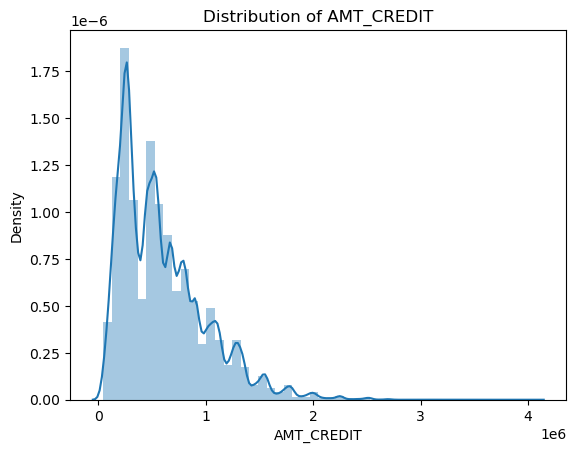

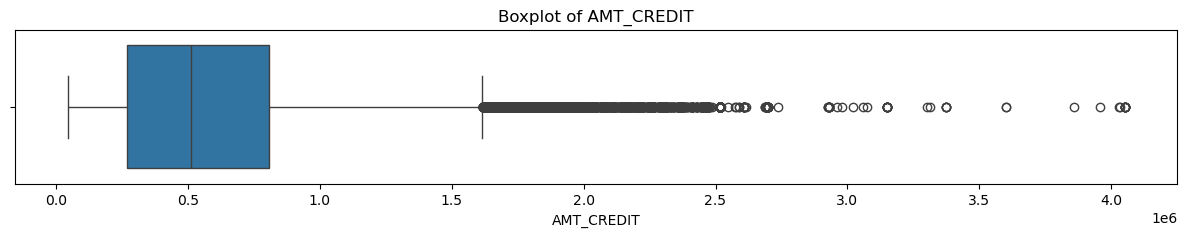

In [99]:
# Box Plot and Dist Plot for AMT_CREDIT to visualize outliers
sns.distplot(application_data['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_CREDIT'], orient='h')
plt.title('Boxplot of AMT_CREDIT')
plt.show()

In [100]:
# Describe AMT_CREDIT
application_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

**Observations:**

- Distribution: The `distplot` of `AMT_CREDIT` revealed a right-skewed distribution, indicating a concentration of credit amounts towards the lower end with a long tail of higher values.
- Outliers: The `boxplot` confirmed the presence of `outliers`, represented by data points beyond the whiskers, suggesting unusually high credit amounts.
- Descriptive Statistics: The `mean` was greater than the `median`, further supporting the right-skewness. The standard deviation was also likely high, indicating a large spread of data.

<Axes: xlabel='AMT_CREDIT'>

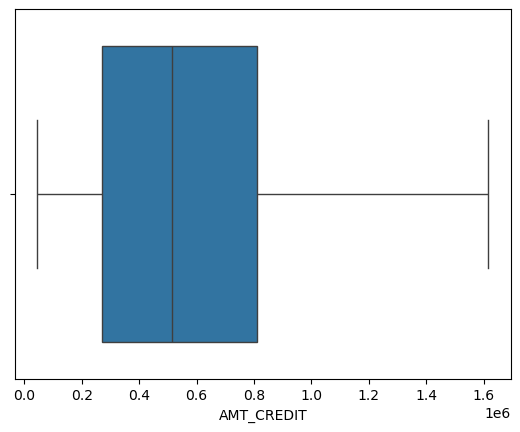

In [101]:
sns.boxplot(x='AMT_CREDIT', data=application_data, showfliers=False)

**Approach:**

- Capping at the `99th` percentile appears to be a reasonable approach for handling outliers in `AMT_CREDIT`.
- This limits extreme values without removing them entirely. It can effectively reduce the impact of outliers on your analysis and models.

In [102]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT
application_data['AMT_CREDIT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [103]:
application_data.shape

(307511, 71)

In [104]:
application_data[application_data['AMT_CREDIT']>2.500000e+06].describe()

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count     361.000000  361.000000    361.000000      3.610000e+02   
mean   289861.033241    0.038781      0.418283      3.834433e+05   
std    101117.810849    0.193341      0.678723      2.102179e+05   
min    102310.000000    0.000000      0.000000      9.000000e+04   
25%    217822.000000    0.000000      0.000000      2.295000e+05   
50%    290012.000000    0.000000      0.000000      3.330000e+05   
75%    390234.000000    0.000000      1.000000      4.500000e+05   
max    454654.000000    1.000000      3.000000      1.575000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.610000e+02     361.000000     3.610000e+02   
mean   2.660695e+06   73524.714681     2.391021e+06   
std    3.129227e+05   17388.586513     3.784959e+05   
min    2.517300e+06   63634.500000     2.151000e+06   
25%    2.517300e+06   66532.500000     2.250000e+06   
50%    2.517300e+06   68386.500000     2.250000e+06   
75%    2.695500e+06   72274.500000     2.250000e+06   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  \
count                  361.000000       361.0      361.000000   
mean                     0.030739         1.0        0.933518   
std                      0.023437         0.0        0.249469   
min                      0.001276         1.0        0.000000   
25%                      0.010032         1.0        1.000000   
50%                      0.024610         1.0        1.000000   
75%                      0.046220         1.0        1.000000   
max                      0.072508         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
count       361.000000             361.0  361.000000  361.000000   
mean          0.301939               1.0    0.421053    0.041551   
std           0.459736               0.0    0.494413    0.199838   
min           0.000000               1.0    0.000000    0.000000   
25%           0.000000               1.0    0.000000    0.000000   
50%           0.000000               1.0    0.000000    0.000000   
75%           1.000000               1.0    1.000000    0.000000   
max           1.000000               1.0    1.000000    1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count            361.000000                   361.000000   
mean               1.681440                     1.656510   
std                0.615462                     0.594902   
min                1.000000                     1.000000   
25%                1.000000                     1.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count               361.000000                  361.000000   
mean                 13.088643                    0.066482   
std                   3.446884                    0.249469   
min                   2.000000                    0.000000   
25%                  11.000000                    0.000000   
50%                  13.000000                    0.000000   
75%                  16.000000                    0.000000   
max                  20.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                  361.000000                   361.000000   
mean                     0.146814                     0.102493   
std                      0.354412                     0.303717   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       

In [105]:
# Calculate 99th percentile
cap_value = application_data['AMT_CREDIT'].quantile(0.99)

# Cap outliers
application_data.loc[application_data['AMT_CREDIT'] > cap_value, 'AMT_CREDIT'] = cap_value

In [106]:
# Plotting again
sns.distplot(application_data['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_CREDIT'], orient='h')
plt.title('Boxplot of AMT_CREDIT')
plt.show()

In [107]:
# Describing again
application_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.961537e+05
std      3.915142e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      1.854000e+06
Name: AMT_CREDIT, dtype: float64

###### Handling Outliers in `AMT_ANNUITY`

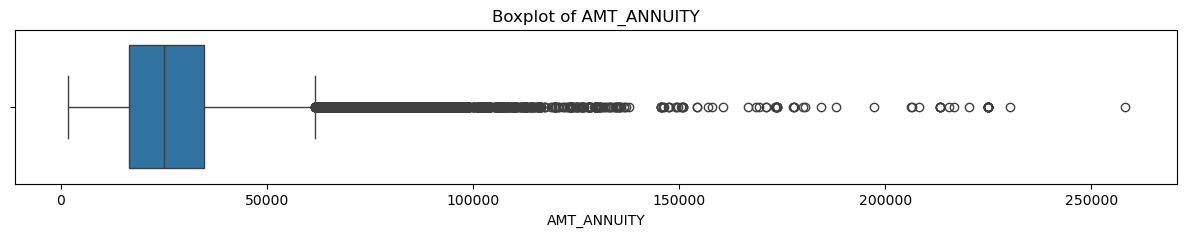

In [108]:
# Box Plot and Dist Plot for AMT_ANNUITY to visualize outliers
sns.distplot(application_data['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_ANNUITY'], orient='h')
plt.title('Boxplot of AMT_ANNUITY')
plt.show()

In [109]:
# Describe AMT_ANNUITY
application_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**Observations:**

- Distribution: The `distplot` of `AMT_ANNUITY` revealed a right-skewed distribution, indicating a concentration of loan annuity amounts towards the lower end with a long tail of higher values.
- Outliers: The `boxplot` confirmed the presence of `outliers`, represented by data points beyond the whiskers, suggesting unusually high credit amounts.
- Descriptive Statistics: The `mean` was greater than the `median`, further supporting the right-skewness. The standard deviation was also likely high, indicating a large spread of data.

In [110]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_ANNUITY
application_data['AMT_ANNUITY'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

<Axes: xlabel='AMT_ANNUITY'>

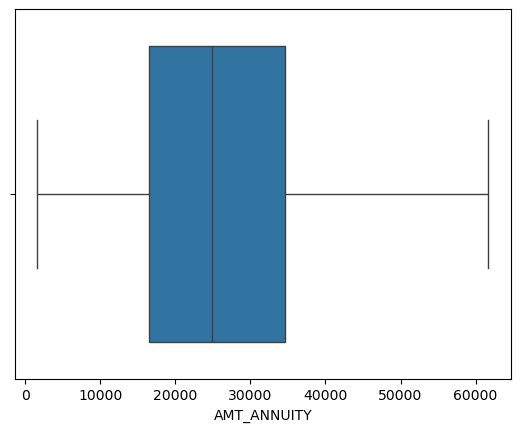

In [111]:
sns.boxplot(x='AMT_ANNUITY', data=application_data, showfliers=False)

**Approach:**

- Capping at the `99th` percentile appears to be a reasonable approach for handling outliers in `AMT_ANNUITY`.
- This limits extreme values without removing them entirely. It can effectively reduce the impact of outliers on your analysis and models.

In [112]:
# Calculate 95th percentile
cap_value = application_data['AMT_ANNUITY'].quantile(0.99)

# Cap outliers
application_data.loc[application_data['AMT_ANNUITY'] > cap_value, 'AMT_ANNUITY'] = cap_value

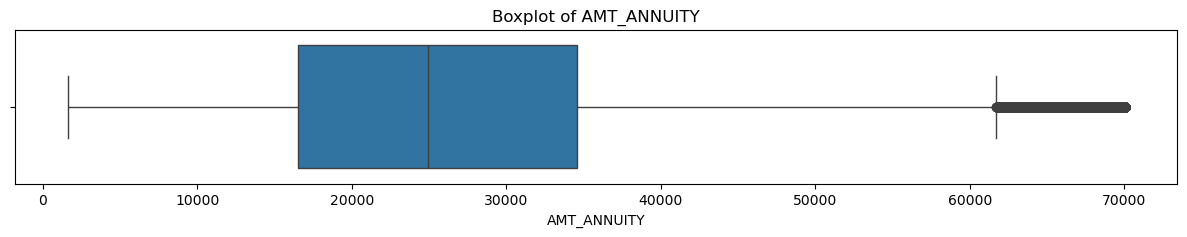

In [113]:
# Plotting again
sns.distplot(application_data['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_ANNUITY'], orient='h')
plt.title('Boxplot of AMT_ANNUITY')
plt.show()

In [114]:
# Describing again
application_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      26934.469027
std       13671.525953
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       70006.500000
Name: AMT_ANNUITY, dtype: float64

###### Handling Outliers in `AMT_GOODS_PRICE`

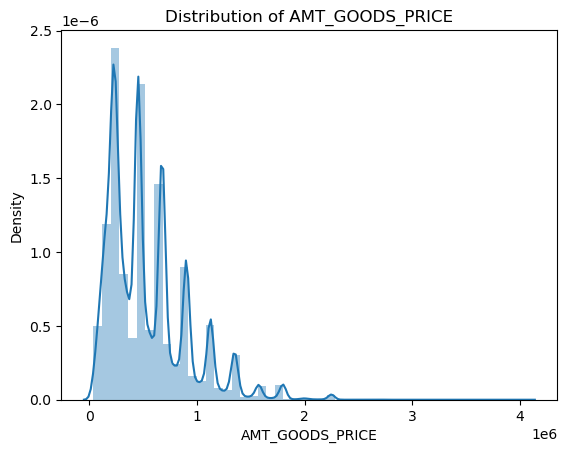

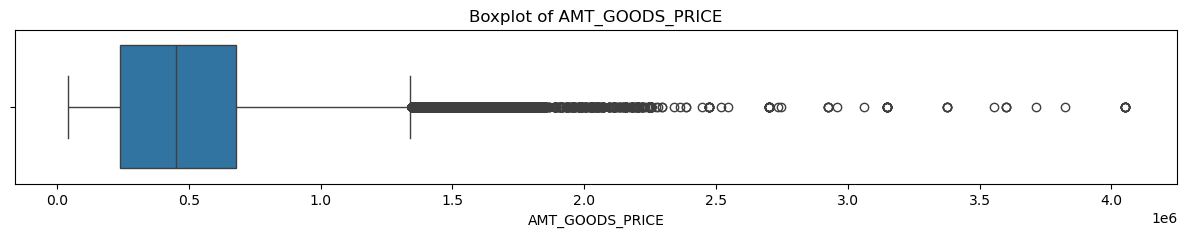

In [115]:
# Box Plot and Dist Plot for AMT_GOODS_PRICE to visualize outliers
sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_GOODS_PRICE'], orient='h')
plt.title('Boxplot of AMT_GOODS_PRICE')
plt.show()

In [116]:
# Describe AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

**Observations:**

- Distribution: The `distplot` of `AMT_GOODS_PRICE` revealed a right-skewed distribution, indicating a concentration of price of the goods towards the lower end with a long tail of higher values.
- Outliers: The `boxplot` confirmed the presence of `outliers`, represented by data points beyond the whiskers, suggesting unusually high credit amounts.
- Descriptive Statistics: The `mean` was greater than the `median`, further supporting the right-skewness. The standard deviation was also likely high, indicating a large spread of data.

In [117]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE'>

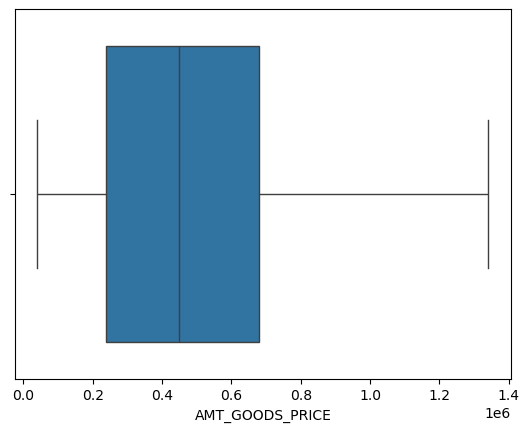

In [118]:
sns.boxplot(x='AMT_GOODS_PRICE', data=application_data, showfliers=False)

**Approach:**

- Capping at the `99th` percentile appears to be a reasonable approach for handling outliers in `AMT_GOODS_PRICE`.
- This limits extreme values without removing them entirely. It can effectively reduce the impact of outliers on your analysis and models.

In [119]:
# Calculate 99th percentile
cap_value = application_data['AMT_GOODS_PRICE'].quantile(0.99)

# Cap outliers
application_data.loc[application_data['AMT_GOODS_PRICE'] > cap_value, 'AMT_GOODS_PRICE'] = cap_value

In [120]:
# Plotting again
sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_GOODS_PRICE'], orient='h')
plt.title('Boxplot of AMT_GOODS_PRICE')
plt.show()

In [121]:
# Describing again
application_data['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.365365e+05
std      3.617692e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.800000e+06
Name: AMT_GOODS_PRICE, dtype: float64

###### Handling Outliers in `AMT_INCOME_TOTAL`

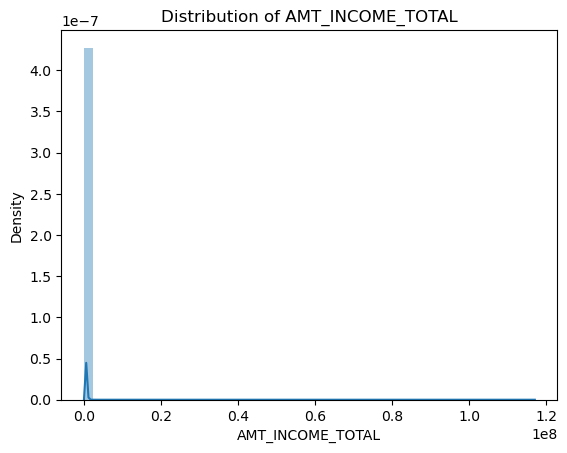

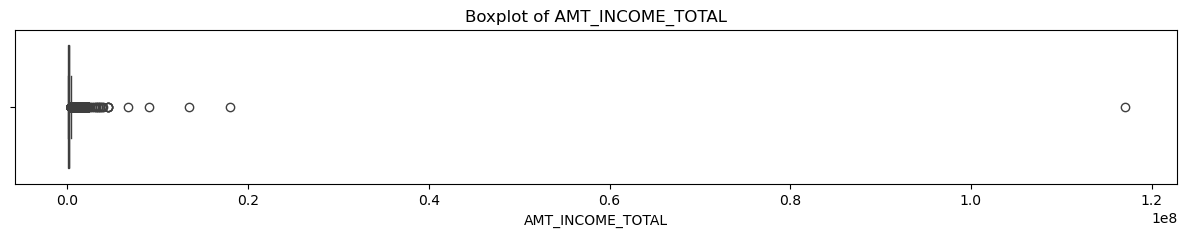

In [122]:
# Box Plot and Dist Plot for AMT_INCOME_TOTAL to visualize outliers
sns.distplot(application_data['AMT_INCOME_TOTAL'])
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_INCOME_TOTAL'], orient='h')
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

In [123]:
# Describe AMT_INCOME_TOTAL
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

**Observations:**

- Distribution: The `distplot` of `AMT_INCOME_TOTAL` revealed a right-skewed distribution, indicating a presence of some very high income values.
- Outliers: The `boxplot` confirmed the presence of `outliers`, represented by data points beyond the whiskers, suggesting unusually high credit amounts.
- Descriptive Statistics: The `mean` was greater than the `median`, further supporting the right-skewness. The standard deviation was also likely high, indicating a large spread of data.

In [124]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL
application_data['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='AMT_INCOME_TOTAL'>

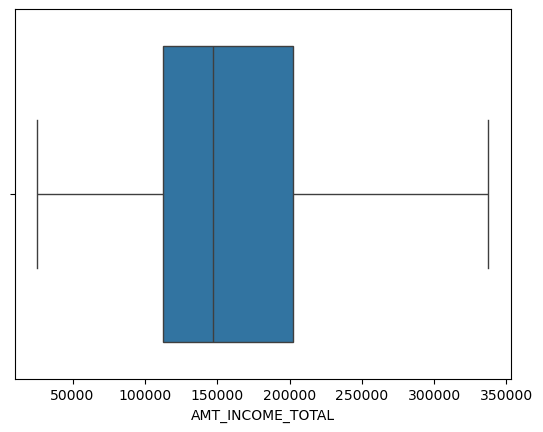

In [125]:
sns.boxplot(x='AMT_INCOME_TOTAL', data=application_data, showfliers=False)

**Approach:**

- Capping at the `99th` percentile appears to be a reasonable approach for handling outliers in `AMT_INCOME_TOTAL`.
- This limits extreme values without removing them entirely. It can effectively reduce the impact of outliers on your analysis and models.

In [126]:
# Calculate 99th percentile
cap_value = application_data['AMT_INCOME_TOTAL'].quantile(0.99)

# Cap outliers
application_data.loc[application_data['AMT_INCOME_TOTAL'] > cap_value, 'AMT_INCOME_TOTAL'] = cap_value

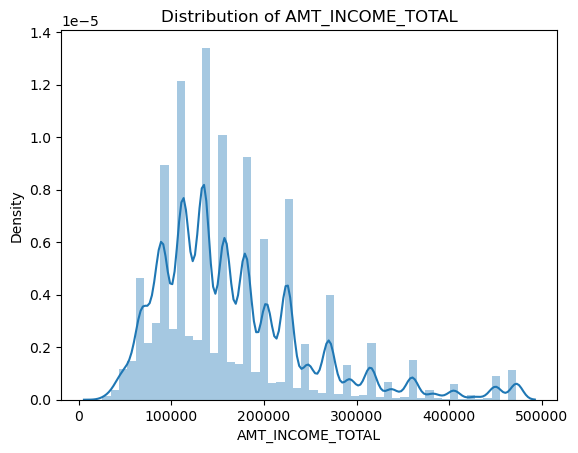

In [127]:
# Plotting again
sns.distplot(application_data['AMT_INCOME_TOTAL'])
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()
print()
plt.figure(figsize=(15,2))
sns.boxplot(application_data['AMT_INCOME_TOTAL'], orient='h')
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

##### Time-Based Features

Extreme values in these features might indicate inconsistencies or potential data errors, affecting the reliability of analysis based on client history and stability.

- `YEARS_EMPLOYED`: How many years the client has been working.
- `YEARS_REGISTRATION`: Time since registration.

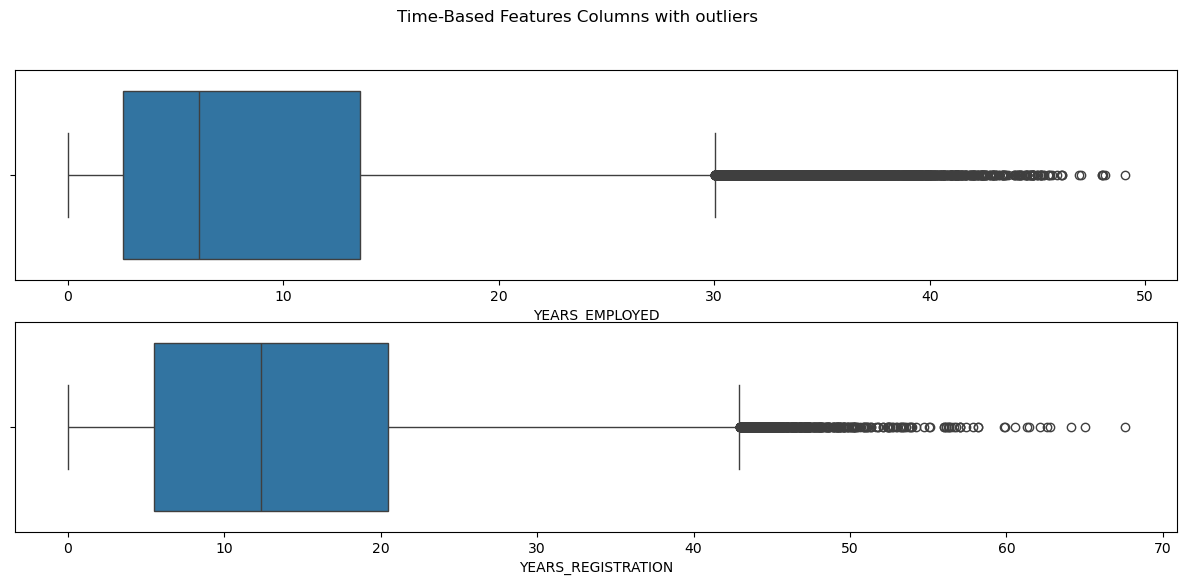

In [128]:
# Box Plot for 'YEARS_EMPLOYED','YEARS_REGISTRATION' to visualize outliers
fig, axes = plt.subplots(2, 1, figsize=(15, 6))
fig.suptitle('Time-Based Features Columns with outliers')
sns.boxplot(ax=axes[0], x='YEARS_EMPLOYED', data=application_data, orient='h')
sns.boxplot(ax=axes[1], x='YEARS_REGISTRATION', data=application_data, orient='h')
plt.show()

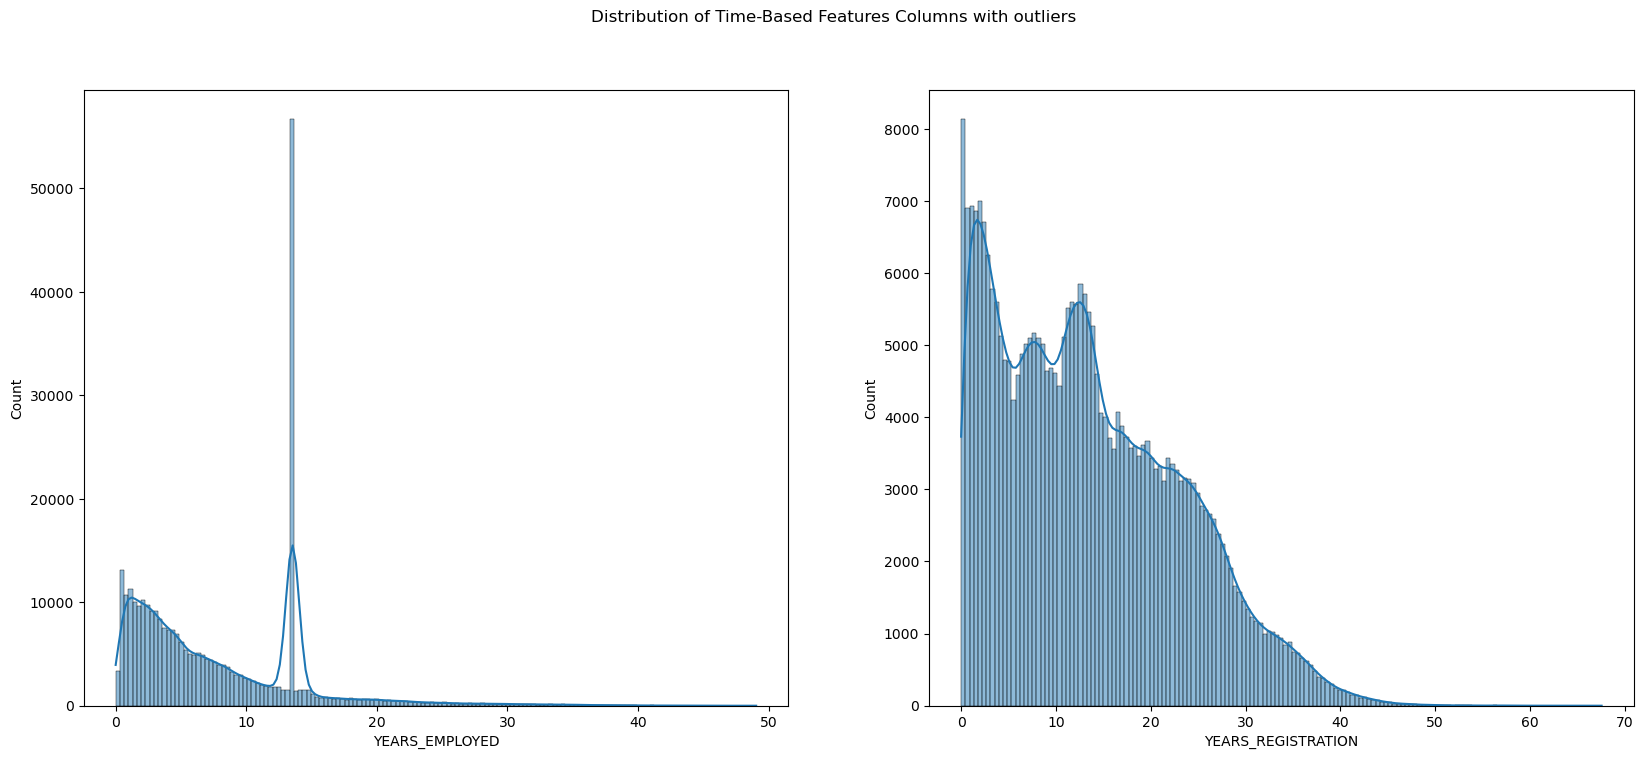

In [129]:
# Dist Plot for 'YEARS_EMPLOYED','YEARS_REGISTRATION' to visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Distribution of Time-Based Features Columns with outliers')
sns.histplot(ax=axes[0], x=application_data['YEARS_EMPLOYED'], kde=True)
sns.histplot(ax=axes[1], x=application_data['YEARS_REGISTRATION'], kde=True)
plt.show()

In [130]:
# Describe 'YEARS_EMPLOYED','YEARS_REGISTRATION'
application_data[['YEARS_EMPLOYED','YEARS_REGISTRATION']].describe()

YEARS_EMPLOYED  YEARS_REGISTRATION
count   307511.000000       307511.000000
mean         7.789439           13.651253
std          6.392995            9.645137
min          0.000000            0.000000
25%          2.554415            5.503080
50%          6.072553           12.331280
75%         13.540862           20.477755
max         49.040383           67.548255

<Axes: xlabel='YEARS_REGISTRATION'>

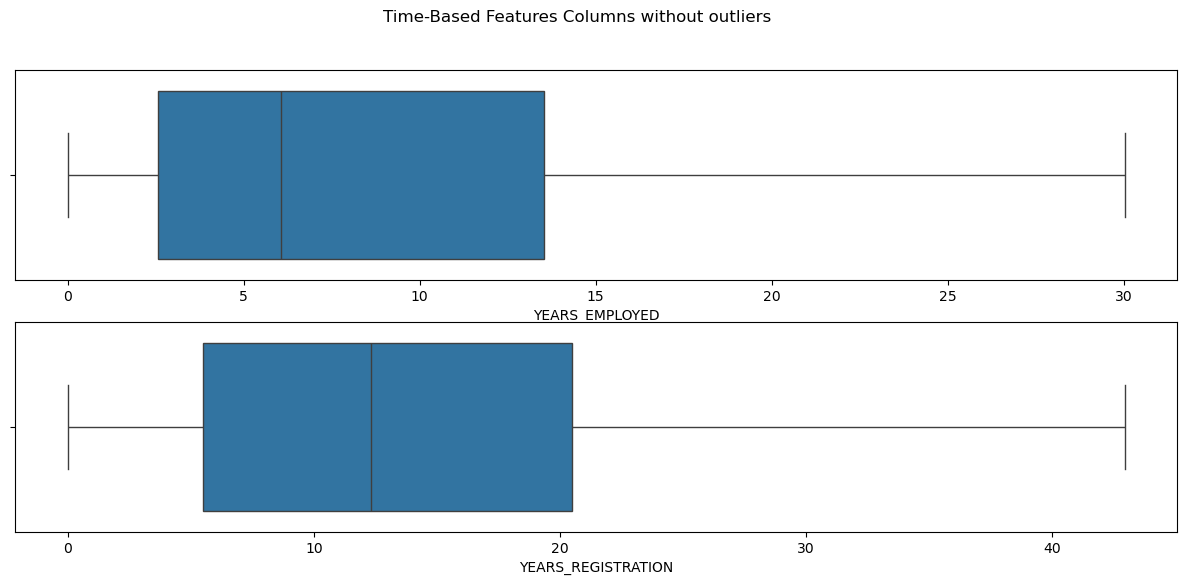

In [131]:
fig, axes = plt.subplots(2, 1, figsize=(15, 6))
fig.suptitle('Time-Based Features Columns without outliers')
sns.boxplot(ax=axes[0], x='YEARS_EMPLOYED', data=application_data, showfliers=False)
sns.boxplot(ax=axes[1], x='YEARS_REGISTRATION', data=application_data, showfliers=False)

In [132]:
# Checking the quantile for 'YEARS_EMPLOYED','YEARS_REGISTRATION'
application_data[['YEARS_EMPLOYED','YEARS_REGISTRATION']].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

YEARS_EMPLOYED  YEARS_REGISTRATION
0.50        6.072553           12.331280
0.70       12.139630           18.551677
0.90       13.540862           27.192334
0.95       18.459959           31.255305
0.99       29.828611           37.998631

**Approach:** `Capping` at the `99th` percentile.

**Rationale:**
- `Capping` retains original data points. This is crucial for understanding the magnitude of these time-based features and their influence on loan defaults.
- `Capping` effectively limits the influence of extreme values on analysis and models, leading to more robust results.
- `Capping` maintains a consistent outlier handling approach across time-based features, as `AGE_YEARS` and `YEARS_ID_PUBLISH` are not being modified.

In [133]:
# Cap outliers in YEARS_EMPLOYED at 99 percentile
cap_value = application_data['YEARS_EMPLOYED'].quantile(0.99)
application_data.loc[application_data['YEARS_EMPLOYED'] > cap_value, 'YEARS_EMPLOYED'] = cap_value

In [134]:
# Cap outliers in YEARS_REGISTRATION at 99 percentile
cap_value = application_data['YEARS_REGISTRATION'].quantile(0.99)
application_data.loc[application_data['YEARS_REGISTRATION'] > cap_value, 'YEARS_REGISTRATION'] = cap_value

In [135]:
# Box Ploting again
fig, axes = plt.subplots(2, 1, figsize=(15, 6))
fig.suptitle('Time-Based Features Columns after handling outliers')
sns.boxplot(ax=axes[0], x='YEARS_EMPLOYED', data=application_data, orient='h')
sns.boxplot(ax=axes[1], x='YEARS_REGISTRATION', data=application_data, orient='h')
plt.show()

In [136]:
# Dist Plotting again
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Distribution of Time-Based Features Columns after handling outliers')
sns.histplot(ax=axes[0], x=application_data['YEARS_EMPLOYED'], kde=True)
sns.histplot(ax=axes[1], x=application_data['YEARS_REGISTRATION'], kde=True)
plt.show()

In [137]:
# describing again
application_data[['YEARS_EMPLOYED','YEARS_REGISTRATION']].describe()

YEARS_EMPLOYED  YEARS_REGISTRATION
count   307511.000000       307511.000000
mean         7.744950           13.618375
std          6.211932            9.550169
min          0.000000            0.000000
25%          2.554415            5.503080
50%          6.072553           12.331280
75%         13.540862           20.477755
max         29.828611           37.998631

## Checking for Data Imbalance

- We will analyze the distribution of the target variable (`TARGET`) to check for data imbalance. The target variable indicates whether a client has payment difficulties.
- Further we will handle this data imbalance

### Next Steps
In the next steps, we will proceed with the univariate analysis of the data to gain further insights.

### Target Variable Distribution

- **0**: Clients without payment difficulties (paid on time)
- **1**: Clients with payment difficulties (late payments)

In [138]:
# Check for data imbalance in the target variable
target_counts = application_data['TARGET'].value_counts()
target_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

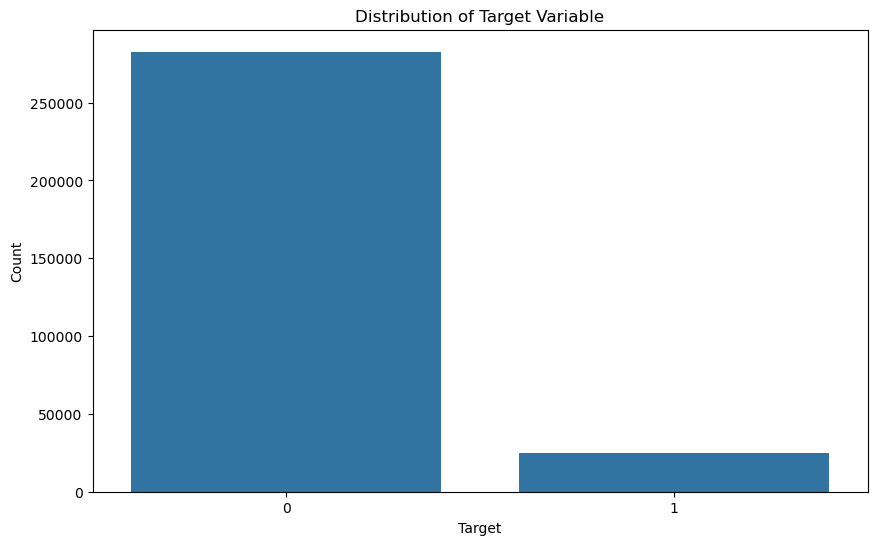

In [139]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


The distribution of the target variable is visualized using a bar plot. From our analysis, we found the following counts for each category:

- **Count of 0 (No Payment Difficulties)**: `282686`
- **Count of 1 (Payment Difficulties)**: `24825`

The results indicate that there is a data imbalance in the target variable, with significantly more clients in one category than the other.

### Handling Data Imbalance

To address the data imbalance, we can use various techniques such as:

1. Stratified Analysis:
 - Divide your dataset into strata based on the `TARGET` variable, ensuring each stratum has a similar proportion of the minority class (class 1).
 - Analyze each stratum separately to identify patterns and insights specific to each group.
 - This approach allows you to focus on the minority class while still considering the overall data distribution.

2. Weighted Statistics:
 - When calculating summary statistics or performing visualizations, apply weights to each data point based on the inverse of its class frequency.
 - This gives more weight to the minority class, effectively balancing its influence on the overall analysis.

 While helpful for balancing the influence of the minority class, it might not provide the same level of detailed insights as stratified analysis.

3. Rule-Based Filtering:
 - Based on domain knowledge or prior research, identify specific rules or criteria that are highly indicative of loan default (TARGET = 1).
 - Filter dataset to include only instances that meet these criteria, effectively enriching the proportion of the minority class.

 This approach relies heavily on domain expertise and predefined rules, which might not be readily available

4. Focus on Business Metrics:
 - Instead of solely relying on model accuracy, focus on business-relevant metrics that reflect the impact of data imbalance on decision-making.

 This strategy is valuable for evaluating the impact of data imbalance on financial outcomes but might not be as effective for identifying specific factors contributing to loan default.

Based on the business objectives, `Stratified Analysis` seems to be most reasonable.
- It allows to focus on high-risk clients, gain comparative insights, and support risk assessment and decision-making, ultimately contributing to minimizing financial losses while ensuring responsible lending practices.

In [140]:
# Create a dataframe for clients with payment difficulties (TARGET = 1)
strata_target_1 = application_data[application_data['TARGET'] == 1]
strata_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                     0.018801           1               1                0   
26                    0.018029           1               1                0   
40                    0.025164           1               1                0   
42                    0.007305           1               1                1   
81                    0.028663           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                  1           1           0        Laborers   
26                 1           0           0   Cooking staff   
40                 1           0           0        Laborers   
42                 1           1           0     Sales staff   
81                 1           0           0         Unknown   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                     

In [141]:
# Create a dataframe for clients without payment difficulties (TARGET = 0)
strata_target_0 = application_data[application_data['TARGET'] == 0]
strata_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1                    0.003541           1               1                0   
2                    0.010032           1               1                1   
3                    0.008019           1               1                0   
4                    0.028663           1               1                0   
5                    0.035792           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
1                 1           1           0      Core staff   
2                 1           1           0        Laborers   
3                 1           0           0        Laborers   
4                 1           0           0      Core staff   
5                 1           1           0        Laborers   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE 

In [142]:
# Calculate descriptive statistics for numerical features in strata_target_1
strata_target_1.describe()

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   24825.000000  24825.0  24825.000000      24825.000000  2.482500e+04   
mean   277449.167936      1.0      0.463807     159497.289607  5.564905e+05   
std    102383.123458      0.0      0.756903      76312.198084  3.404733e+05   
min    100002.000000      1.0      0.000000      25650.000000  4.500000e+04   
25%    189555.000000      1.0      0.000000     112500.000000  2.844000e+05   
50%    276291.000000      1.0      0.000000     135000.000000  4.975200e+05   
75%    366050.000000      1.0      1.000000     202500.000000  7.333155e+05   
max    456254.000000      1.0     11.000000     472500.000000  1.854000e+06   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  FLAG_MOBIL  \
count  24825.000000     2.482500e+04                24825.000000     24825.0   
mean   26427.207915     4.882466e+05                    0.019131         1.0   
std    12197.801590     3.078912e+05                    0.011905         0.0   
min     2722.500000     4.500000e+04                    0.000533         1.0   
25%    17361.000000     2.385000e+05                    0.009630         1.0   
50%    25263.000000     4.500000e+05                    0.018634         1.0   
75%    32976.000000     6.750000e+05                    0.025164         1.0   
max    70006.500000     1.800000e+06                    0.072508         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count    24825.000000     24825.000000      24825.000000  24825.000000   
mean         0.879517         0.237825          0.998187      0.244955   
std          0.325532         0.425760          0.042538      0.430069   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      0.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count  24825.000000          24825.000000                 24825.000000   
mean       0.055347              2.153635                     2.134824   
std        0.228662              0.505052                     0.499909   
min        0.000000              1.000000                     1.000000   
25%        0.000000              2.000000                     2.000000   
50%        0.000000              2.000000                     2.000000   
75%        0.000000              2.000000                     2.000000   
max        1.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             24825.000000                24825.000000   
mean                 11.797100                    0.017442   
std                   3.284299                    0.130914   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                24825.000000                 24825.000000   
mean                     0.055911                     0.042538   
std                      0.229755                     0.201817   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count            24825.000000   

In [143]:
# Calculate descriptive statistics for categorical features in strata_target_1
strata_target_1.describe(include=['object'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               24825       24825        24825           24825   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                23221       14170        17249           16983   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            24825            24825                          24825   
unique               7                6                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             20407            15224                          19524   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count               24825              24825           24825   
unique                  5                  6              19   
top               Married  House / apartment         Unknown   
freq                14850              21272            6278   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
count                       24825                   24825  
unique                          7                      57  
top                       TUESDAY  Business Entity Type 3  
freq                         4501                    9313

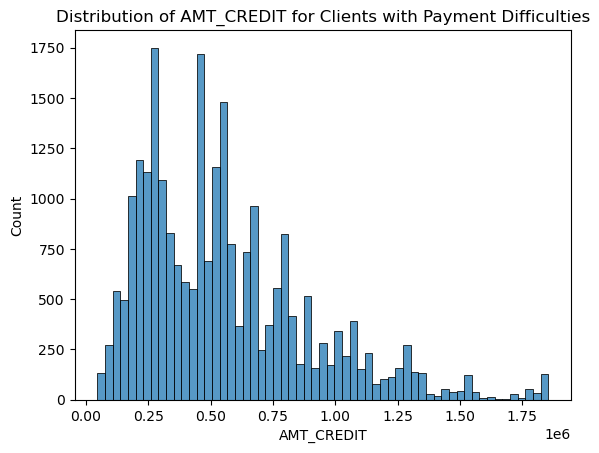

In [144]:
# Create a histogram of 'AMT_CREDIT' for strata_target_1
sns.histplot(strata_target_1['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT for Clients with Payment Difficulties')
plt.show()

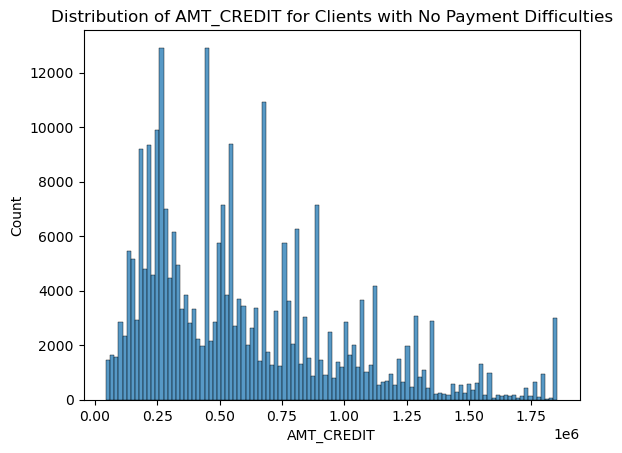

In [145]:
# Create a histogram of 'AMT_CREDIT' for strata_target_0
sns.histplot(strata_target_0['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT for Clients with No Payment Difficulties')
plt.show()

The `histograms` suggest that:

- Most loans are for lower credit amounts, regardless of whether the client experiences payment difficulties.
- There might be a slightly higher tendency for clients with payment difficulties to have borrowed lower credit amounts.
- Certain credit amount ranges might be associated with a higher risk of default, requiring further analysis for better risk assessment.

**Important Note:** These inferences are based on visual observations of the histograms. For more rigorous conclusions, statistical tests and quantitative analysis are crucial to confirm and quantify these trends.

In [146]:
from scipy import stats

# Perform a t-test to compare the means of 'AMT_INCOME_TOTAL' between the two strata
t_statistic, p_value = stats.ttest_ind(strata_target_1['AMT_INCOME_TOTAL'], strata_target_0['AMT_INCOME_TOTAL'])
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -12.91969048300496, P-value: 3.566191838139945e-38


The results of the above `Hypothesis Testing` strongly suggest that clients with lower total income are more likely to experience payment difficulties. This information is valuable for loan risk assessment and decision-making, as it highlights income as an important factor to consider when evaluating loan applications.

**Note:** Correlation does not equal causation. While this analysis shows a strong association between lower income and loan default risk, it doesn't necessarily mean that lower income causes loan defaults. Other factors might be involved as well.

---

In [147]:
# Printing the dataset after Data Cleaning
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                    0.018801           1               1                0   
1                    0.003541           1               1                0   
2                    0.010032           1               1                1   
3                    0.008019           1               1                0   
4                    0.028663           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                 1           1           0        Laborers   
1                 1           1           0      Core staff   
2                 1           1           0        Laborers   
3                 1           0           0        Laborers   
4                 1           0           0      Core staff   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0  

In [148]:
application_data.shape

(307511, 71)

## Univariate Analysis

Selected some specific numerical and categorical columns for this analysis:
- The selected numerical columns reflect `financial aspects` (credit, income, annuity), `demographic factors` (age), and `external risk scores`. These are essential for assessing loan default risk.
- The categorical columns provide insights into the client's `personal` and `professional` background, which can influence their financial behavior and loan repayment abilities.

### Numerical Columns
We performed univariate analysis on several numerical columns to understand their distributions:

- `AMT_CREDIT`: Credit amount of the loan.
- `AMT_ANNUITY`: Loan annuity. This represents the fixed periodic payment the client is obligated to make.
- `AMT_GOODS_PRICE`: For consumer loans, the price of the goods for which the loan is given.
- `AMT_INCOME_TOTAL`: Income of the client.
- `AGE_YEARS`: Age of the client derived from `DAYS_BIRTH`.
- `YEARS_EMPLOYED`: Client's employment history in years derived from `DAYS_EMPLOYED`.
- `EXT_SOURCE_2` & `EXT_SOURCE_3`: Normalized scores from external data sources.

In [149]:
# List of numerical columns to analyze
numerical_columns = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED','EXT_SOURCE_2', 'EXT_SOURCE_3']
numerical_columns


['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

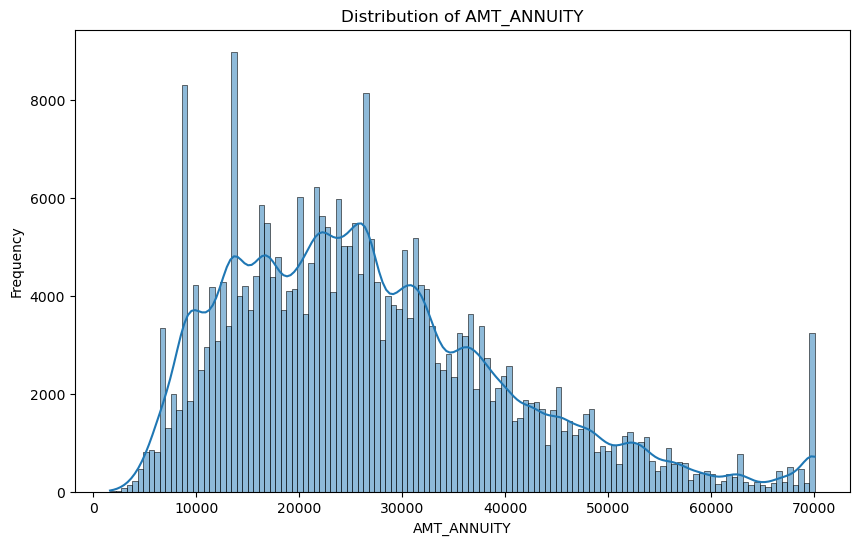

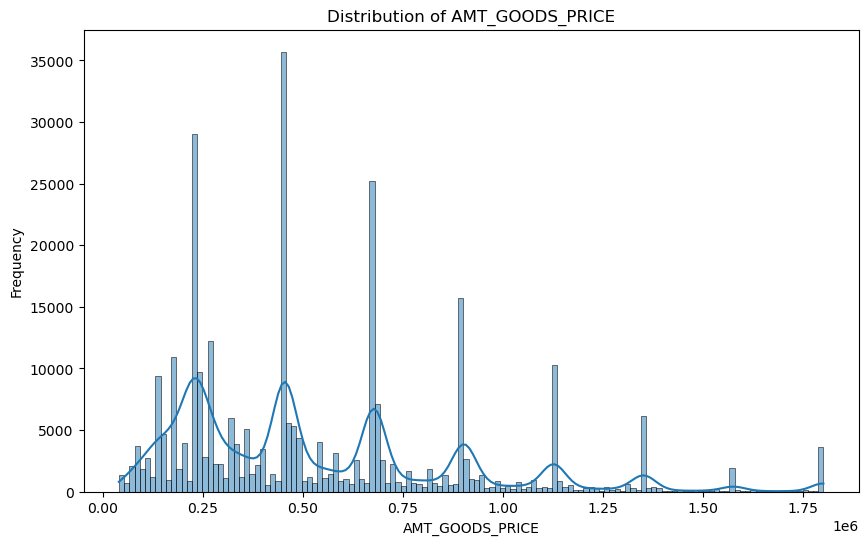

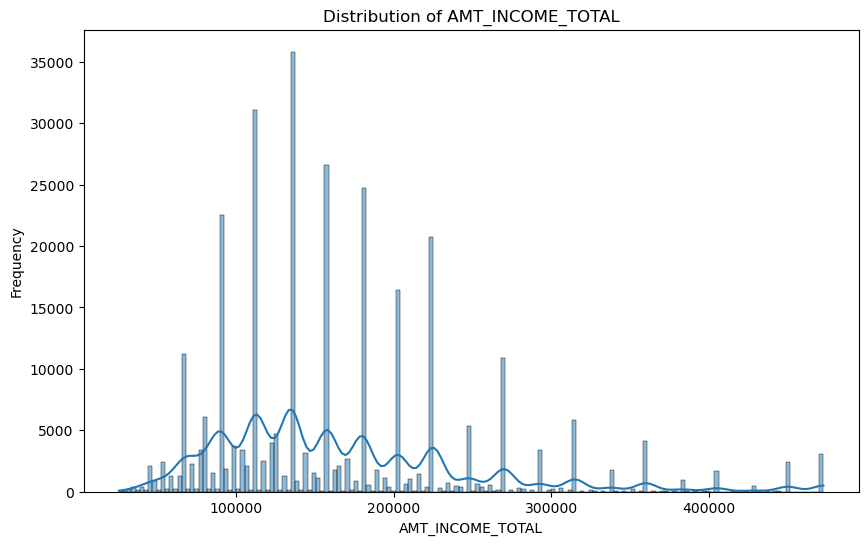

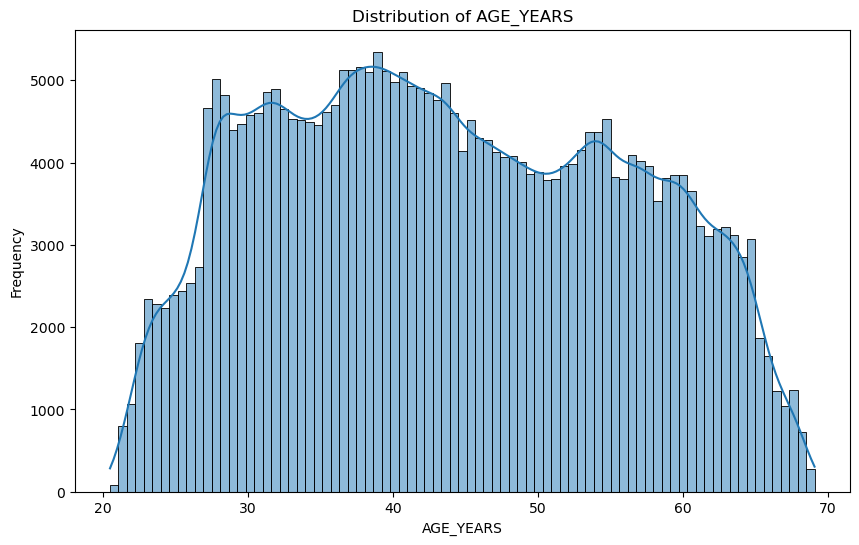

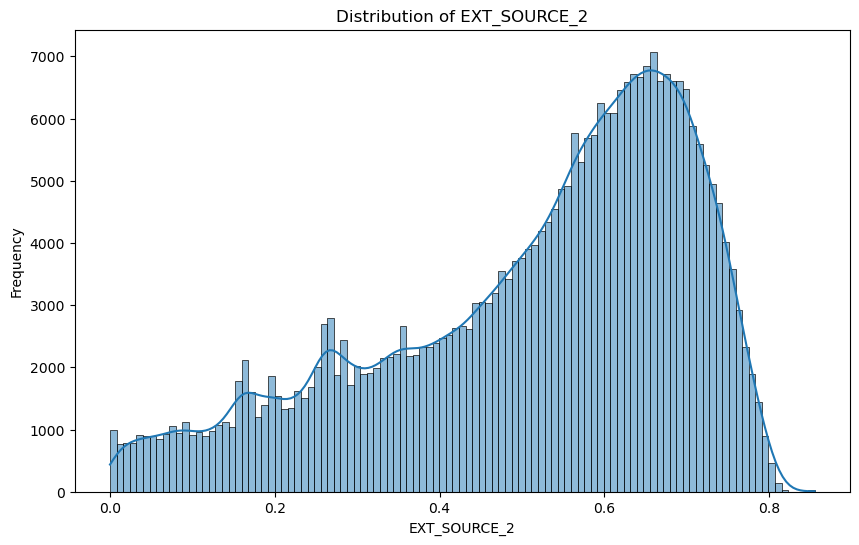

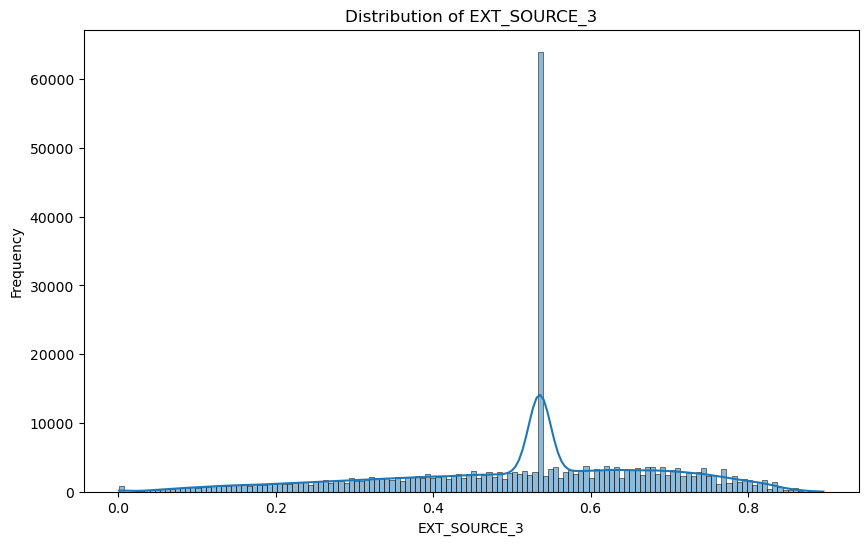

In [150]:
# Univariate analysis for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(application_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- `AMT_CREDIT`- The distribution of `AMT_CREDIT` is right-skewed, suggesting that a majority of loans have smaller credit amounts, likely in the range of **[0 - 500,000]**, while a smaller portion has larger credit amounts, potentially in the range of **[500,000 - 1,500,000]** or even higher.

 This information is crucial for understanding the overall risk profile of the loan portfolio and can inform lending strategies and risk mitigation measures.
- `AMT_ANNUITY`- The distribution of `AMT_ANNUITY` is right-skewed, suggesting that a majority of loans have smaller annuity payments, likely in the range of **[0 - 20,000]** per month, while a smaller portion has larger annuity payments, potentially in the range of **[20,000 - 70,000]** or even higher.

 This information is crucial for understanding the overall risk profile of the loan portfolio and can inform lending strategies and risk mitigation measures. For instance, the bank might want to consider offering flexible repayment options to clients with high annuity payments to reduce the risk of default.
- `AMT_GOODS_PRICE`- The distribution of `AMT_GOODS_PRICE` is right-skewed with multiple peaks, suggesting that a majority of loans are given for goods with lower prices, likely in the range of **[0 - 500,000]** or **[1,000,000 - 1,500,000]**, while a smaller portion is for goods with higher prices.

 This information is crucial for understanding the overall risk profile of the loan portfolio. For instance, the bank might want to analyze the default rates for loans given for different price segments of goods to identify areas of higher risk and adjust lending policies accordingly.
- `AMT_INCOME_TOTAL`- The distribution of `AMT_INCOME_TOTAL` is right-skewed with multiple peaks, suggesting that a majority of clients have incomes in certain ranges, likely in the range of **[100,000 - 200,000]** and **[200,000 - 300,000]**, while a smaller portion has higher incomes.

 This information is crucial for understanding the overall risk profile of the loan portfolio. For instance, the bank might want to analyze the default rates for loans given to clients in different income segments to identify areas of higher risk and adjust lending policies accordingly.
- `AGE_YEARS`- The distribution of `AGE_YEARS` appears to be relatively uniform across the age range of **20 to 60** years, with a slight concentration in the **30-40** year age range.

 This information is crucial for understanding the overall risk profile of the loan portfolio. For instance, the bank might want to analyze the default rates for loans given to clients in different age segments to identify areas of higher risk and adjust lending policies accordingly.
- `YEARS_EMPLOYED`- The distribution of `YEARS_EMPLOYED` is highly skewed to the right, suggesting that a majority of clients have been employed for a considerable duration, likely in the range of **5 to 15** years. A smaller portion has shorter employment history, which could potentially pose a higher risk of default due to income instability.

 This information is crucial for understanding the overall risk profile of the loan portfolio. For instance, the bank might want to analyze the default rates for loans given to clients with different employment durations to identify areas of higher risk and adjust lending policies accordingly.
- `EXT_SOURCE_2` & `EXT_SOURCE_3`- Both `EXT_SOURCE_2` and `EXT_SOURCE_3` exhibit left-skewed distributions, suggesting that a majority of clients have higher values for these external scores.

 This implies that these external scores could be valuable predictors of loan default, with lower values potentially indicating higher risk.

### Categorical Columns
We also performed univariate analysis on several categorical columns to understand their distributions:

- `NAME_CONTRACT_TYPE`: Identifies whether the loan is cash or revolving.
- `CODE_GENDER`: Gender of the client.
- `NAME_INCOME_TYPE`: Client's income type (e.g., Working, Commercial associate, Pensioner).
- `NAME_EDUCATION_TYPE`: Client's education level.
- `NAME_FAMILY_STATUS`: Family status of the client (e.g., Married, Single/not married, Civil marriage).
- `OCCUPATION_TYPE`: Occupation of the client.

In [151]:
# List of categorical columns to analyze
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
categorical_columns


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE']

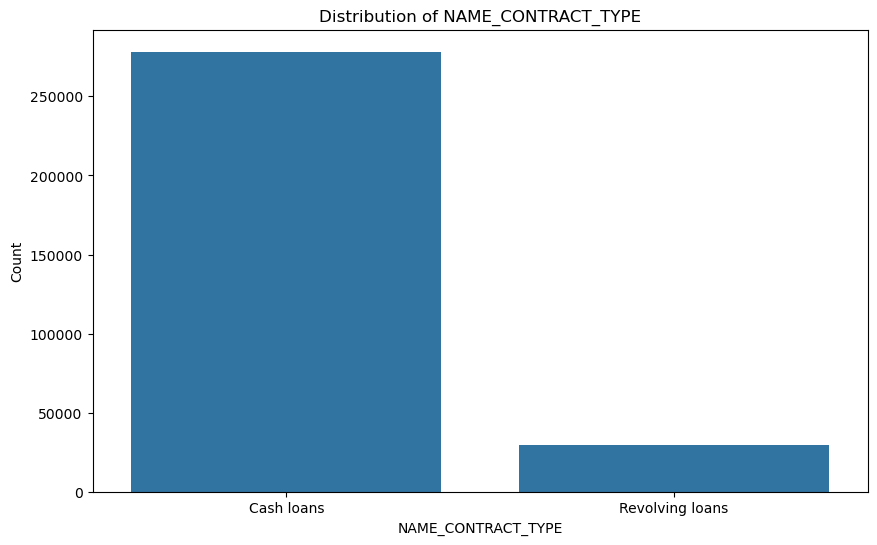

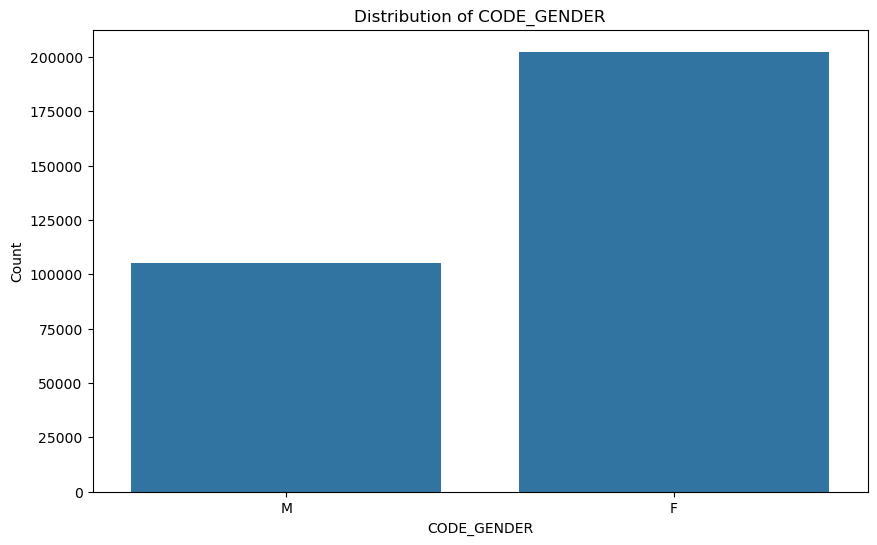

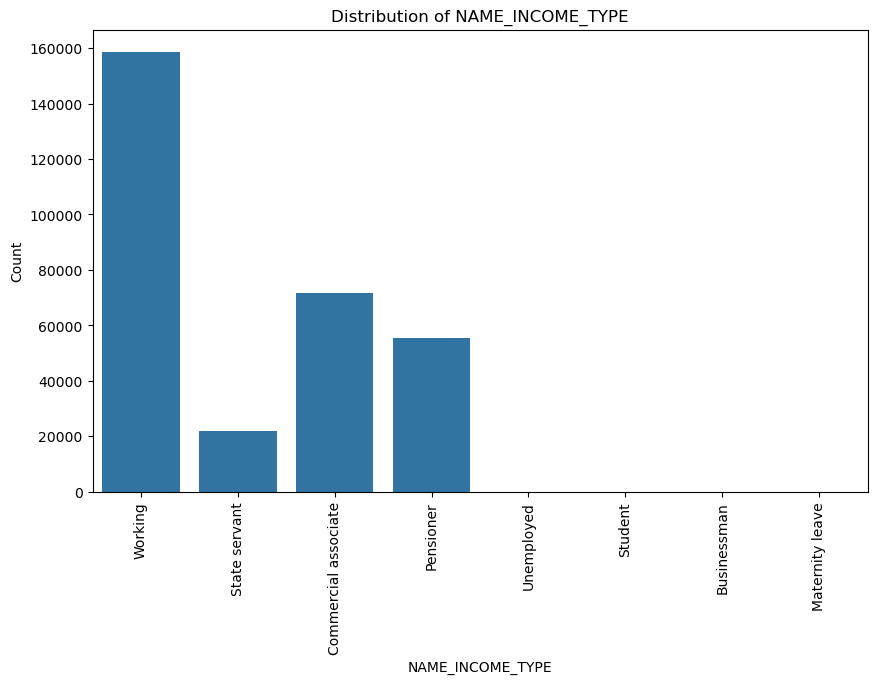

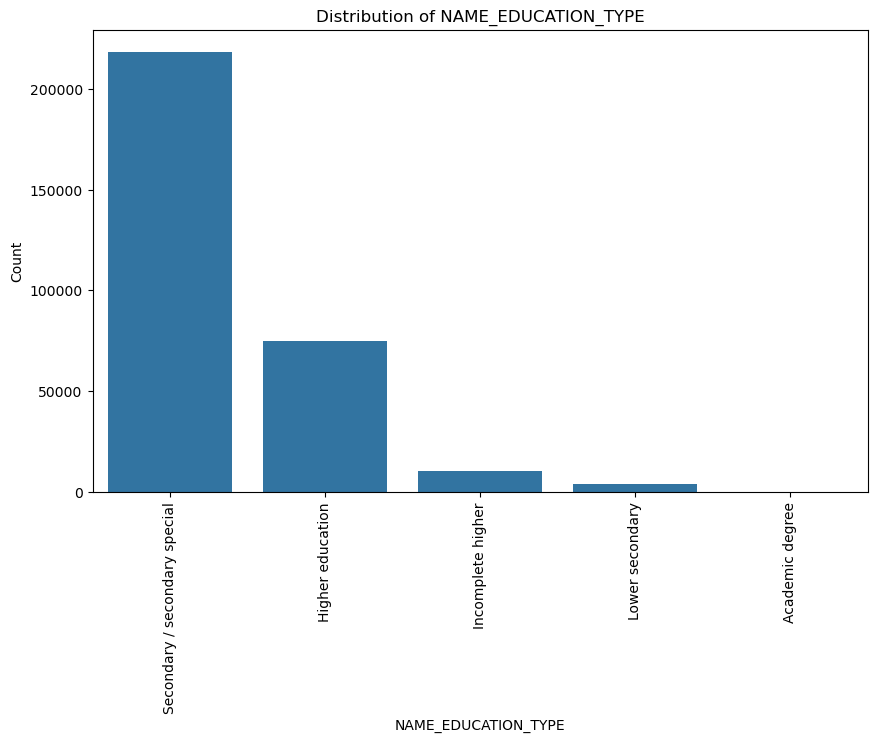

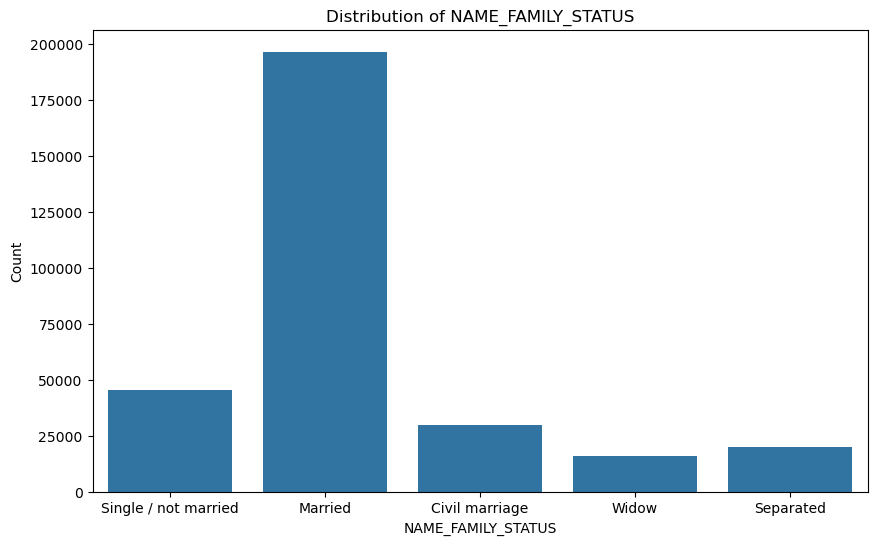

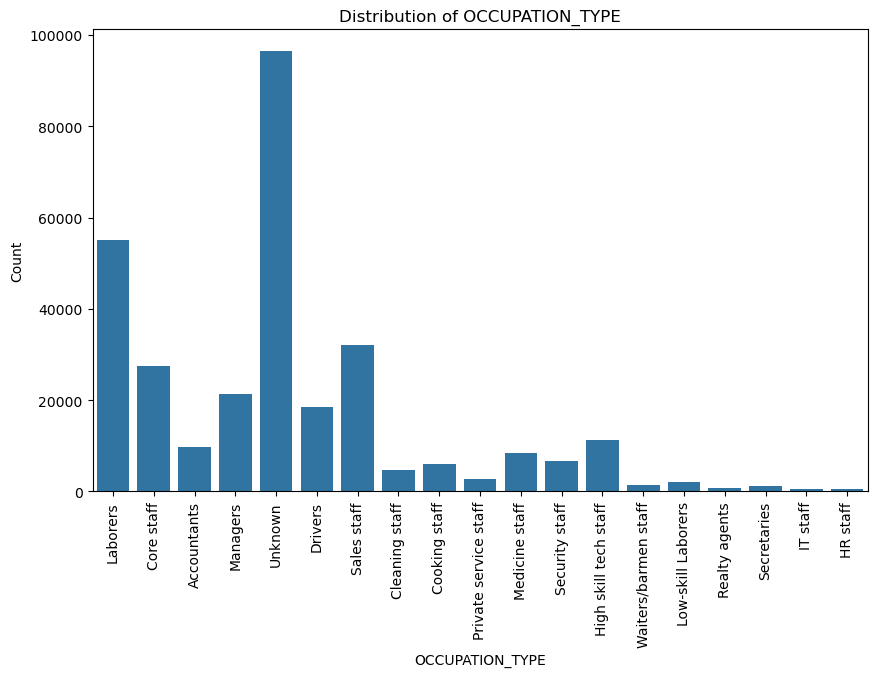

In [152]:
# Univariate analysis for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=application_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    if column in ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']:
        plt.xticks(rotation=90)
    plt.show()

- `NAME_CONTRACT_TYPE`- The dataset is heavily skewed towards `Cash loans`, with approximately `80%` of the loans being `cash loans` and only `20%` being `revolving loans`.

 This imbalance in loan types suggests that the bank might need to focus its risk management strategies primarily on cash loans.
- `CODE_GENDER`- The dataset contains a significantly higher number of `female` clients (approximately `65%`) compared to `male` clients (approximately `35%`).

 This imbalance in gender distribution suggests that the bank might need to focus its risk management strategies on both genders, considering potential differences in default rates and risk profiles.
- `NAME_INCOME_TYPE`- The dataset is heavily skewed towards `Working` individuals (approximately `50%`), followed by `Pensioners` (approximately `20%`).

 This suggests that the bank might need to focus its risk management strategies on these two groups, while also paying attention to potentially higher-risk segments like `Unemployed` and `Maternity leave`.
- `NAME_EDUCATION_TYPE`- The dataset is heavily skewed towards clients with `Secondary / secondary special` education (approximately `60%`).

 This suggests that the bank might need to focus its risk management strategies on this group, while also paying attention to potentially higher-risk segments like `Lower secondary` and `Incomplete higher` education levels.
- `NAME_FAMILY_STATUS`- The dataset is heavily skewed towards `Married` individuals (approximately `50%`), followed by `Single / not married` (approximately `30%`).

 This suggests that the bank might need to focus its risk management strategies on these two groups, while also paying attention to potentially higher-risk segments like `Separated` and `Widow` due to potential financial instability.
- `OCCUPATION_TYPE`- The dataset is heavily skewed towards `Laborers` (approximately `20%`), followed by `Sales staff` and `Core staff`.

 This suggests that the bank might need to focus its risk management strategies on these groups, while also paying attention to potentially higher-risk segments like `Low-skill Laborers` and `Waiters/barmen staff` due to potential income instability.

### Key Insights
From our univariate analysis, we can infer that the bank should prioritize risk management strategies for segments with potentially higher default risk, such as:

- Loans with `high credit amounts` and `annuity payments`.
- Loans for `high-priced goods`.
- Loans to clients with `low income`, `shorter employment history`, `lower external scores`, and `lower education levels`.
- Loans to clients who are `unemployed`, on `maternity leave`, or have `unstable occupations`.
- Loans to `specific demographics` (e.g., some family statuses, genders).

## Data Cleaning & Preparation of `previous_application`

### Dataset Overview

In [153]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [154]:
previous_application.shape

(1670214, 37)

In [155]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [156]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Handling Missing Data

In [157]:
# Identify missing data in previous_application
missing_col = identify_missing_data(previous_application)
missing_col

Missing Values  Percentage
RATE_INTEREST_PRIMARY             1664263   99.643698
RATE_INTEREST_PRIVILEGED          1664263   99.643698
AMT_DOWN_PAYMENT                   895844   53.636480
RATE_DOWN_PAYMENT                  895844   53.636480
NAME_TYPE_SUITE                    820405   49.119754
DAYS_FIRST_DRAWING                 673065   40.298129
DAYS_FIRST_DUE                     673065   40.298129
DAYS_LAST_DUE_1ST_VERSION          673065   40.298129
DAYS_LAST_DUE                      673065   40.298129
DAYS_TERMINATION                   673065   40.298129
NFLAG_INSURED_ON_APPROVAL          673065   40.298129
AMT_GOODS_PRICE                    385515   23.081773
AMT_ANNUITY                        372235   22.286665
CNT_PAYMENT                        372230   22.286366
PRODUCT_COMBINATION                   346    0.020716
AMT_CREDIT                              1    0.000060

#### Dropping columns with more than `40%` missing values

In [158]:
# Fetching columns to drop
threshold = 40
columns_to_drop = missing_col[missing_col['Percentage'] > threshold].index
columns_to_drop

Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [159]:
previous_application.drop(columns=columns_to_drop, inplace=True)

In [160]:
# Identify new missing data in previous_application
missing_col = identify_missing_data(previous_application)
missing_col

Missing Values  Percentage
AMT_GOODS_PRICE              385515   23.081773
AMT_ANNUITY                  372235   22.286665
CNT_PAYMENT                  372230   22.286366
PRODUCT_COMBINATION             346    0.020716
AMT_CREDIT                        1    0.000060

#### Analysing `AMT_GOODS_PRICE`

In [161]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

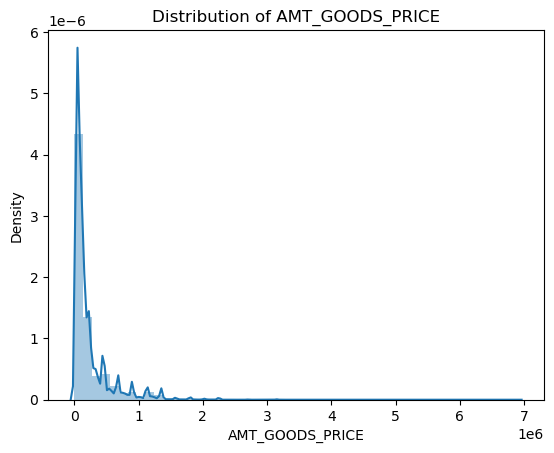

In [162]:
# Checking the Distribution
sns.distplot(previous_application['AMT_GOODS_PRICE'])
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()

In [163]:
previous_application['AMT_GOODS_PRICE'].median(), previous_application['AMT_GOODS_PRICE'].mean(), previous_application['AMT_GOODS_PRICE'].mode()

(112320.0,
 227847.27928334562,
 0    45000.0
 Name: AMT_GOODS_PRICE, dtype: float64)

**Approach:**

After careful consideration of the data distribution decided to `impute` the missing values using the `median`.

**Rationale:**

- The `median` is less sensitive to outliers compared to the `mean`, making it a more robust choice for imputation, especially given the right-skewed distribution of `AMT_GOODS_PRICE`.
- Imputing with the `median` preserves the overall distribution of the data, minimizing potential bias and ensuring data integrity for analysis.
- Using the `median` provides a clear and easily understandable imputation strategy, facilitating interpretation of the results.

In [164]:
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median(), inplace=True)

#### Analysing `AMT_ANNUITY`

In [165]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

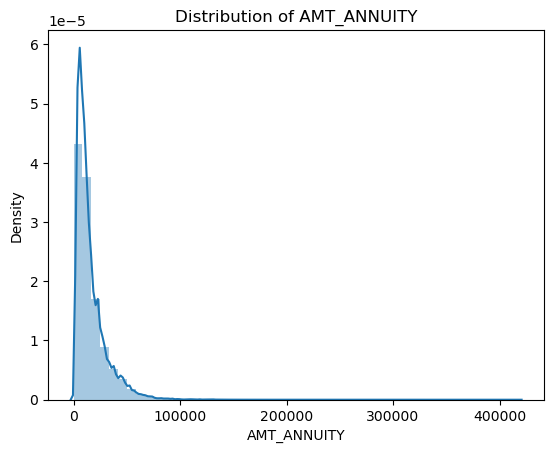

In [166]:
# Checking the Distribution
sns.distplot(previous_application['AMT_ANNUITY'])
plt.title('Distribution of AMT_ANNUITY')
plt.show()

In [167]:
previous_application['AMT_ANNUITY'].median(), previous_application['AMT_ANNUITY'].mean(), previous_application['AMT_ANNUITY'].mode()

(11250.0,
 15955.120659452119,
 0    2250.0
 Name: AMT_ANNUITY, dtype: float64)

**Approach:** Here this data is very similar with that of `AMT_GOODS_PRICE`. So, following the same approach if imputing the missing values with the `median`.

In [168]:
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(), inplace=True)

#### Analysing `CNT_PAYMENT`

In [169]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

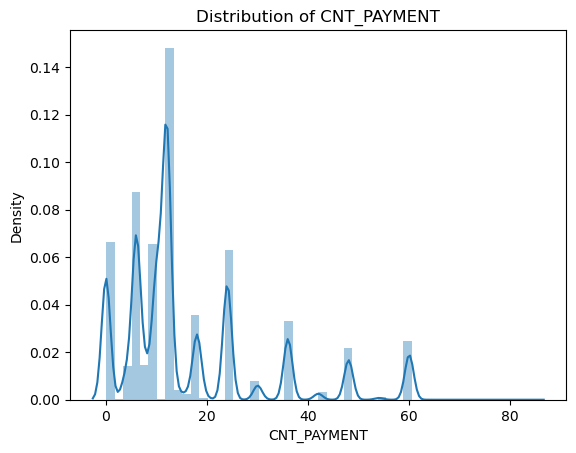

In [170]:
# Checking the Distribution
sns.distplot(previous_application['CNT_PAYMENT'])
plt.title('Distribution of CNT_PAYMENT')
plt.show()

In [171]:
previous_application['CNT_PAYMENT'].median(), previous_application['CNT_PAYMENT'].mean(), previous_application['CNT_PAYMENT'].mode()

(12.0,
 16.0540815603274,
 0    12.0
 Name: CNT_PAYMENT, dtype: float64)

**Approach:** Missing values in CNT_PAYMENT were imputed using the median/mode value (12.0), representing a typical 12-month term. This approach balances information retention, statistical soundness, and reduced bias.

In [172]:
previous_application['CNT_PAYMENT'].fillna(previous_application['CNT_PAYMENT'].median(), inplace=True)

#### Analysing `PRODUCT_COMBINATION`

In [173]:
previous_application['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [174]:
previous_application['PRODUCT_COMBINATION'].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [175]:
previous_application['PRODUCT_COMBINATION'].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

<Axes: xlabel='PRODUCT_COMBINATION'>

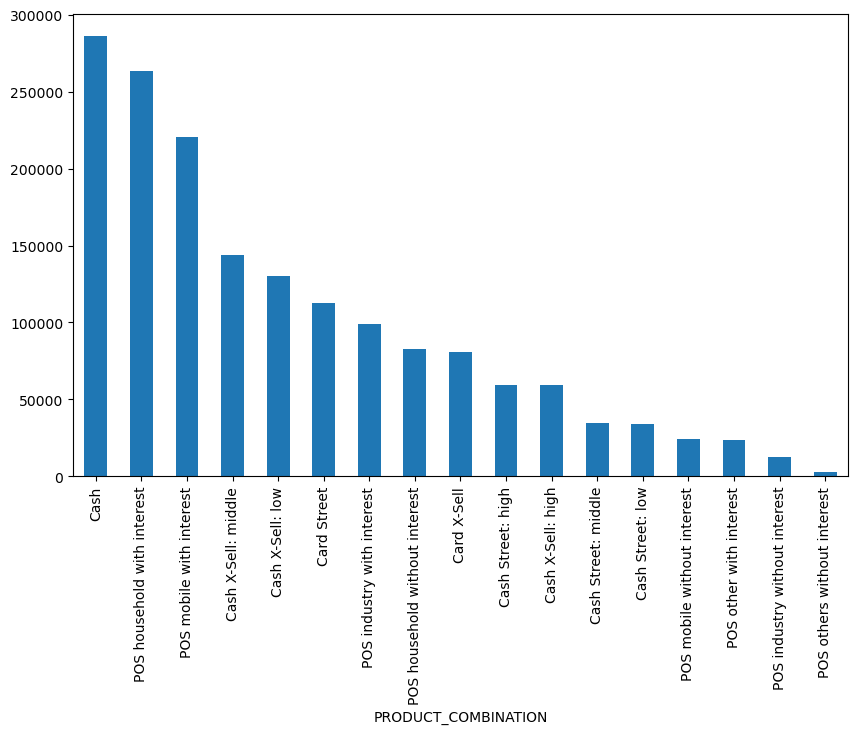

In [176]:
previous_application['PRODUCT_COMBINATION'].value_counts().plot.bar(figsize = (10, 6))

In [177]:
previous_application['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

**Approach:**

Missing values in `PRODUCT_COMBINATION` were imputed using the `mode` value, which is `Cash`. This aligns with the dominant trend in the data.

**Note:** While the impact is likely minimal, this approach could introduce some bias if missing values are not missing at random.

In [178]:
previous_application['PRODUCT_COMBINATION'].fillna(previous_application['PRODUCT_COMBINATION'].mode()[0], inplace=True)

#### Analysing `AMT_CREDIT`

In [179]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

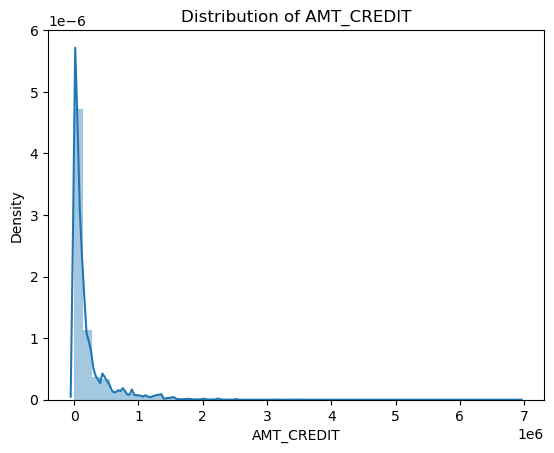

In [180]:
# Checking the Distribution
sns.distplot(previous_application['AMT_CREDIT'])
plt.title('Distribution of AMT_CREDIT')
plt.show()

**Observation:**

This also showing similar trend as of `AMT_ANNUITY` & `AMT_GOODS_PRICE`. Further the missing count is also only `1`. So, imputing the missing value with the `median`.

In [181]:
# Impute with median
previous_application['AMT_CREDIT'].fillna(previous_application['AMT_CREDIT'].median(), inplace=True)

---

In [182]:
# Printing the dataset after handling missing values
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

### Handling Incorrect/Unknown Values

#### Analysing Numerical values

In [183]:
# Describing the columns for analysing numerical values
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670214e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     2.011815e+05             1.248418e+01   
std    3.185745e+05     2.808629e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.515057e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.295220e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  1.000000e+01  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  1.600000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

##### Analysing `DAYS_DECISION`

In [184]:
# Describing DAYS_DECISION
previous_application['DAYS_DECISION'].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [185]:
previous_application['DAYS_DECISION'].nunique()

2922

In [186]:
previous_application['DAYS_DECISION'].value_counts().head()

DAYS_DECISION
-245    2444
-238    2390
-210    2375
-273    2350
-196    2315
Name: count, dtype: int64

In [187]:
previous_application['DAYS_DECISION'].value_counts().tail()

DAYS_DECISION
-2882    163
-2922    162
-2921    158
-2902    148
-1         2
Name: count, dtype: int64

In [188]:
previous_application['DAYS_DECISION'].dtype

dtype('int64')

**Approach:**

- The absolute value of `DAYS_DECISION` was calculated to convert negative values to positive, representing the time elapsed since the previous decision.
- The positive values were then divided by `365.25` to get the approximate time in years, accounting for leap years. This resulted in a new column, `YEARS_DECISION`.
- The original `DAYS_DECISION` column can be `dropped` to avoid redundancy, if desired.

**Justification:**

- Expressing time in positive years makes the column more human-readable and relatable, facilitating easier understanding of previous credit decisions' timeframe.
- Converting to years aligns with other time-based features, allowing for better comparisons and more meaningful insights during exploratory data analysis.

In [189]:
# creating new column 'YEARS_DECISION'
previous_application['YEARS_DECISION'] = abs(previous_application['DAYS_DECISION']) / 365.25

In [190]:
# Dropping 'DAYS_DECISION'
previous_application.drop('DAYS_DECISION', axis=1, inplace=True)

In [191]:
# Describing YEARS_DECISION
previous_application['YEARS_DECISION'].describe()

count    1.670214e+06
mean     2.411170e+00
std      2.133059e+00
min      2.737851e-03
25%      7.665982e-01
50%      1.590691e+00
75%      3.559206e+00
max      8.000000e+00
Name: YEARS_DECISION, dtype: float64

##### Analysing `SELLERPLACE_AREA`

In [192]:
# Describing SELLERPLACE_AREA
previous_application['SELLERPLACE_AREA'].describe()

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

In [193]:
previous_application['SELLERPLACE_AREA'].nunique()

2097

In [194]:
previous_application['SELLERPLACE_AREA'].value_counts().head()

SELLERPLACE_AREA
-1     762675
 0      60523
 50     37401
 30     34423
 20     33840
Name: count, dtype: int64

In [195]:
previous_application['SELLERPLACE_AREA'].value_counts().tail()

SELLERPLACE_AREA
1014    1
1256    1
677     1
7518    1
1446    1
Name: count, dtype: int64

In [196]:
# Unique Negative values
previous_application[previous_application['SELLERPLACE_AREA'] < 0]['SELLERPLACE_AREA'].unique()

array([-1], dtype=int64)

In [197]:
previous_application['SELLERPLACE_AREA'].dtype

dtype('int64')

**Approach:**

- Convert all `-1` values to `NaN` (Not a Number) to represent missing data accurately.

- Decide whether to impute the missing values or delete rows/columns based on the percentage of missing data and your analysis goals.

 - If the percentage of `missing values` is relatively `low`, `imputing` with the `median` or `mean` of the remaining valid data will be reasonable. This helps preserve data size but might introduce bias if missingness is not random.
 - If the percentage of `missing values` is `high`, `deleting` rows with missing values or even the entire `column` will be reasonable.

In [198]:
# Replace "-1" with NaN
previous_application['SELLERPLACE_AREA'] = previous_application['SELLERPLACE_AREA'].replace(-1, np.nan)

In [199]:
# proportion of null values created by the replacement of "-1" values
previous_application['SELLERPLACE_AREA'].isnull().sum() / len(previous_application) * 100

45.66331021054787

The percentage of `null values` is more than our `threshold` i.e., `40%`, so, `deleting` the entire `column` will be reasonable.

In [200]:
previous_application.drop('SELLERPLACE_AREA', axis=1, inplace=True)

#### Analysing Categorical values

In [201]:
# List of categorical columns
categorical_columns = previous_application.select_dtypes(include=['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [202]:
# List of categorical columns and its unique values
for col in categorical_columns:
    print(f"{col}: {previous_application[col].unique()}")

NAME_CONTRACT_TYPE: ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
WEEKDAY_APPR_PROCESS_START: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT: ['Y' 'N']
NAME_CASH_LOAN_PURPOSE: ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS: ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE: ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON: ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']
NAME_C

Potential Unknown/Incorrect values Identified: [`XNA`, `XAP`]

**Rationale:**

- `XNA` and `XAP` in categorical columns (`categorical_columns`) likely represents unknown or missing information.
- Replacing it with the `mode` (most frequent value) is a common and generally safe approach for handling such cases.

**Justification:**

- `Mode` imputation maintains the categorical nature of the data.
- It's a simple and efficient way to fill missing values with a reasonable estimate.
- The impact on analysis is expected to be minimal, assuming `XNA` and `XAP` values are a small proportion of the dataset.

**Note:** This approach assumes that `XNA` and `XAP` values are essentially equivalent to missing data. If there's reason to believe `XNA` and `XAP` represents a meaningful distinction, then might need to consider treating it as a separate category as it might introduce potential bias.

In [203]:
# Replace 'XNA' and 'XAP' with mode in each categorical column
for col in categorical_columns:
    mode_value = previous_application[col].mode()[0]
    previous_application[col] = previous_application[col].replace(['XNA', 'XAP'], mode_value)

In [204]:
# Check if any XNA or XAP left in all the categorical columns
for col in categorical_columns:
    print(f"{col}: {previous_application[col].unique()}")

NAME_CONTRACT_TYPE: ['Consumer loans' 'Cash loans' 'Revolving loans']
WEEKDAY_APPR_PROCESS_START: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT: ['Y' 'N']
NAME_CASH_LOAN_PURPOSE: ['XAP' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS: ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE: ['Cash through the bank' 'Non-cash from your account'
 'Cashless from the account of the employer']
CODE_REJECT_REASON: ['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'VERIF' 'SYSTEM']
NAME_CLIENT_TYPE: ['Repeater' 

- Seems like all the columns not handled.
- Dropping columns if Unknown/Incorrect values are more than threshold percent.

In [205]:
# Dropping the columns if the percentage of XAP or XNA is more than 40% of each column
# threshold = 40
for col in categorical_columns:
  max_percent = previous_application[col].value_counts(normalize=True).max() * 100
  mode_value = previous_application[col].mode()[0]
  if max_percent > threshold and mode_value in ['XAP', 'XNA']:
    previous_application.drop(col, axis=1, inplace=True)

In [206]:
# Refreshing categorical_columns
categorical_columns = previous_application.select_dtypes(include=['object']).columns

# Check if any XNA or XAP left in all the categorical columns
for col in categorical_columns:
    print(f"{col}: {previous_application[col].unique()}")

NAME_CONTRACT_TYPE: ['Consumer loans' 'Cash loans' 'Revolving loans']
WEEKDAY_APPR_PROCESS_START: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT: ['Y' 'N']
NAME_CONTRACT_STATUS: ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE: ['Cash through the bank' 'Non-cash from your account'
 'Cashless from the account of the employer']
NAME_CLIENT_TYPE: ['Repeater' 'New' 'Refreshed']
NAME_PORTFOLIO: ['POS' 'Cash' 'Cards' 'Cars']
CHANNEL_TYPE: ['Country-wide' 'Contact center' 'Credit and cash offices' 'Stone'
 'Regional / Local' 'AP+ (Cash loan)' 'Channel of corporate sales'
 'Car dealer']
NAME_YIELD_GROUP: ['middle' 'low_action' 'high' 'low_normal' 'XNA']
PRODUCT_COMBINATION: ['POS mobile with interest' 'Cash X-Sell: low' 'Cash X-Sell: high'
 'Cash X-Sell: middle' 'Cash Street: high' 'Cash'
 'POS household without interest' 'POS household with interest'
 'POS other with interest' 'Card X-Sell' 'POS mobile without interest'
 

##### Analysing `NAME_YIELD_GROUP`

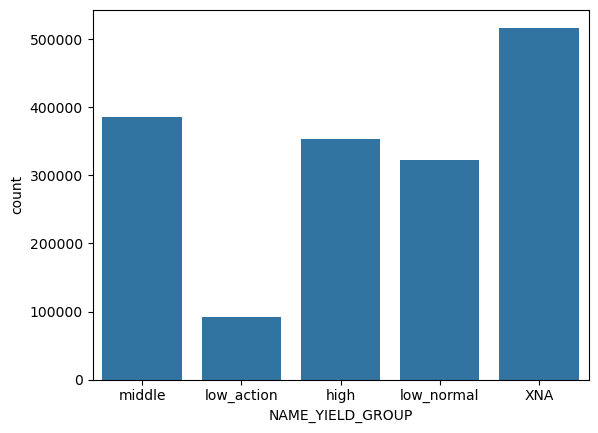

In [207]:
# Plotting the distribution
sns.countplot(data=previous_application, x='NAME_YIELD_GROUP')
plt.show()

In [208]:
max_percent = previous_application['NAME_YIELD_GROUP'].value_counts(normalize=True).max() * 100
mode_value = previous_application['NAME_YIELD_GROUP'].mode()[0]
max_percent, mode_value

(30.96698985878456, 'XNA')

In [209]:
previous_application['NAME_YIELD_GROUP'].value_counts(normalize=True)

NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64

**Approach:**

- Replacing all occurrences of `XNA` in the `NAME_YIELD_GROUP` column with `Unknown`.

**Justification:**

- Avoids artificially inflating any of the known yield groups, preserving the true distribution.
- Acknowledges the missing or unknown data, allowing for separate analysis or handling of those cases.
- Provides a clear and transparent understanding of the `Unknown` category.
- Prevents potential distortion of the data and potential bias in the analysis.

In [210]:
# Replacing all occurrences of XNA in the NAME_YIELD_GROUP column with Unknown
previous_application['NAME_YIELD_GROUP'] = previous_application['NAME_YIELD_GROUP'].replace('XNA', 'Unknown')

---

In [211]:
# Check if any XNA or XAP left in all the categorical columns
for col in categorical_columns:
    print(f"{col}: {previous_application[col].unique()}")

NAME_CONTRACT_TYPE: ['Consumer loans' 'Cash loans' 'Revolving loans']
WEEKDAY_APPR_PROCESS_START: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
FLAG_LAST_APPL_PER_CONTRACT: ['Y' 'N']
NAME_CONTRACT_STATUS: ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE: ['Cash through the bank' 'Non-cash from your account'
 'Cashless from the account of the employer']
NAME_CLIENT_TYPE: ['Repeater' 'New' 'Refreshed']
NAME_PORTFOLIO: ['POS' 'Cash' 'Cards' 'Cars']
CHANNEL_TYPE: ['Country-wide' 'Contact center' 'Credit and cash offices' 'Stone'
 'Regional / Local' 'AP+ (Cash loan)' 'Channel of corporate sales'
 'Car dealer']
NAME_YIELD_GROUP: ['middle' 'low_action' 'high' 'low_normal' 'Unknown']
PRODUCT_COMBINATION: ['POS mobile with interest' 'Cash X-Sell: low' 'Cash X-Sell: high'
 'Cash X-Sell: middle' 'Cash Street: high' 'Cash'
 'POS household without interest' 'POS household with interest'
 'POS other with interest' 'Card X-Sell' 'POS mobile without interes

In [212]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                       1             Approved  Cash through the bank   
1                       1             Approved  Cash through the bank   
2                       1             Approved  Cash through the bank   
3                       1             Approved  Cash through the bank   
4                       1              Refused  Cash through the bank   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash           Contact center         36.0   
2         Repeater           Cash  Credit and cash offices         12.0   
3         Repeater           Cash  Credit and cash offices         12.0   
4         Repeater           Cash  Credit and cash offices         24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  YEARS_DECISION  
0           middle  POS mobile with interest        0.199863  
1       low_action          Cash X-Sell: low        0.449008  
2             high         Cash X-Sell: high        0.824093  
3           middle       Cash X-Sell: middle        1.401780  
4             high         Cash Street: high        2.138261

### Detecting and Handling Outliers

In [213]:
# Get numerical columns
numerical_cols = previous_application.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'CNT_PAYMENT', 'YEARS_DECISION'],
      dtype='object')

In [214]:
# Detect outliers for above columns
for col in numerical_cols:
  outliers = detect_outliers_iqr(previous_application, col)
  if len(outliers) > 0:
    print(f"Column: {col}, Number of Outliers: {len(outliers)}")

Column: AMT_ANNUITY, Number of Outliers: 162620
Column: AMT_APPLICATION, Number of Outliers: 208019
Column: AMT_CREDIT, Number of Outliers: 179989
Column: AMT_GOODS_PRICE, Number of Outliers: 236035
Column: HOUR_APPR_PROCESS_START, Number of Outliers: 1639
Column: NFLAG_LAST_APPL_IN_DAY, Number of Outliers: 5900
Column: CNT_PAYMENT, Number of Outliers: 344916
Column: YEARS_DECISION, Number of Outliers: 17571


Given the business objective of understanding loan default drivers, prioritizing outlier handling for the following variables:

- `AMT_ANNUITY`
- `AMT_APPLICATION`
- `AMT_CREDIT`
- `AMT_GOODS_PRICE`
- `CNT_PAYMENT`

These variables are more likely to be strong indicators of loan default risk and their outliers can significantly impact analysis and modeling results.

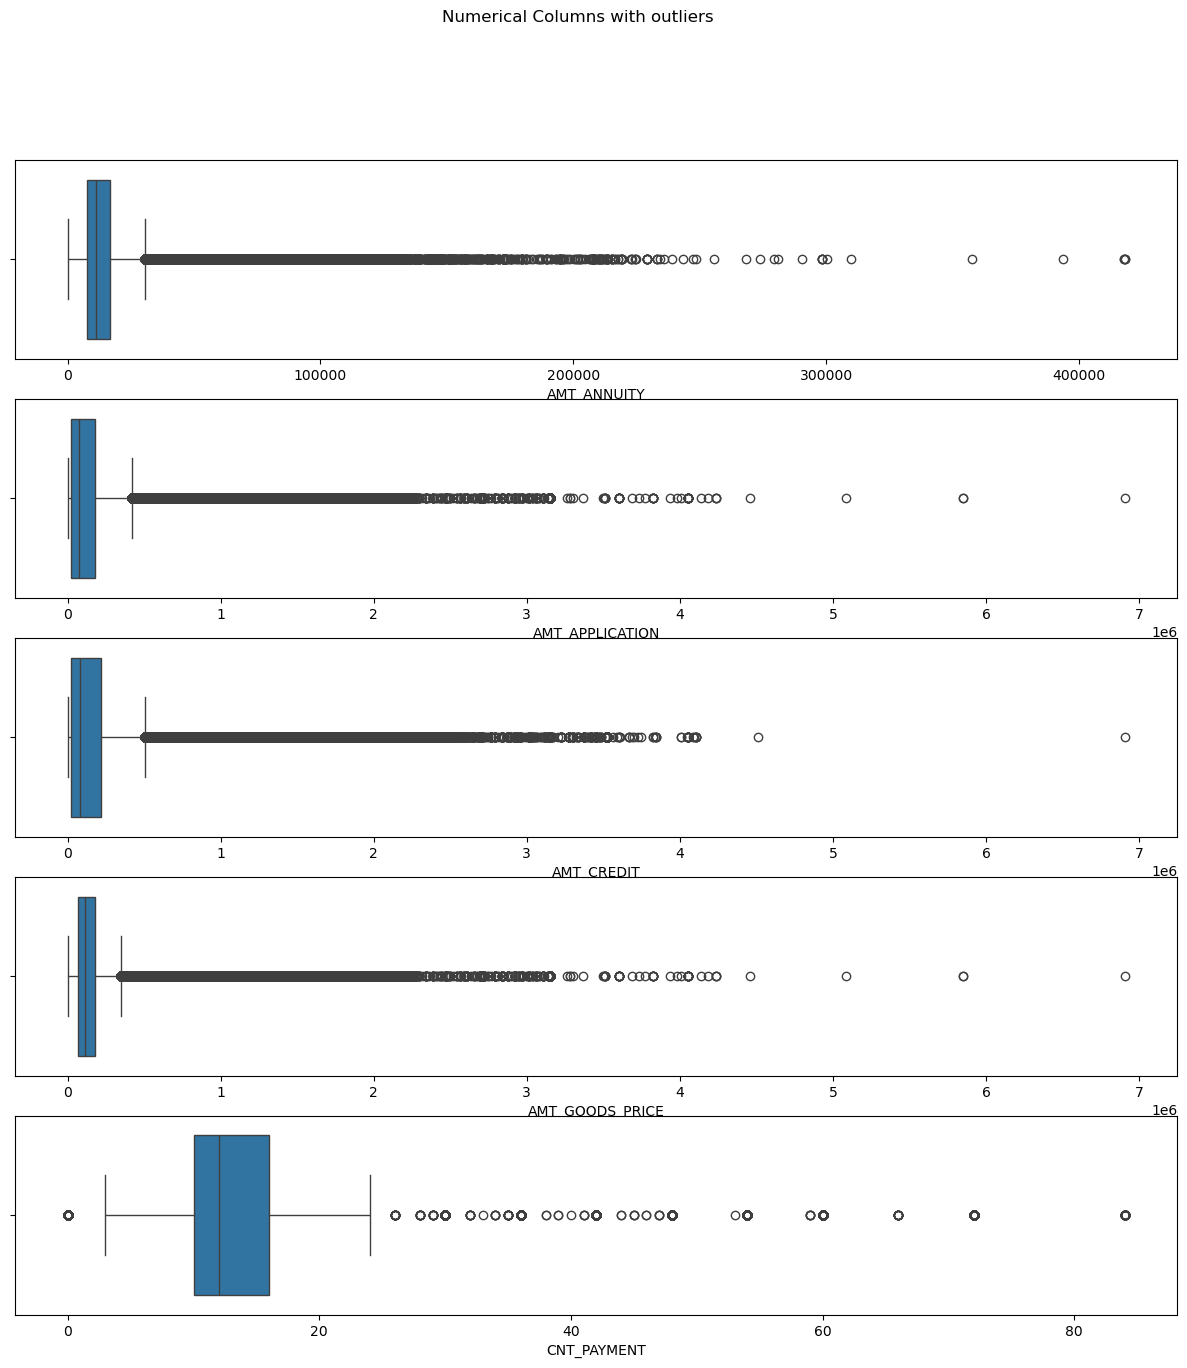

In [215]:
# Subplotting box plot columns to check the outliers
numerical_cols_with_outliers = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT',]
fig, axes = plt.subplots(len(numerical_cols_with_outliers), 1, figsize=(15, 15))
fig.suptitle('Numerical Columns with outliers')
pos = 0
for col in numerical_cols_with_outliers:
  sns.boxplot(ax=axes[pos], x=col, data=previous_application, orient='h')
  pos += 1
plt.show()

In [216]:
# Quantile of numerical_cols_with_outliers
previous_application[numerical_cols_with_outliers].quantile([0, 0.05, 0.25, 0.5, 0.75, 0.85, 0.90, 0.99])

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  CNT_PAYMENT
0.00      0.00000            0.000        0.00              0.0          0.0
0.05   3092.81850            0.000        0.00          25195.5          0.0
0.25   7547.09625        18720.000    24160.50          67500.0         10.0
0.50  11250.00000        71046.000    80541.00         112320.0         12.0
0.75  16824.02625       180360.000   216418.50         180405.0         16.0
0.85  24172.65000       325760.283   383193.00         326250.0         24.0
0.90  30219.93000       450000.000   533160.00         450000.0         36.0
0.99  65758.50000      1350000.000  1515374.55        1350000.0         60.0

- Need to handle the `Amount type variables` and `CNT_PAYMENT` seperately

#### Handling outliers for `Amount type variables`

In [217]:
amt_cols_with_outliers = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

In [218]:
# Capping amt_cols_with_outliers at 90% quantile
for col in amt_cols_with_outliers:
    cap_value = previous_application[col].quantile(0.90)  # Calculate 90th percentile
    previous_application.loc[previous_application[col] > cap_value, col] = cap_value # Cap values exceeding the percentile

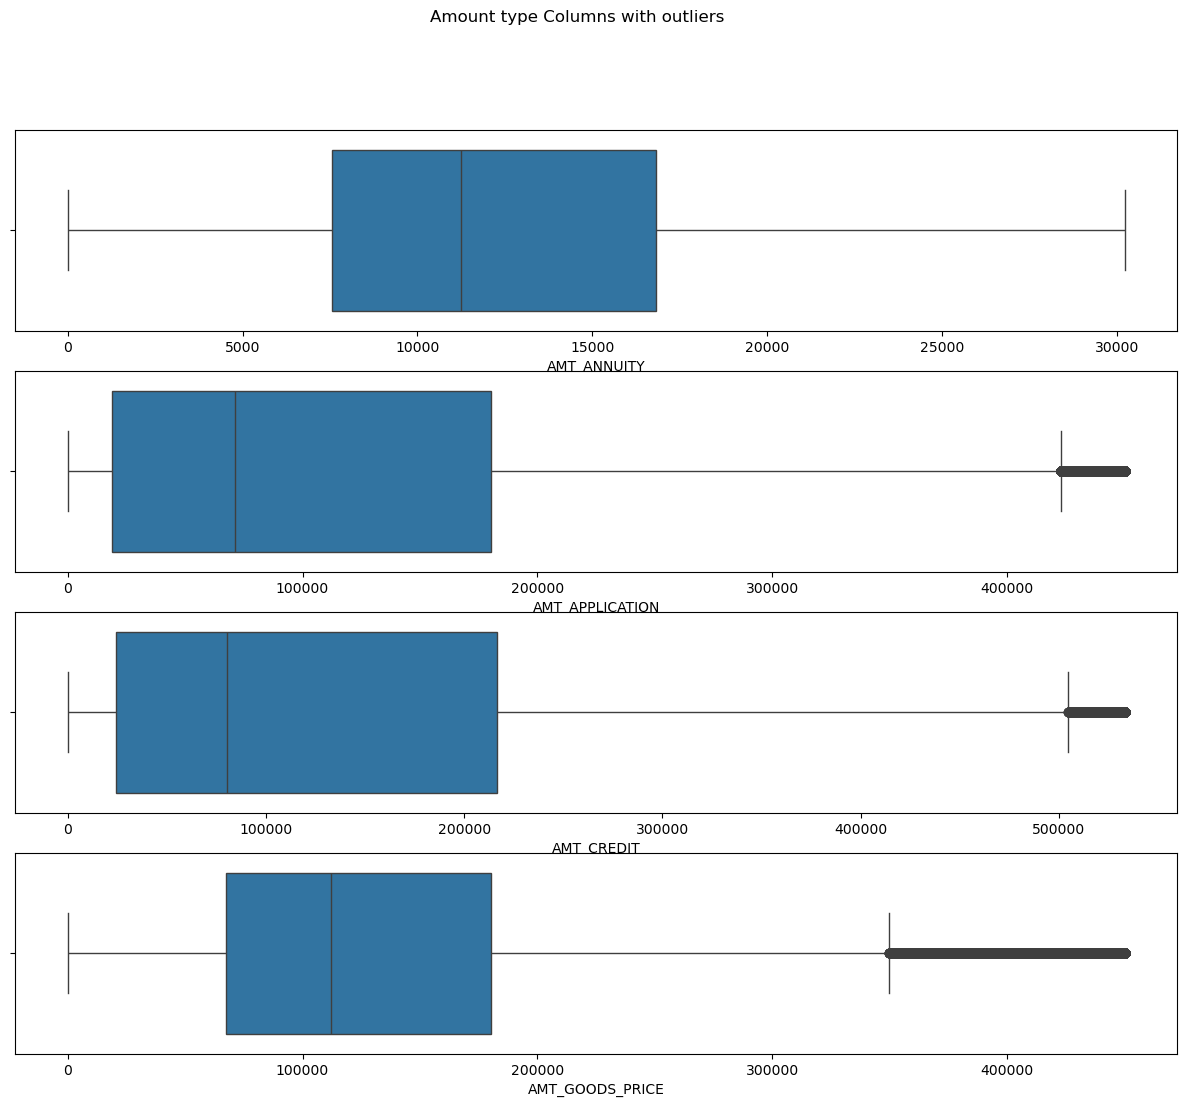

In [219]:
fig, axes = plt.subplots(len(amt_cols_with_outliers), 1, figsize=(15, 12))
fig.suptitle('Amount type Columns with outliers')
pos = 0
for col in amt_cols_with_outliers:
  sns.boxplot(ax=axes[pos], x=col, data=previous_application, orient='h')
  pos += 1
plt.show()

#### Handling Outliers for `CNT_PAYMENT `

In [220]:
previous_application['CNT_PAYMENT'].describe()

count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [221]:
sorted(previous_application['CNT_PAYMENT'].unique())

[0.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 26.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 53.0,
 54.0,
 59.0,
 60.0,
 66.0,
 72.0,
 84.0]

In [222]:
previous_application['CNT_PAYMENT'].value_counts(normalize = True) *100

CNT_PAYMENT
12.0    41.628139
6.0     11.403389
0.0      8.680624
10.0     8.492984
24.0     8.248284
18.0     4.635933
36.0     4.345731
60.0     3.209170
48.0     2.832930
8.0      1.817073
4.0      1.612009
30.0     1.013283
14.0     0.494128
42.0     0.427251
16.0     0.341872
5.0      0.236916
54.0     0.125972
20.0     0.108070
7.0      0.085857
9.0      0.074002
3.0      0.065860
15.0     0.054125
11.0     0.040055
72.0     0.008322
13.0     0.003054
17.0     0.002874
84.0     0.002694
22.0     0.002215
23.0     0.001617
26.0     0.000778
35.0     0.000659
66.0     0.000599
28.0     0.000479
29.0     0.000479
32.0     0.000359
19.0     0.000359
34.0     0.000239
59.0     0.000239
41.0     0.000180
47.0     0.000180
45.0     0.000180
21.0     0.000180
44.0     0.000120
39.0     0.000120
46.0     0.000120
38.0     0.000120
33.0     0.000060
40.0     0.000060
53.0     0.000060
Name: proportion, dtype: float64

In [223]:
previous_application['CNT_PAYMENT'].quantile([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

0.0     0.0
0.1     4.0
0.2     6.0
0.3    10.0
0.4    12.0
0.5    12.0
0.6    12.0
0.7    12.0
0.8    24.0
0.9    36.0
1.0    84.0
Name: CNT_PAYMENT, dtype: float64

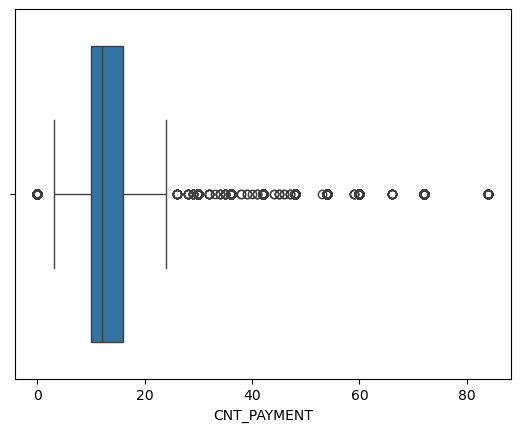

In [224]:
# Box Plot CNT_PAYMENT
sns.boxplot(x='CNT_PAYMENT', data=previous_application, orient='h')
plt.show()

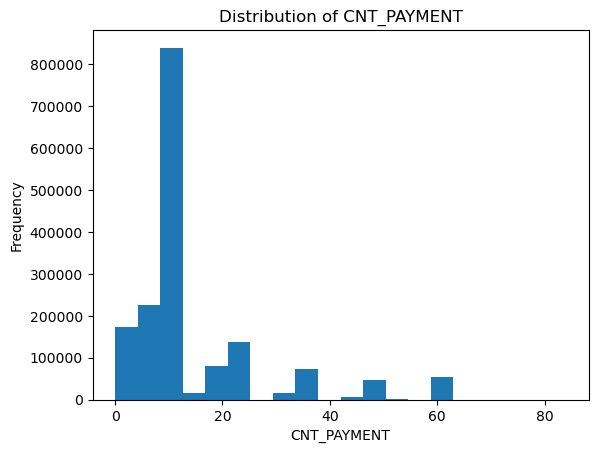

In [225]:
plt.hist(previous_application['CNT_PAYMENT'], bins=20)
plt.xlabel('CNT_PAYMENT')
plt.ylabel('Frequency')
plt.title('Distribution of CNT_PAYMENT')
plt.show()

**Approach:**
Based on the distribution of the variable `CNT_PAYMENT_BIN`, `Binning` seems to be the most reasonable.

Dividing the values in following Bins:

- 0 - `No Previous Credit`
- 0-12 - `Short-term`
- 12-24 - `Medium-term`
- 24-36 - `Long-term`
- 36+ - `Very long-term`

In [226]:
bins = [-0.001, 0, 12, 24, 36, float('inf')]
labels = ['No Previous Credit', 'Short-term', 'Medium-term', 'Long-term', 'Very long-term']
previous_application['CNT_PAYMENT_BIN'] = pd.cut(previous_application['CNT_PAYMENT'], bins=bins, labels=labels)

In [227]:
previous_application['CNT_PAYMENT_BIN'].value_counts()

CNT_PAYMENT_BIN
Short-term            1093260
Medium-term            232038
No Previous Credit     144985
Very long-term         110373
Long-term               89558
Name: count, dtype: int64

In [228]:
previous_application['CNT_PAYMENT_BIN'].unique()

['Short-term', 'Long-term', 'Medium-term', 'Very long-term', 'No Previous Credit']
Categories (5, object): ['No Previous Credit' < 'Short-term' < 'Medium-term' < 'Long-term' < 'Very long-term']

---

In [229]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         450000.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    30219.930         450000.0   
4     1784265      202054         Cash loans    30219.930         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    533160.0         450000.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                       1             Approved  Cash through the bank   
1                       1             Approved  Cash through the bank   
2                       1             Approved  Cash through the bank   
3                       1             Approved  Cash through the bank   
4                       1              Refused  Cash through the bank   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash           Contact center         36.0   
2         Repeater           Cash  Credit and cash offices         12.0   
3         Repeater           Cash  Credit and cash offices         12.0   
4         Repeater           Cash  Credit and cash offices         24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  YEARS_DECISION CNT_PAYMENT_BIN  
0           middle  POS mobile with interest        0.199863      Short-term  
1       low_action          Cash X-Sell: low        0.449008       Long-term  
2             high         Cash X-Sell: high        0.824093      Short-term  
3           middle       Cash X-Sell: middle        1.401780      Short-term  
4             high         Cash Street: high        2.138261     Medium-term

In [230]:
previous_application.isnull().sum().sum()

0

## Merging Datasets

To enrich our analysis, we merged the `application_data` with the `previous_application` dataset. The merge was performed on the common key `SK_ID_CURR`, which represents the unique identifier for each client. This merged dataset provides a more comprehensive view of each client's loan history and application details.

### Next Steps
With the datasets merged, we will proceed with the bivariate analysis to understand the relationships between pairs of variables.


In [231]:
# Merge the application_data with previous_application on a common key, for example, 'SK_ID_CURR'
merged_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', suffixes=('_app', '_prev'), how='left')

In [232]:
# Display the first few rows of the merged dataset
merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_app CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100003       0             Cash loans           F            N   
4      100004       0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_app  \
0               Y             0          202500.0        406597.5   
1               N             0          270000.0       1293502.5   
2               N             0          270000.0       1293502.5   
3               N             0          270000.0       1293502.5   
4               Y             0           67500.0        135000.0   

   AMT_ANNUITY_app  AMT_GOODS_PRICE_app NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          24700.5             351000.0   Unaccompanied          Working   
1          35698.5            1129500.0          Family    State servant   
2          35698.5            1129500.0          Family    State servant   
3          35698.5            1129500.0          Family    State servant   
4           6750.0             135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                    0.018801           1               1                0   
1                    0.003541           1               1                0   
2                    0.003541           1               1                0   
3                    0.003541           1               1                0   
4                    0.010032           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                 1           1           0        Laborers   
1                 1           1           0      Core staff   
2                 1           1           0      Core staff   
3                 1           1           0      Core staff   
4                 1           1           0        Laborers   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_app  HOUR_APPR_PROCESS_START_app  \
0                      WEDNESDAY                           10   
1                         MONDAY                           11   
2                         MONDAY                           11   
3                         MONDAY                           11   
4                         MONDAY                            9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0

In [233]:
merged_data.shape

(1430155, 91)

In [234]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Data columns (total 91 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   SK_ID_CURR                       1430155 non-null  int64   
 1   TARGET                           1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_app           1430155 non-null  object  
 3   CODE_GENDER                      1430155 non-null  object  
 4   FLAG_OWN_CAR                     1430155 non-null  object  
 5   FLAG_OWN_REALTY                  1430155 non-null  object  
 6   CNT_CHILDREN                     1430155 non-null  int64   
 7   AMT_INCOME_TOTAL                 1430155 non-null  float64 
 8   AMT_CREDIT_app                   1430155 non-null  float64 
 9   AMT_ANNUITY_app                  1430155 non-null  float64 
 10  AMT_GOODS_PRICE_app              1430155 non-null  float64 
 11  NAME_TYPE_SUITE                  1430

In [235]:
merged_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.430155e+06  1.430155e+06  1.430155e+06      1.430155e+06   
mean   2.784702e+05  8.624240e-02  4.038870e-01      1.714616e+05   
std    1.028021e+05  2.807218e-01  7.165176e-01      8.228485e+04   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893610e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789560e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675090e+05  0.000000e+00  1.000000e+00      2.115000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      4.725000e+05   

       AMT_CREDIT_app  AMT_ANNUITY_app  AMT_GOODS_PRICE_app  \
count    1.430155e+06     1.430155e+06         1.430155e+06   
mean     5.876116e+05     2.689634e+04         5.284164e+05   
std      3.807568e+05     1.338524e+04         3.515423e+05   
min      4.500000e+04     1.615500e+03         4.050000e+04   
25%      2.700000e+05     1.679850e+04         2.385000e+05   
50%      5.084955e+05     2.491650e+04         4.500000e+05   
75%      8.086500e+05     3.457350e+04         6.795000e+05   
max      1.854000e+06     7.000650e+04         1.800000e+06   

       REGION_POPULATION_RELATIVE    FLAG_MOBIL  FLAG_EMP_PHONE  \
count                1.430155e+06  1.430155e+06    1.430155e+06   
mean                 2.079102e-02  9.999993e-01    8.067175e-01   
std                  1.339810e-02  8.361967e-04    3.948728e-01   
min                  2.900000e-04  0.000000e+00    0.000000e+00   
25%                  1.003200e-02  1.000000e+00    1.000000e+00   
50%                  1.885000e-02  1.000000e+00    1.000000e+00   
75%                  2.866300e-02  1.000000e+00    1.000000e+00   
max                  7.250800e-02  1.000000e+00    1.000000e+00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     1.430155e+06      1.430155e+06  1.430155e+06  1.430155e+06   
mean      1.824732e-01      9.989917e-01  2.825792e-01  7.195793e-02   
std       3.862342e-01      3.173746e-02  4.502536e-01  2.584183e-01   
min       0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00      1.000000e+00  1.000000e+00  0.000000e+00   
max       1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          1.430155e+06                 1.430155e+06   
mean           2.058179e+00                 2.036176e+00   
std            4.963435e-01                 4.891555e-01   
min            1.000000e+00                 1.000000e+00   
25%            2.000000e+00                 2.000000e+00   
50%            2.000000e+00                 2.000000e+00   
75%            2.000000e+00                 2.000000e+00   
max            3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_app  REG_REGION_NOT_LIVE_REGION  \
count                 1.430155e+06                1.430155e+06   
mean                  1.199401e+01                1.229377e-02   
std                   3.233163e+00                1.101937e-01   
min                   0.000000e+00                0.000000e+00   
25%                   1.000000e+01                0.000000e+00   
50%                   1.200000e+01                0.000000e+00   
75%                   1.400000e+01                0.000000e+00   
max                   2.300000e+01                1.000000e+00   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                1.430155e+06                 1.430155e+06   
mean                 4.435953e-02                 3.626041e-02   
std                  2.058927e-01                 1.869375e-01   
min                  0.000000e+00                 0.000000e+00   
25%                  0.000000e+00                 0.000000e+00   
50%                  0.000000e+00 

In [236]:
merged_data.isnull().sum()

SK_ID_CURR                             0
TARGET                                 0
NAME_CONTRACT_TYPE_app                 0
CODE_GENDER                            0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT_app                         0
AMT_ANNUITY_app                        0
AMT_GOODS_PRICE_app                    0
NAME_TYPE_SUITE                        0
NAME_INCOME_TYPE                       0
NAME_EDUCATION_TYPE                    0
NAME_FAMILY_STATUS                     0
NAME_HOUSING_TYPE                      0
REGION_POPULATION_RELATIVE             0
FLAG_MOBIL                             0
FLAG_EMP_PHONE                         0
FLAG_WORK_PHONE                        0
FLAG_CONT_MOBILE                       0
FLAG_PHONE                             0
FLAG_EMAIL                             0
OCCUPATION_TYPE                        0
REGION_RATING_CL

## Bivariate Analysis

Key Focus Areas for `Bivariate Analysis`:

1. **Relationship with Target Variable (`TARGET`):** The primary goal is to identify variables that have a strong relationship with loan default. Analysis should focus on understanding how different features influence the likelihood of default.

2. **Categorical vs. Numerical Variables:** Used different techniques for analyzing relationships between categorical and numerical variables.

3. **Visualizations:** Visualizations are crucial for understanding and communicating the relationships between variables. Appropriate plots needed based on the data types and the type of relationship.

### Numerical Columns vs. Target
We performed bivariate analysis to examine the relationships between numerical columns and the target variable

In [237]:
# Bivariate analysis for numerical columns from application_data and previous_application vs. target variable
numerical_columns_app = ['AMT_CREDIT_app', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_ANNUITY_app']
numerical_columns_prev = ['AMT_CREDIT_prev', 'AMT_ANNUITY_prev', 'AMT_APPLICATION', 'YEARS_DECISION']


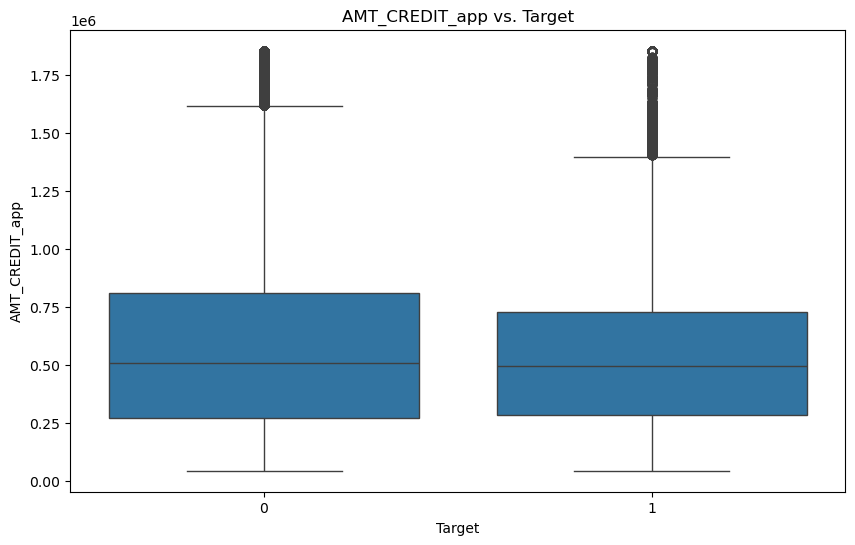

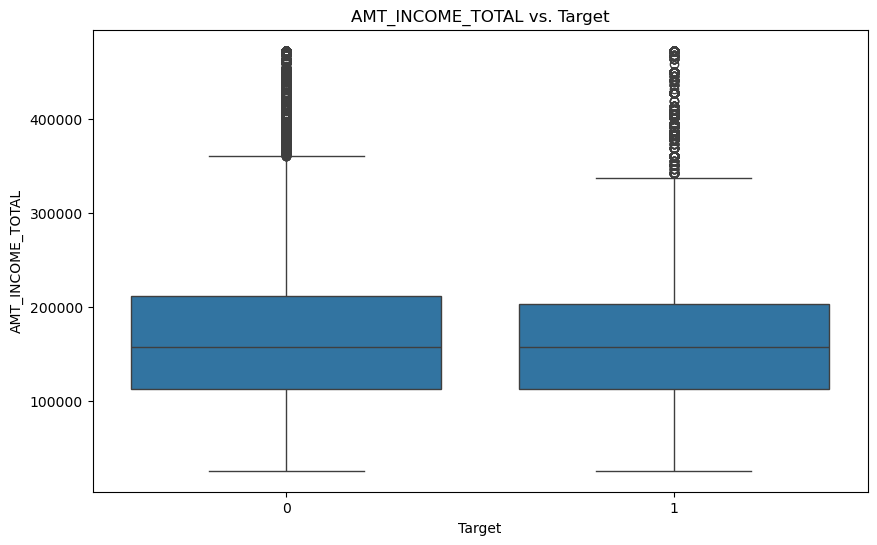

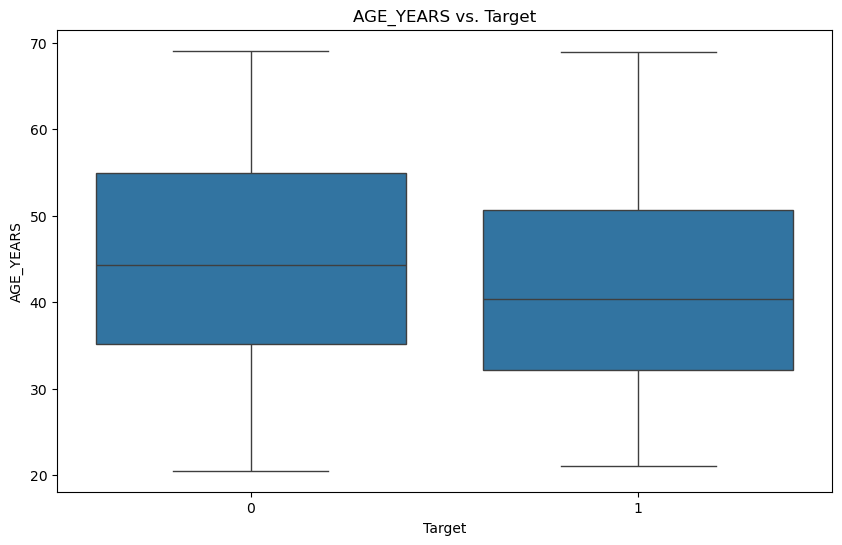

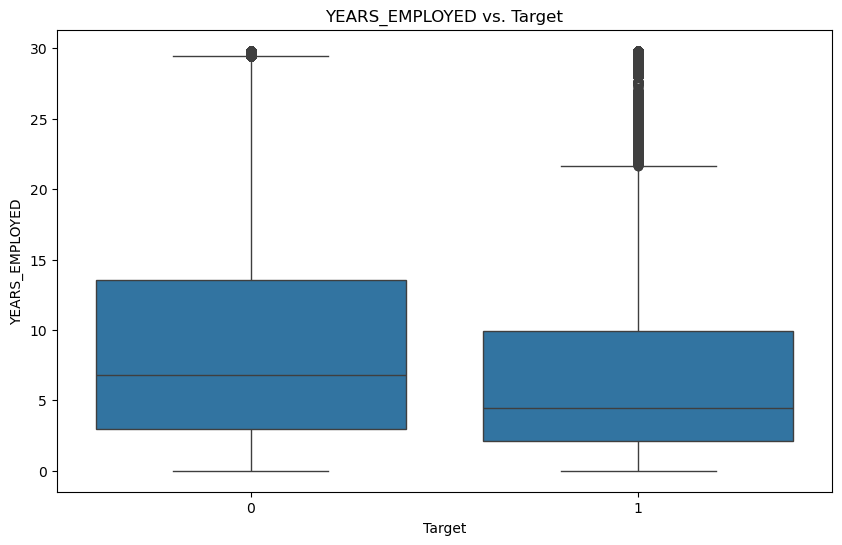

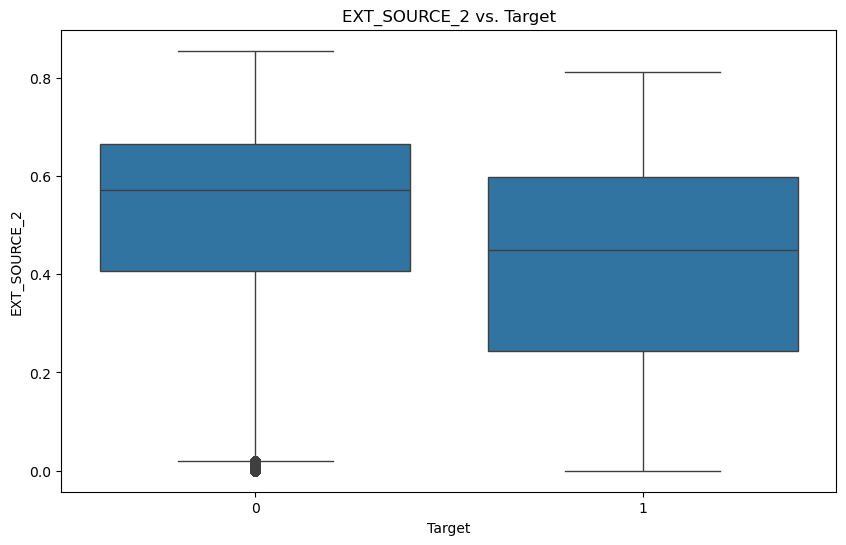

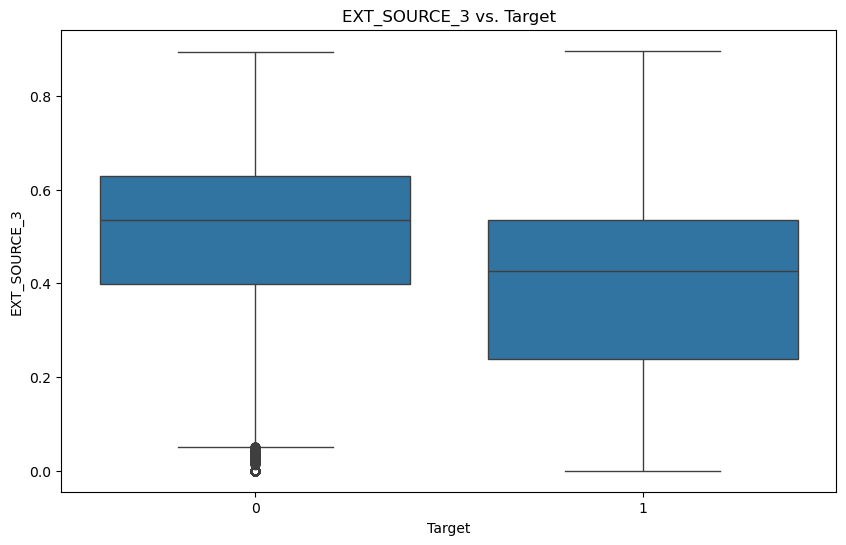

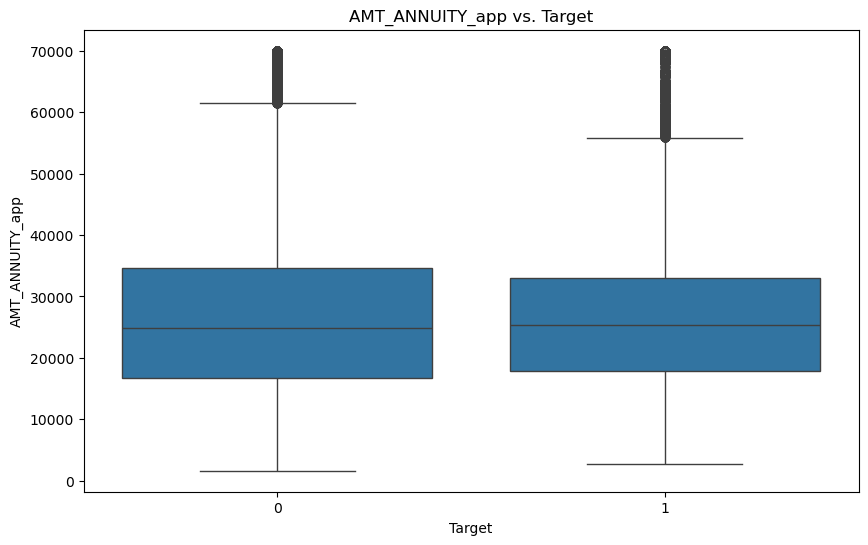

In [238]:
# Bivariate analysis for numerical columns from application_data
for column in numerical_columns_app:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_data, x='TARGET', y=column)
    plt.title(f'{column} vs. Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

- **AMT_CREDIT_app vs. TARGET**: While there's some overlap, clients with higher loan amounts (`AMT_CREDIT_app`) tend to have a slightly higher likelihood of payment difficulties (`Target = 1`). This suggests that larger loan sizes might be associated with increased default risk, although further analysis is needed to confirm this relationship.
- **AMT_INCOME_TOTAL vs. TARGET**: The boxplots for `AMT_INCOME_TOTAL` show minimal difference between clients with and without payment difficulties. This suggests that client income alone might not be a strong predictor of default risk in this dataset.
- **AGE_YEARS vs. TARGET**: The boxplots for `AGE_YEARS` show minimal difference between clients with and without payment difficulties. This suggests that client age alone might not be a strong predictor of default risk in this dataset.
- **YEARS_EMPLOYED vs. TARGET**: The boxplots for `YEARS_EMPLOYED` show minimal difference between clients with and without payment difficulties. This suggests that employment duration alone might not be a strong predictor of default risk in this dataset.
- **EXT_SOURCE_2 vs. TARGET**: Clients with lower `EXT_SOURCE_2` scores have a significantly higher likelihood of experiencing payment difficulties. `EXT_SOURCE_2` appears to be a strong predictor of default risk and should be a key factor in the bank's risk assessment and loan approval processes.
- **EXT_SOURCE_3 vs. TARGET**: Clients with lower EXT_SOURCE_3 scores have a significantly higher likelihood of experiencing payment difficulties. EXT_SOURCE_3 appears to be a strong predictor of default risk and should be a key factor in the bank's risk assessment and loan approval processes.
- **AMT_ANNUITY_app vs. TARGET**: The boxplots for `AMT_ANNUITY_app` show minimal difference between clients with and without payment difficulties. This suggests that annuity payment alone might not be a strong predictor of default risk in this dataset.

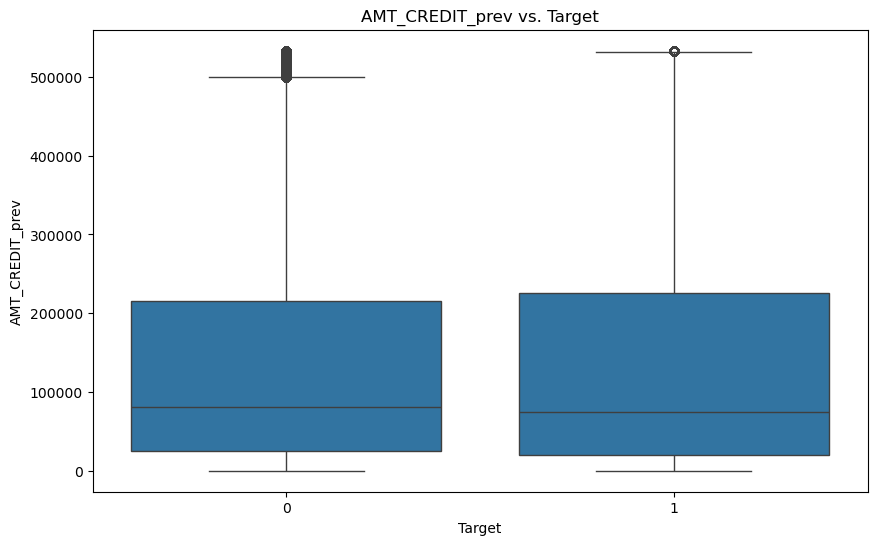

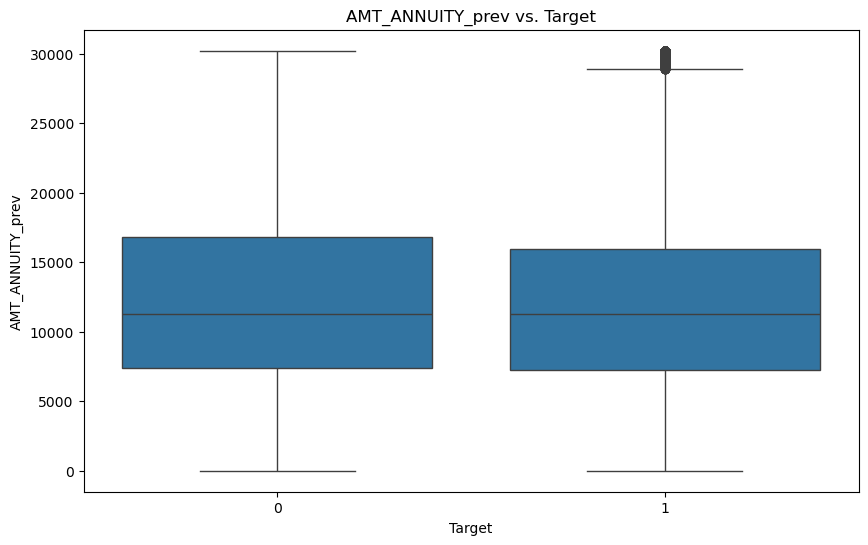

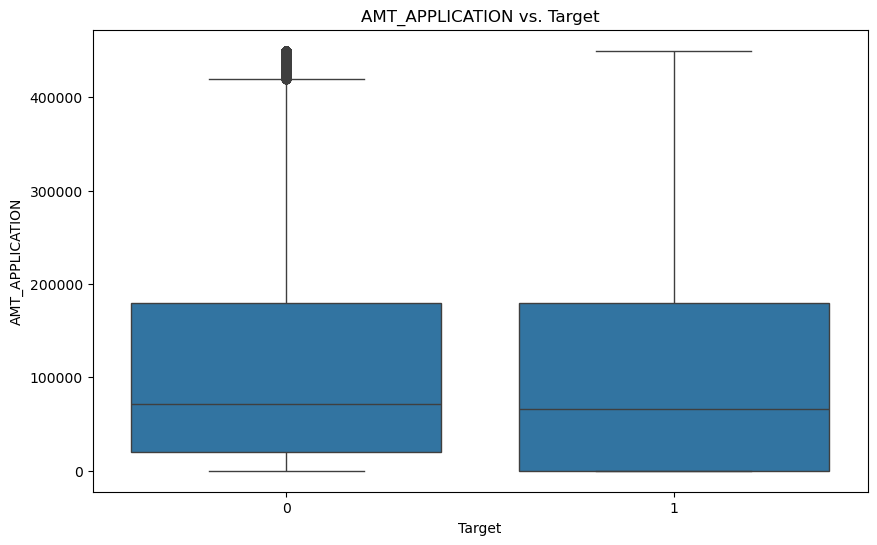

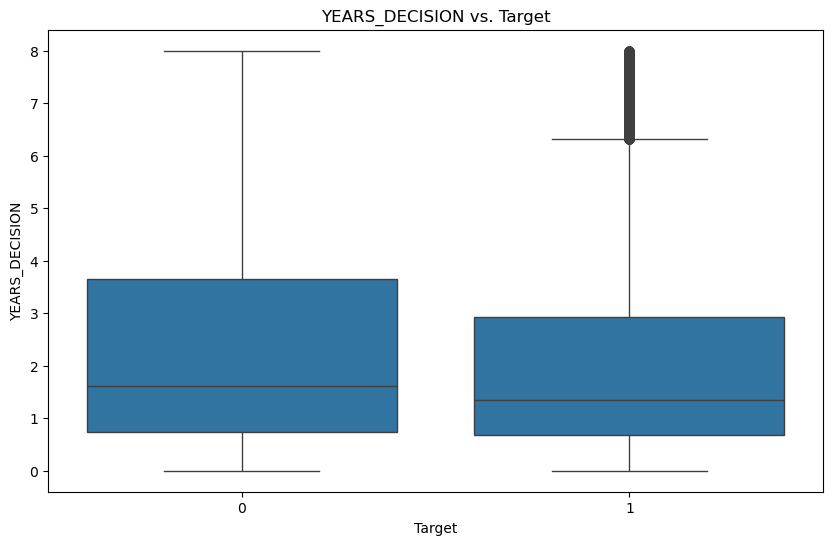

In [239]:
# Bivariate analysis for numerical columns from previous_application
for column in numerical_columns_prev:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_data, x='TARGET', y=column)
    plt.title(f'{column} vs. Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

- **AMT_CREDIT_prev vs. Target**: The boxplots for `AMT_CREDIT_prev` show minimal difference between clients with and without payment difficulties. This suggests that the amount of previous loans might not be a strong predictor of default risk in this dataset.
- **AMT_ANNUITY_prev vs. Target**: The boxplots for `AMT_ANNUITY_prev` show minimal difference between clients with and without payment difficulties. This suggests that previous annuity payments might not be a strong predictor of default risk in this dataset.
- **AMT_APPLICATION_prev vs. Target**: The boxplots for `AMT_APPLICATION_prev` show minimal difference between clients with and without payment difficulties. This suggests that the amount of credit previously applied for might not be a strong predictor of default risk in this dataset.
- **YEARS_DECISION_prev vs. Target**: The boxplots for `YEARS_DECISION_prev` show minimal difference between clients with and without payment difficulties. This suggests that the time elapsed since the previous loan application decision might not be a strong predictor of default risk in this dataset.

### Categorical Columns vs. Target
We also examined the relationships between categorical columns and the target variable

In [240]:
# Bivariate analysis for categorical columns from application_data and previous_application vs. target variable
categorical_columns_app = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_TYPE_app', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OCCUPATION_TYPE']
categorical_columns_prev = ['NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_prev', 'NAME_CLIENT_TYPE', 'CHANNEL_TYPE']


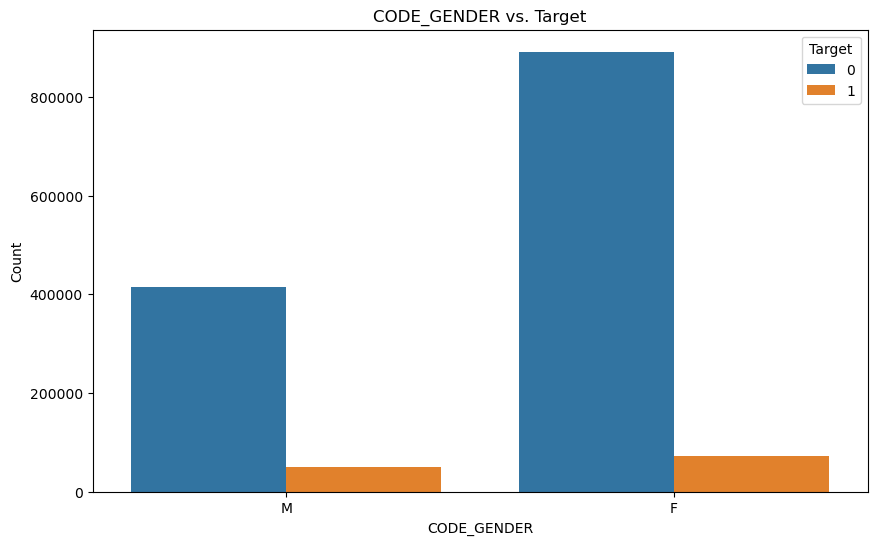

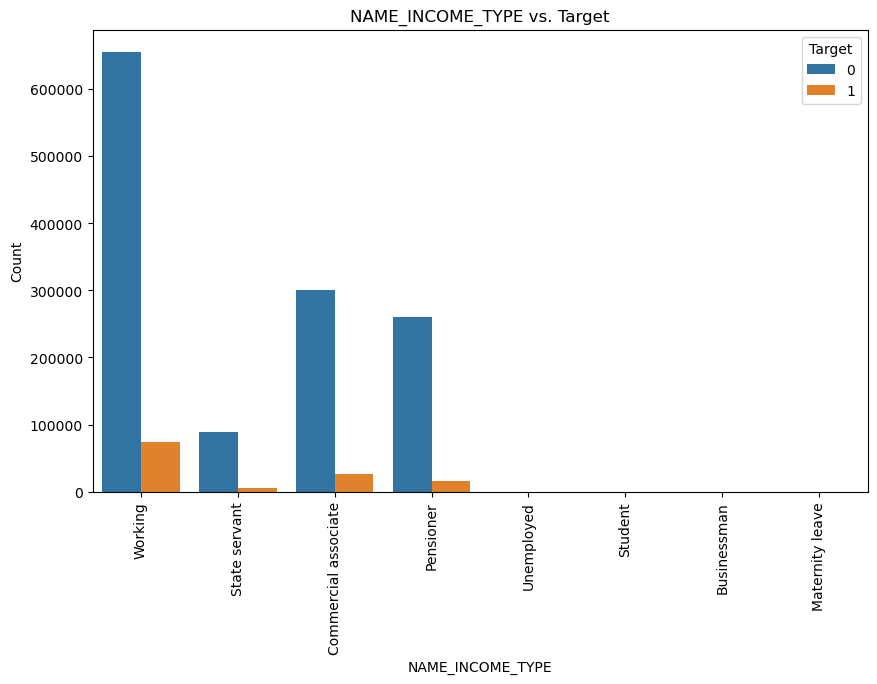

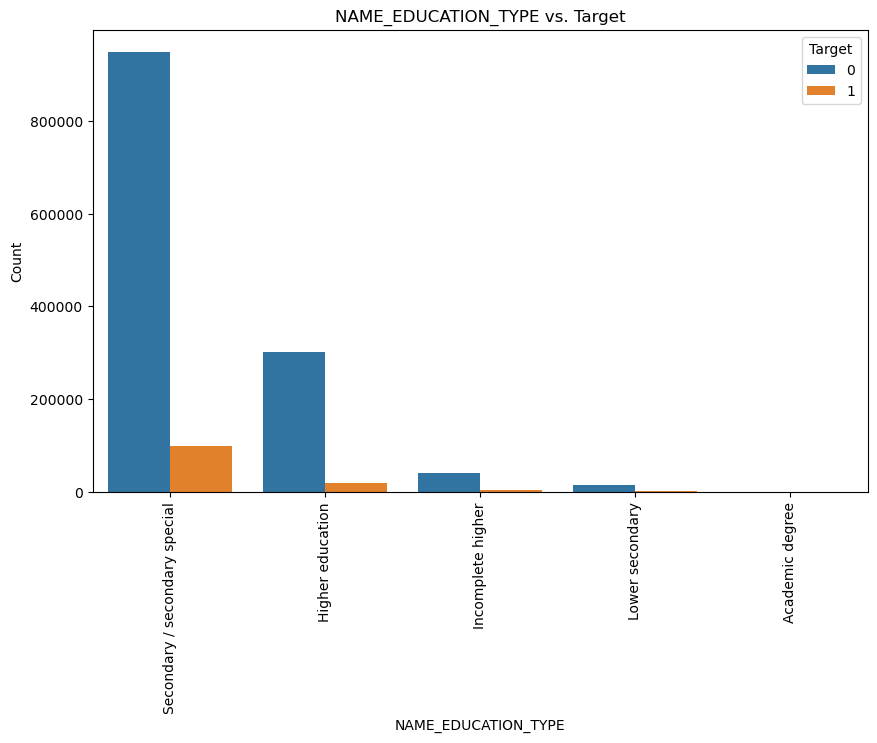

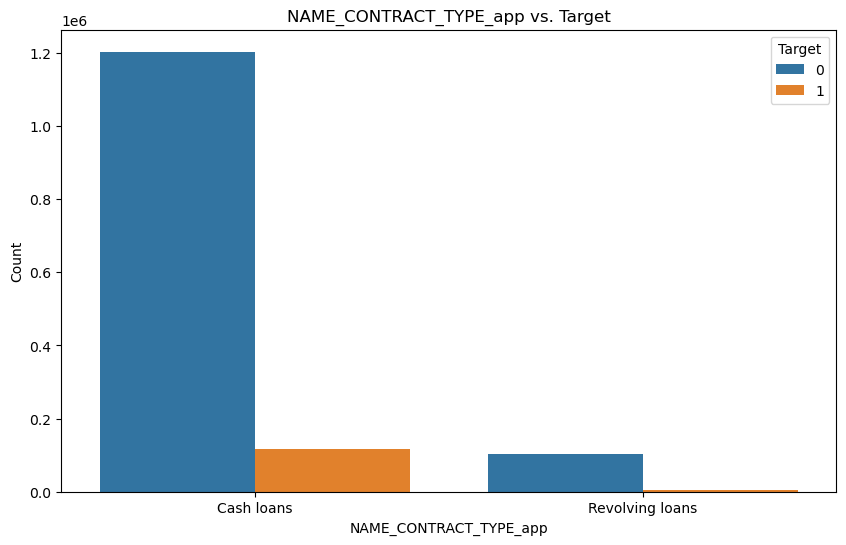

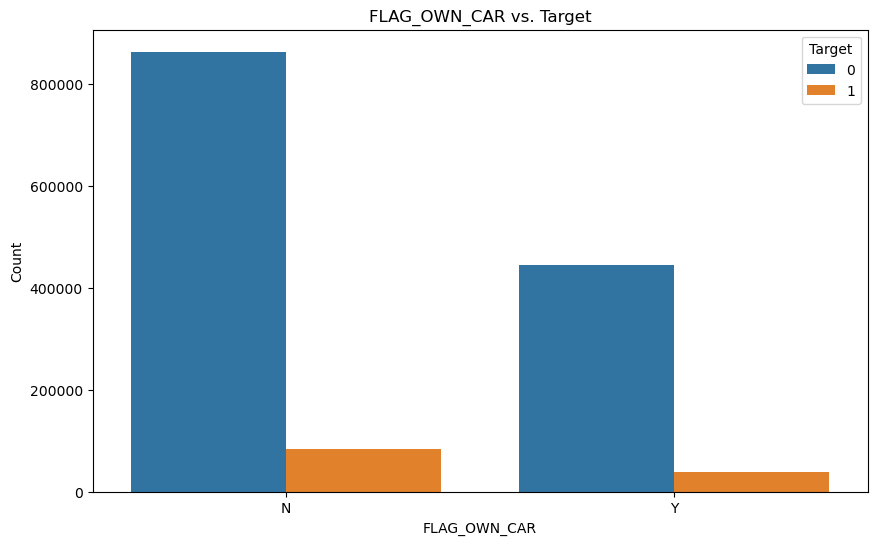

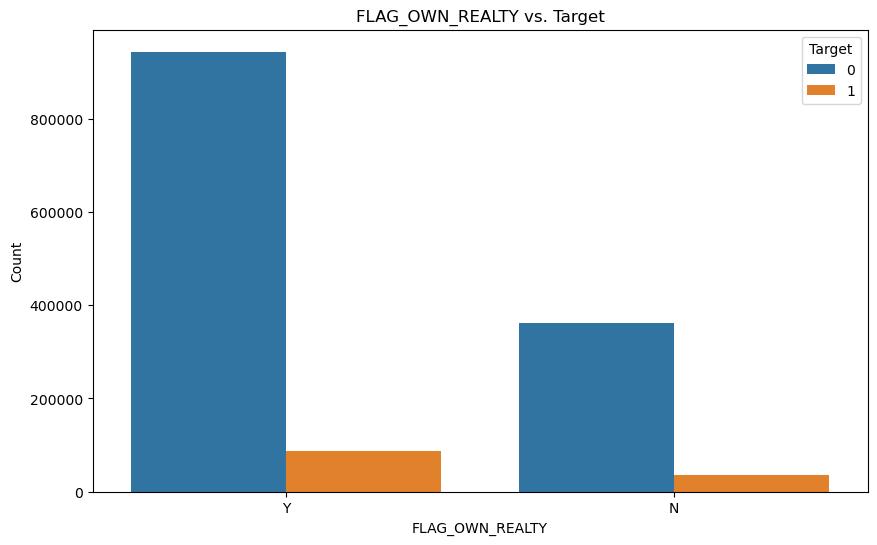

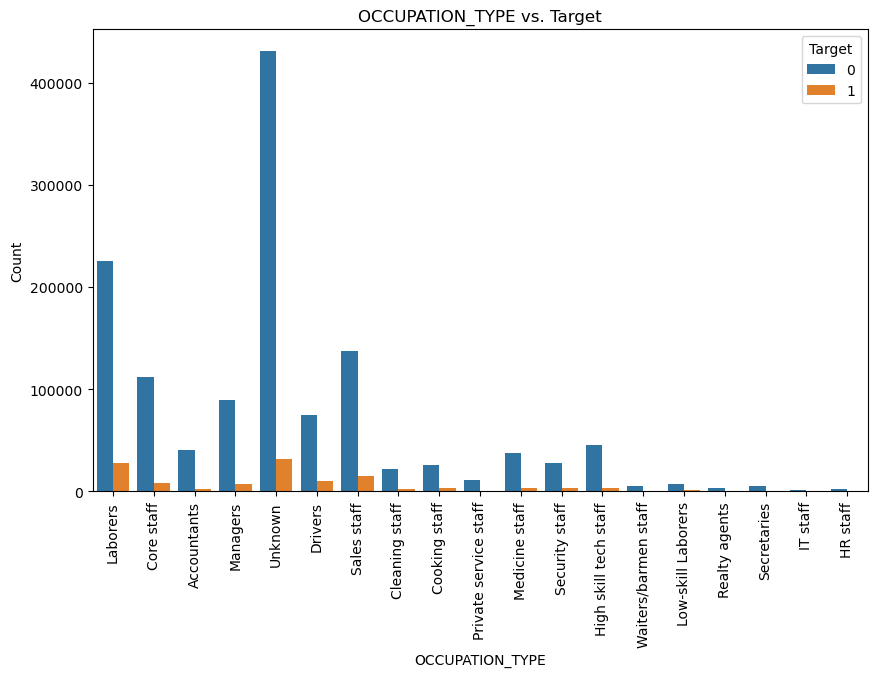

In [241]:
# Bivariate analysis for categorical columns from application_data
for column in categorical_columns_app:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_data, x=column, hue='TARGET')
    plt.title(f'{column} vs. Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target')
    if column in ['OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']:
        plt.xticks(rotation=90)
    plt.show()

- **CODE_GENDER vs. TARGET**: The bar plot suggests that `male` clients have a slightly higher proportion of payment difficulties compared to `female` clients, though, the difference might appear small.
- **NAME_INCOME_TYPE vs. TARGET**: While `Working` individuals constitute the largest segment, the countplot suggests they might have a relatively higher default rate compared to some other income types like `Pensioners` and `State servant`.
- **NAME_EDUCATION_TYPE vs. TARGET**: While `Secondary / secondary special` education is the most common, the countplot suggests clients with this level of education might have a slightly higher default rate compared to those with higher education levels like `Higher education` and `Academic degree`.
- **NAME_CONTRACT_TYPE_app vs. TARGET**: While `Cash loans` are more prevalent, the countplot suggests they might have a slightly higher default rate compared to `Revolving loans`.
- **FLAG_OWN_CAR vs. TARGET**: The countplot suggests that clients who `do not own a car` might have a slightly higher default rate compared to those who `own a car`.
- **FLAG_OWN_REALTY vs. TARGET**: The countplot suggests that clients who `do not own a house or flat` might have a slightly higher default rate compared to those who `own one`.
- **OCCUPATION_TYPE vs. TARGET**: While `Laborers` have the highest count, the countplot suggests they might have a relatively higher default rate compared to some other occupations like `Managers` and `Accountants`.

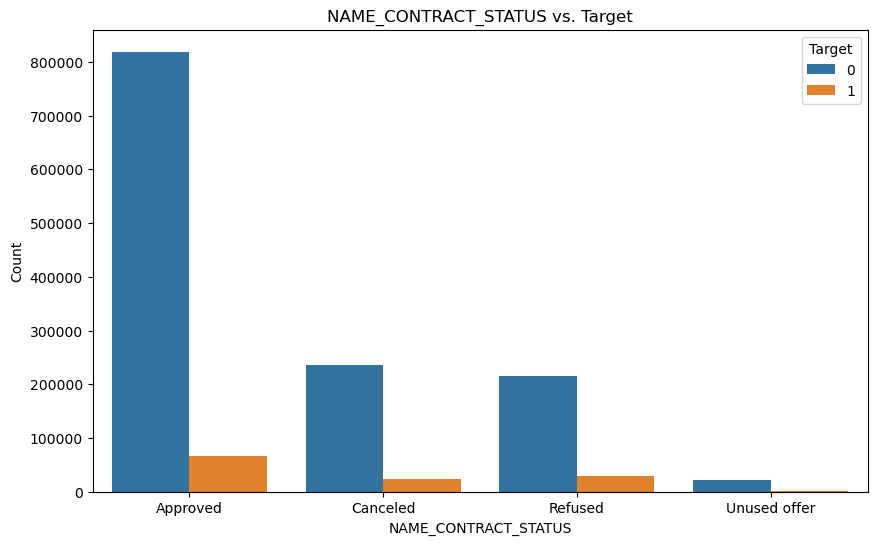

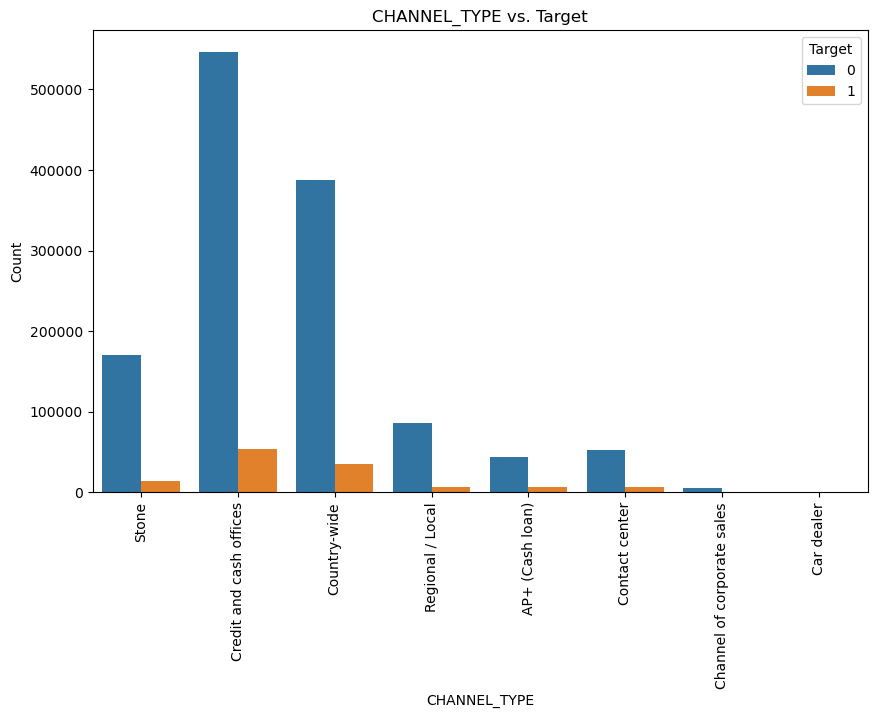

In [242]:
# Bivariate analysis for categorical columns from previous_application
for column in categorical_columns_prev:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_data, x=column, hue='TARGET')
    plt.title(f'{column} vs. Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Target')
    if column in ['CHANNEL_TYPE']:
        plt.xticks(rotation=90)
    plt.show()

- **NAME_CONTRACT_STATUS vs. TARGET**: The countplot suggests that clients with a history of `Refused` or `Canceled` previous loan applications might have a higher default rate compared to those with `Approved` or `Unused offer` contracts.
- **NAME_CONTRACT_TYPE_prev vs. TARGET**: The countplot suggests that `Cash loans` in previous applications might have a slightly higher default rate compared to `Consumer loans` or `Revolving loans`.
- **NAME_CLIENT_TYPE vs. TARGET**: While `Repeater` clients are the most frequent, the countplot suggests they might have a slightly higher default rate compared to `New` or `Refreshed` clients.
- **CHANNEL_TYPE vs. TARGET**: The countplot suggests that clients acquired through certain channels like `Credit and cash offices` and `Country-wide` might have a slightly higher default rate compared to those acquired through other channels like `Stone` and `Car dealer`.

### Key Insights
From our bivariate analysis, we observed the following patterns:
- Strong Predictors:
 - `EXT_SOURCE_2` and `EXT_SOURCE_3` appear to be strong predictors of default risk.
- Potential Risk Factors:
 - Larger loan amounts (`AMT_CREDIT_app`) might be associated with increased risk.
 - Clients with `Cash loans`, `Refused` or `Canceled` previous applications, and `lower education levels` might have higher default rates.
 - Clients who are `Working`, `Laborers`, or `who do not own a car or a house` might have higher default risk.

## Multivariate Analysis

This will help us to examine the relationships among three or more variables, helping to uncover deeper insights.


### Pairplot Analysis
Used pairplots to visualize the relationships among several numerical variables, and their interactions with the target variable. This helps in understanding how multiple variables together influence the target.

In [243]:
# Pairplot for a subset of numerical variables
sns.pairplot(merged_data, vars=['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_CREDIT_app', 'AMT_ANNUITY_app'], hue='TARGET')
plt.show()

The pairplot confirms that `lower` values for `EXT_SOURCE_2` and `EXT_SOURCE_3` are strongly associated with an increased likelihood of `default`. Additionally, the plots suggest that clients with `higher` loan amounts (`AMT_CREDIT_app`) and annuity payments (`AMT_ANNUITY_app`) might also have a higher risk of `default`.

### Correlation Heatmap
Created a heatmap to visualize the correlations among numerical variables. This heatmap highlights the strength and direction of relationships between pairs of variables, which is crucial for identifying potential interactions.

In [244]:
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_CREDIT_app', 'AMT_ANNUITY_app',
                                 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'TARGET']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap confirms that `EXT_SOURCE_2` and `EXT_SOURCE_3` are `strongly negatively` correlated with the `target` variable, indicating they are significant predictors of default risk. `Moderate` correlations were observed between `loan amount`, `annuity payment`, and `income`, suggesting that larger loans and higher payments might be associated with increased risk.


### Key Insights
From our multivariate analysis, we observed the following patterns:
- `EXT_SOURCE_2` and `EXT_SOURCE_3` are crucial for risk assessment. The bank should prioritize understanding and leveraging these external scores in their risk management processes.
- **Loan Characteristics are important risk factors.** The bank should carefully analyze `loan amounts` and `annuity payments` in relation to `client income` and other relevant factors.

## Correlation Analysis

Performed a detailed correlation analysis to identify the top correlations with the `target` variable. This helps in understanding which variables are the strongest indicators of loan default.


### Handling Categorical Columns for Correlation Analysis

In [245]:
# One-hot encoding for categorical columns
merged_data_encoded = pd.get_dummies(merged_data, drop_first=True)

# Display the first few rows of the encoded dataset
merged_data_encoded.head()


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_app  \
0      100002       1             0          202500.0        406597.5   
1      100003       0             0          270000.0       1293502.5   
2      100003       0             0          270000.0       1293502.5   
3      100003       0             0          270000.0       1293502.5   
4      100004       0             0           67500.0        135000.0   

   AMT_ANNUITY_app  AMT_GOODS_PRICE_app  REGION_POPULATION_RELATIVE  \
0          24700.5             351000.0                    0.018801   
1          35698.5            1129500.0                    0.003541   
2          35698.5            1129500.0                    0.003541   
3          35698.5            1129500.0                    0.003541   
4           6750.0             135000.0                    0.010032   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                0                 1           1   
3           1               1                0                 1           1   
4           1               1                1                 1           1   

   FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0           0                     2                            2   
1           0                     1                            1   
2           0                     1                            1   
3           0                     1                            1   
4           0                     2                            2   

   HOUR_APPR_PROCESS_START_app  REG_REGION_NOT_LIVE_REGION  \
0                           10                           0   
1                           11                           0   
2                           11                           0   
3                           11                           0   
4                            9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.622246      0.535276                       1.0   
3      0.622246      0.535276                       1.0   
4      0.555912      0.729567                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                       2.0                0                1   
1                       0.0                0                1   
2                       0.0                0                1   
3                       0.0                0                1   
4        

In [246]:
# Correlation analysis for numerical variables
correlation_matrix = merged_data_encoded.corr()
target_correlations = correlation_matrix['TARGET'].sort_values(ascending=False)
target_correlations

TARGET                                                         1.000000
REGION_RATING_CLIENT_W_CITY                                    0.059832
NAME_INCOME_TYPE_Working                                       0.058046
REGION_RATING_CLIENT                                           0.057135
NAME_CONTRACT_STATUS_Refused                                   0.054670
CODE_GENDER_M                                                  0.052375
REG_CITY_NOT_WORK_CITY                                         0.049383
FLAG_EMP_PHONE                                                 0.048353
NAME_EDUCATION_TYPE_Secondary / secondary special              0.044327
FLAG_DOCUMENT_3                                                0.042497
OCCUPATION_TYPE_Laborers                                       0.042125
REG_CITY_NOT_LIVE_CITY                                         0.040656
LIVE_CITY_NOT_WORK_CITY                                        0.032802
DEF_30_CNT_SOCIAL_CIRCLE                                       0

### Top 10 Correlations
The top 10 correlations with the target variable are as follows:

In [247]:
# Display top 10 correlations with the target variable
top_10_correlations = target_correlations.head(11)  # Including TARGET itself
top_10_correlations

TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.059832
NAME_INCOME_TYPE_Working                             0.058046
REGION_RATING_CLIENT                                 0.057135
NAME_CONTRACT_STATUS_Refused                         0.054670
CODE_GENDER_M                                        0.052375
REG_CITY_NOT_WORK_CITY                               0.049383
FLAG_EMP_PHONE                                       0.048353
NAME_EDUCATION_TYPE_Secondary / secondary special    0.044327
FLAG_DOCUMENT_3                                      0.042497
OCCUPATION_TYPE_Laborers                             0.042125
Name: TARGET, dtype: float64

### Visualization
Visualized the top correlations using a bar plot to highlight the variables that have the strongest relationship with the target.

In [248]:
# Visualize the top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_correlations.index, y=top_10_correlations.values)
plt.title('Top 10 Correlations with TARGET')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

### Key Insights
From our correlation analysis, we observed the following patterns:
- **Regional Factors:** `REGION_RATING_CLIENT_W_CITY` and `REGION_RATING_CLIENT` appear to be strongly correlated with the TARGET variable, suggesting that `regional factors` play a significant role in loan default risk.
- **Income Type:** Clients with income type `Working` (`NAME_INCOME_TYPE_Working`) show a higher risk of default compared to other income types.
- **Previous Application Status:** Clients with previously `Refused` applications (`NAME_CONTRACT_STATUS_Refused`) have a higher risk of default.
- **Gender:** `Male` clients (`CODE_GENDER_M`) might have a slightly higher risk of default compared to `female` clients.

# Summarization

# Loan Default Risk Analysis

## Introduction
This project aims to apply Exploratory Data Analysis (EDA) to understand patterns in loan data and identify factors influencing loan default. Our objective is to minimize financial loss while lending and ensure clients capable of repaying loans are not rejected.

## Data Overview
We used three datasets:
1. **Application Data**: Information about the client's loan application.
2. **Previous Application Data**: Information about clients' previous loan applications.
3. **Columns Description**: Data dictionary describing the variables.

## Key Findings and Insights

### Univariate Analysis
From our univariate analysis, we observed that certain segments exhibited higher potential default risk. These segments included:
- Clients with low income.
- Clients with shorter employment history.
- Clients with lower external scores (`EXT_SOURCE_2`, `EXT_SOURCE_3`).
- Clients with lower education levels.
- Clients with specific demographic characteristics (e.g., some family statuses, genders).

### Bivariate Analysis
Bivariate analysis revealed several key findings:
- **Strong Predictors:** `EXT_SOURCE_2` and `EXT_SOURCE_3` emerged as strong predictors of default risk.
- **Risk Factors:**
    - Larger loan amounts (`AMT_CREDIT_app`) were associated with increased risk.
    - Clients with Cash loans, Refused or Canceled previous applications, and lower education levels exhibited higher default rates.
    - Clients with certain income types (e.g., `Working`) and those who do not own a car or a house might have higher default risk.

### Multivariate Analysis
- **Pairplot Analysis:**
    * Confirmed the strong relationship between `EXT_SOURCE_2`, `EXT_SOURCE_3`, and default risk.
    * Highlighted potential interactions between loan amount, annuity payment, and other factors.
- **Correlation Analysis:**
    * `EXT_SOURCE_2` and `EXT_SOURCE_3` showed strong negative correlations with the target variable.
    * `AMT_CREDIT_app` and `AMT_ANNUITY_app` exhibited moderate positive correlations with the target variable.
    * Regional factors (`REGION_RATING_CLIENT_W_CITY`, `REGION_RATING_CLIENT`) and client characteristics (e.g., `CODE_GENDER_M`, `NAME_INCOME_TYPE_Working`) also showed correlations with default risk.

### Recommendations
Based on our analysis, the bank should:
1. **Prioritize risk assessments** for clients with lower external scores (`EXT_SOURCE_2`, `EXT_SOURCE_3`), `higher loan amounts`, and `higher annuity payments`.
2. **Develop risk scoring models** that incorporate key predictors identified in the analysis.
3. **Implement targeted risk management strategies** for clients with higher risk profiles, such as those with certain income types, previous application statuses, and demographic characteristics.
4. **Conduct further research** to investigate the impact of regional factors and explore the reasons behind the observed differences in default rates across various client segments.

## Conclusion
This EDA provides valuable insights into the factors influencing loan default risk. By leveraging these insights, the bank can refine its lending policies, improve risk management strategies, and ultimately minimize financial losses.